In [2672]:
import pandas as pd
import missingno as msno
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
!pip install xgboost
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from itertools import combinations
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
!pip install scipy
from scipy.stats import spearmanr
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  LeaveOneOut
from sklearn.model_selection import KFold

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#DataSet

DataSet-oт е наменет за тунелите и се состои од елементи како Надслој, Волуменска Тежина, Јакост на притисок и други од кој зависи дали еден тунел е добар.

За подобро испитување на податоците ќе ја остраниме колоната Реден број, бидејќи не е важна за понатамошните испитувања.

Датасетот има вкупно 109 торки и 11 атрибути.

Извор на податоци е Градежен факултет.

Која колона ќе ни е таргет колона?

Тука имаме избор од три колони/атрибути ќе можат да ни бидат таргет колони: RMR, Индекс на Квалитет Q и Модул на деформации D. Зошто баш тие? Поради тоа што:

RMR - рејтинг на карпеста маса. Се користи за проценка на квалитетот и однесувањето на карпестите маси во тунелирање и подземни инженерски проекти.

Индекс на Квалитет на Q - се користи за проценка на квалитетот на карпестата маса. Тој првенствено се користи за проценка на стабилноста на тунелот и одредување на соодветни мерки за поддршка потребни за време на ископувањето.

Модул на деформации D -  способноста на карпестата маса да се деформира при применета напон. Се користи за да се процени однесувањето на карпестата маса и да се проценат деформациите што можат да се појават за време на активностите на тунелирање или ископување.

In [2673]:
df1= pd.read_excel('/content/drive/MyDrive/pr proekt/datasets/tunel_primer1.xlsx')
df1

Реден број Надслој Волуменска тежина Јакост на притисок Доток на вода  \
0           NaN     (m)           (kN/m3)              (Mpa)       (l/min)   
1           NaN       4                 5                  6             7   
2           1.0      75              26.5                 70           1.5   
3           2.0     189              26.5                 70           1.5   
4           3.0      47              26.5                 70           1.5   
..          ...     ...               ...                ...           ...   
106       105.0      75              26.9                 45           0.4   
107       106.0      81              26.3                 70             1   
108       107.0     164              26.7                 42           0.2   
109       108.0      18              27.3                 65             2   
110       109.0      19              26.9                 42          0.15   

     RQD Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0    NaN                                (mm)         NaN                  NaN   
1      8                                   9        10.0               11.000   
2     70                                 400      4450.0                0.220   
3     92                                 650      4600.0                0.220   
4     85                                 400      4450.0                0.220   
..   ...                                 ...         ...                  ...   
106   72                                 200      2900.0                0.260   
107   60                                  90      3000.0                0.260   
108   65                                 120      2700.0                0.270   
109   90                                 350      3600.0                0.260   
110   66                                  95      2900.0                0.265   

      RMR  
0     NaN  
1    13.0  
2    72.0  
3    76.0  
4    72.0  
..    ...  
106  46.0  
107  54.0  
108  45.0  
109  62.0  
110  45.0  

[111 rows x 10 columns]

In [2674]:
df2= pd.read_excel('/content/drive/MyDrive/pr proekt/datasets/tunel_primer2.xlsx')
df2

Реден број Надслој Волуменска тежина Јакост на притисок Доток на вода  \
0           NaN     (m)           (kN/m3)              (Mpa)       (l/min)   
1           NaN       4                 5                  6             7   
2           1.0      75              26.5                 70           1.5   
3           2.0     189              26.5                 70           1.5   
4           3.0      47              26.5                 70           1.5   
..          ...     ...               ...                ...           ...   
106       105.0      75              26.9                 45           0.4   
107       106.0      81              26.3                 70             1   
108       107.0     164              26.7                 42           0.2   
109       108.0      18              27.3                 65             2   
110       109.0      19              26.9                 42          0.15   

     RQD Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0    NaN                                (mm)         NaN                  NaN   
1      8                                   9        10.0               11.000   
2     70                                 400      4450.0                0.220   
3     92                                 650      4600.0                0.220   
4     85                                 400      4450.0                0.220   
..   ...                                 ...         ...                  ...   
106   72                                 200      2900.0                0.260   
107   60                                  90      3000.0                0.260   
108   65                                 120      2700.0                0.270   
109   90                                 350      3600.0                0.260   
110   66                                  95      2900.0                0.265   

    Модул на деформации D  
0                     Gpa  
1                      14  
2                      11  
3                      13  
4                      11  
..                    ...  
106                   2.5  
107                   2.2  
108                   1.8  
109                   3.8  
110                   1.7  

[111 rows x 10 columns]

In [2675]:
df3= pd.read_excel('/content/drive/MyDrive/pr proekt/datasets/tunel_primer3.xlsx')
df3

Реден број Надслој Волуменска тежина Јакост на притисок Доток на вода  \
0           NaN     (m)           (kN/m3)              (Mpa)       (l/min)   
1           NaN       4                 5                  6             7   
2           1.0      75              26.5                 70           1.5   
3           2.0     189              26.5                 70           1.5   
4           3.0      47              26.5                 70           1.5   
..          ...     ...               ...                ...           ...   
106       105.0      75              26.9                 45           0.4   
107       106.0      81              26.3                 70             1   
108       107.0     164              26.7                 42           0.2   
109       108.0      18              27.3                 65             2   
110       109.0      19              26.9                 42          0.15   

     RQD Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0    NaN                                (mm)         NaN                  NaN   
1      8                                   9        10.0               11.000   
2     70                                 400      4450.0                0.220   
3     92                                 650      4600.0                0.220   
4     85                                 400      4450.0                0.220   
..   ...                                 ...         ...                  ...   
106   72                                 200      2900.0                0.260   
107   60                                  90      3000.0                0.260   
108   65                                 120      2700.0                0.270   
109   90                                 350      3600.0                0.260   
110   66                                  95      2900.0                0.265   

     Индекс на квалитет Q  
0                     NaN  
1                   12.00  
2                    8.80  
3                   15.60  
4                    8.80  
..                    ...  
106                  1.50  
107                  1.10  
108                  0.95  
109                  3.50  
110                  0.96  

[111 rows x 10 columns]

In [2676]:
df=df1
df['Модул на деформации D']=df2['Модул на деформации D']
df['Индекс на квалитет Q']=df3['Индекс на квалитет Q']
df

Реден број Надслој Волуменска тежина Јакост на притисок Доток на вода  \
0           NaN     (m)           (kN/m3)              (Mpa)       (l/min)   
1           NaN       4                 5                  6             7   
2           1.0      75              26.5                 70           1.5   
3           2.0     189              26.5                 70           1.5   
4           3.0      47              26.5                 70           1.5   
..          ...     ...               ...                ...           ...   
106       105.0      75              26.9                 45           0.4   
107       106.0      81              26.3                 70             1   
108       107.0     164              26.7                 42           0.2   
109       108.0      18              27.3                 65             2   
110       109.0      19              26.9                 42          0.15   

     RQD Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0    NaN                                (mm)         NaN                  NaN   
1      8                                   9        10.0               11.000   
2     70                                 400      4450.0                0.220   
3     92                                 650      4600.0                0.220   
4     85                                 400      4450.0                0.220   
..   ...                                 ...         ...                  ...   
106   72                                 200      2900.0                0.260   
107   60                                  90      3000.0                0.260   
108   65                                 120      2700.0                0.270   
109   90                                 350      3600.0                0.260   
110   66                                  95      2900.0                0.265   

      RMR Модул на деформации D  Индекс на квалитет Q  
0     NaN                   Gpa                   NaN  
1    13.0                    14                 12.00  
2    72.0                    11                  8.80  
3    76.0                    13                 15.60  
4    72.0                    11                  8.80  
..    ...                   ...                   ...  
106  46.0                   2.5                  1.50  
107  54.0                   2.2                  1.10  
108  45.0                   1.8                  0.95  
109  62.0                   3.8                  3.50  
110  45.0                   1.7                  0.96  

[111 rows x 12 columns]

In [2677]:
df = df.drop([0,1])
df = df.drop(df.columns[0], axis=1)
df = df.reset_index(drop=True)
df

Надслој Волуменска тежина Јакост на притисок Доток на вода RQD  \
0        75              26.5                 70           1.5  70   
1       189              26.5                 70           1.5  92   
2        47              26.5                 70           1.5  85   
3       199              26.5                 70           1.5  70   
4       108                26                 45           0.5  50   
..      ...               ...                ...           ...  ..   
104      75              26.9                 45           0.4  72   
105      81              26.3                 70             1  60   
106     164              26.7                 42           0.2  65   
107      18              27.3                 65             2  90   
108      19              26.9                 42          0.15  66   

    Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0                                   400      4450.0                0.220   
1                                   650      4600.0                0.220   
2                                   400      4450.0                0.220   
3                                   700      4450.0                0.220   
4                                   100      2000.0                0.260   
..                                  ...         ...                  ...   
104                                 200      2900.0                0.260   
105                                  90      3000.0                0.260   
106                                 120      2700.0                0.270   
107                                 350      3600.0                0.260   
108                                  95      2900.0                0.265   

      RMR Модул на деформации D  Индекс на квалитет Q  
0    72.0                    11                  8.80  
1    76.0                    13                 15.60  
2    72.0                    11                  8.80  
3    72.0                    11                  8.80  
4    38.0                     2                  0.10  
..    ...                   ...                   ...  
104  46.0                   2.5                  1.50  
105  54.0                   2.2                  1.10  
106  45.0                   1.8                  0.95  
107  62.0                   3.8                  3.50  
108  45.0                   1.7                  0.96  

[109 rows x 11 columns]

#EDA

In [2678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Надслој                              107 non-null    object 
 1   Волуменска тежина                    109 non-null    object 
 2   Јакост на притисок                   109 non-null    object 
 3   Доток на вода                        108 non-null    object 
 4   RQD                                  109 non-null    object 
 5   Средно растојание меѓу пукнатини Ls  109 non-null    object 
 6   Брзини Vp                            109 non-null    float64
 7   Поасонов коефициент                  109 non-null    float64
 8   RMR                                  109 non-null    float64
 9   Модул на деформации D                109 non-null    object 
 10  Индекс на квалитет Q                 109 non-null    float64
dtypes: float64(4), object(7)
memory 

In [2679]:
df.describe()

Брзини Vp   Поасонов коефициент         RMR  Индекс на квалитет Q
count   109.000000           109.000000  109.000000            109.000000
mean   2635.321101             0.270734   45.522936              1.843569
std     919.485130             0.027536   12.104940              2.535512
min     920.000000             0.220000   21.000000              0.051000
25%    2000.000000             0.250000   38.000000              0.500000
50%    2500.000000             0.265000   45.000000              1.200000
75%    3250.000000             0.280000   54.000000              1.800000
max    4900.000000             0.330000   76.000000             15.600000

##Missing values

In [2680]:
df.isnull().sum()

Надслој                                2
Волуменска тежина                      0
Јакост на притисок                     0
Доток на вода                          1
RQD                                    0
Средно растојание меѓу пукнатини Ls    0
Брзини Vp                              0
Поасонов коефициент                    0
RMR                                    0
Модул на деформации D                  0
Индекс на квалитет Q                   0
dtype: int64

<Axes: >

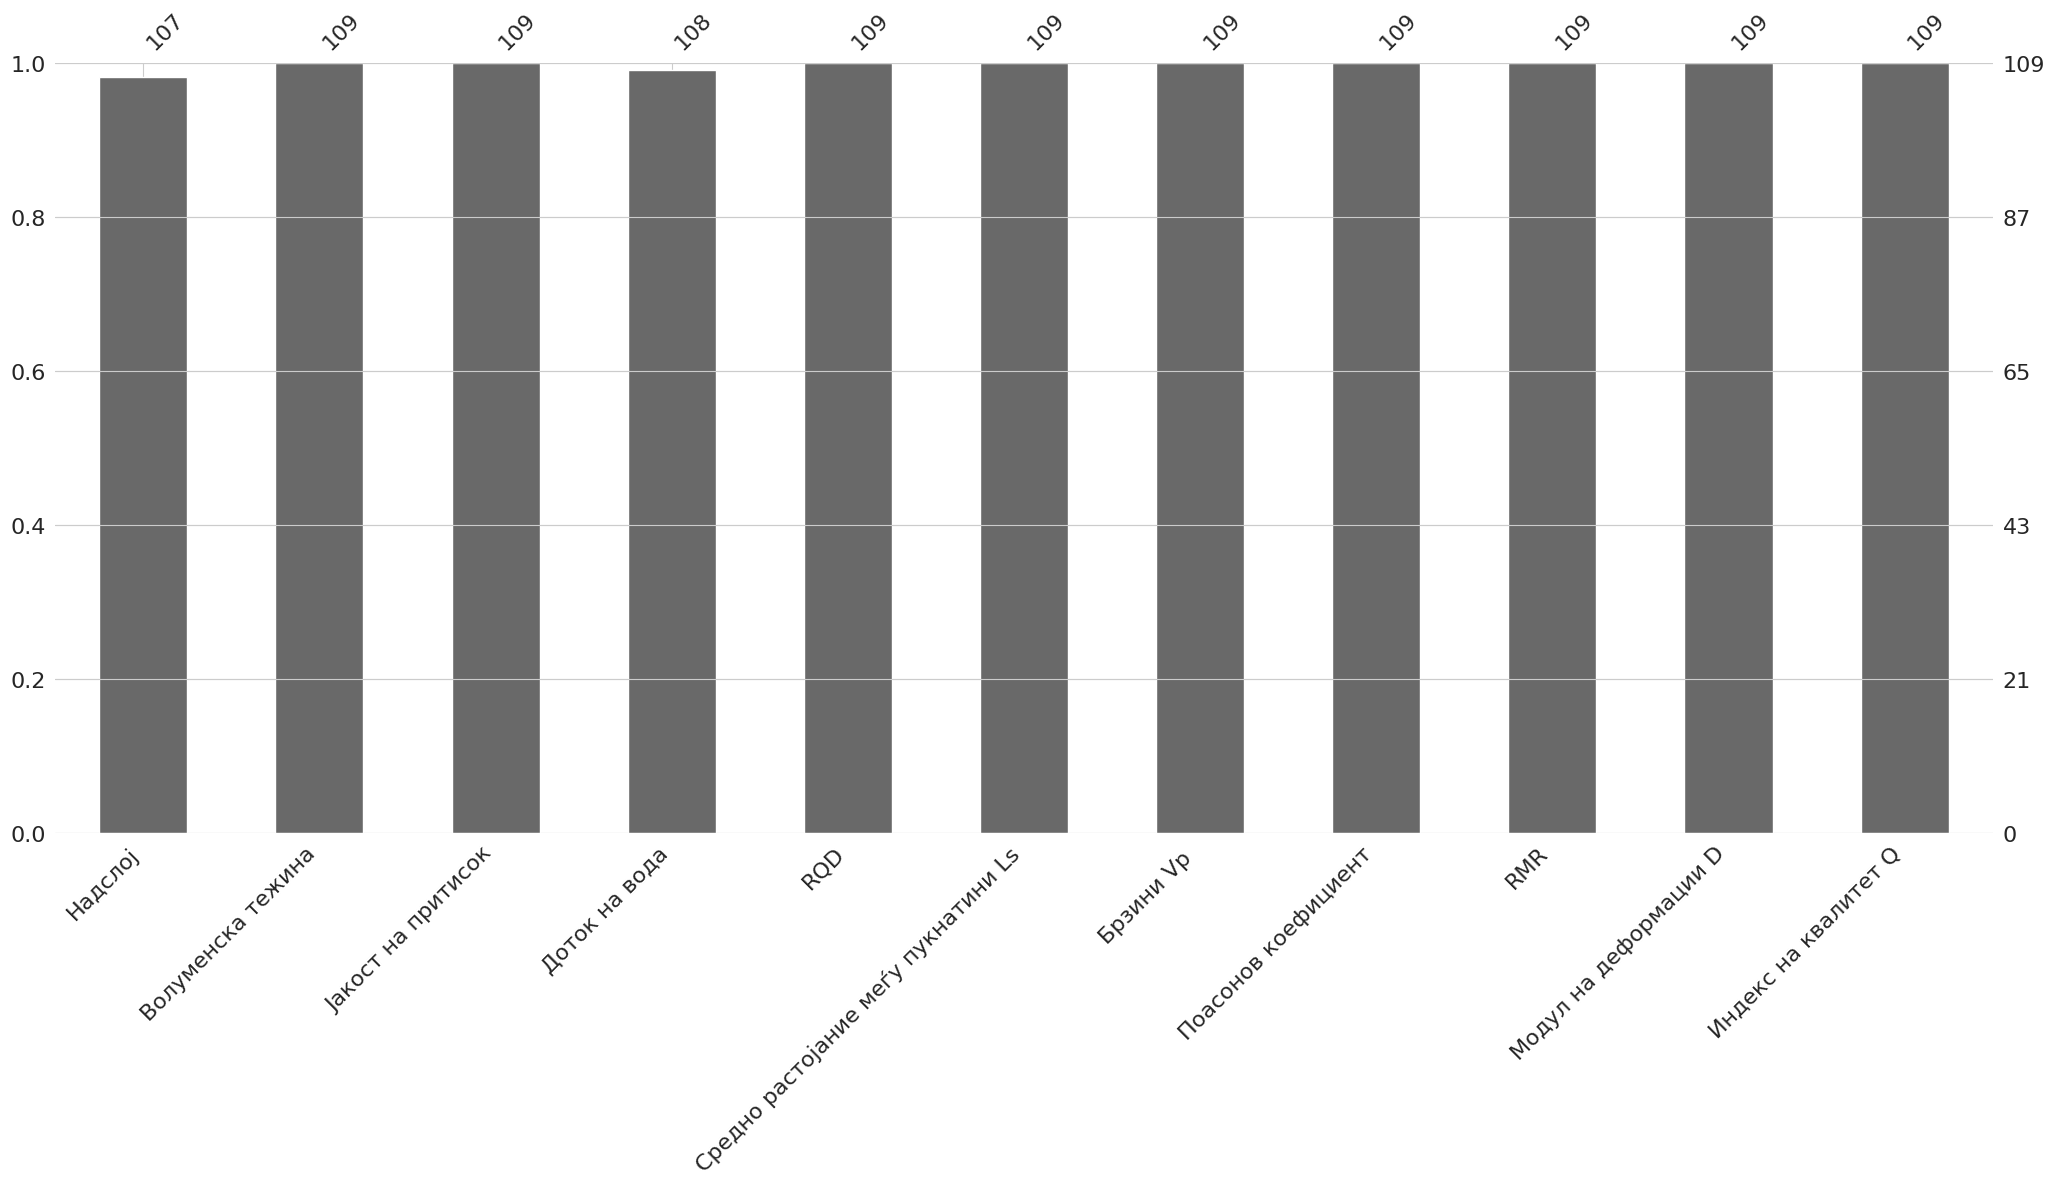

In [2681]:
msno.bar(df)

<Axes: >

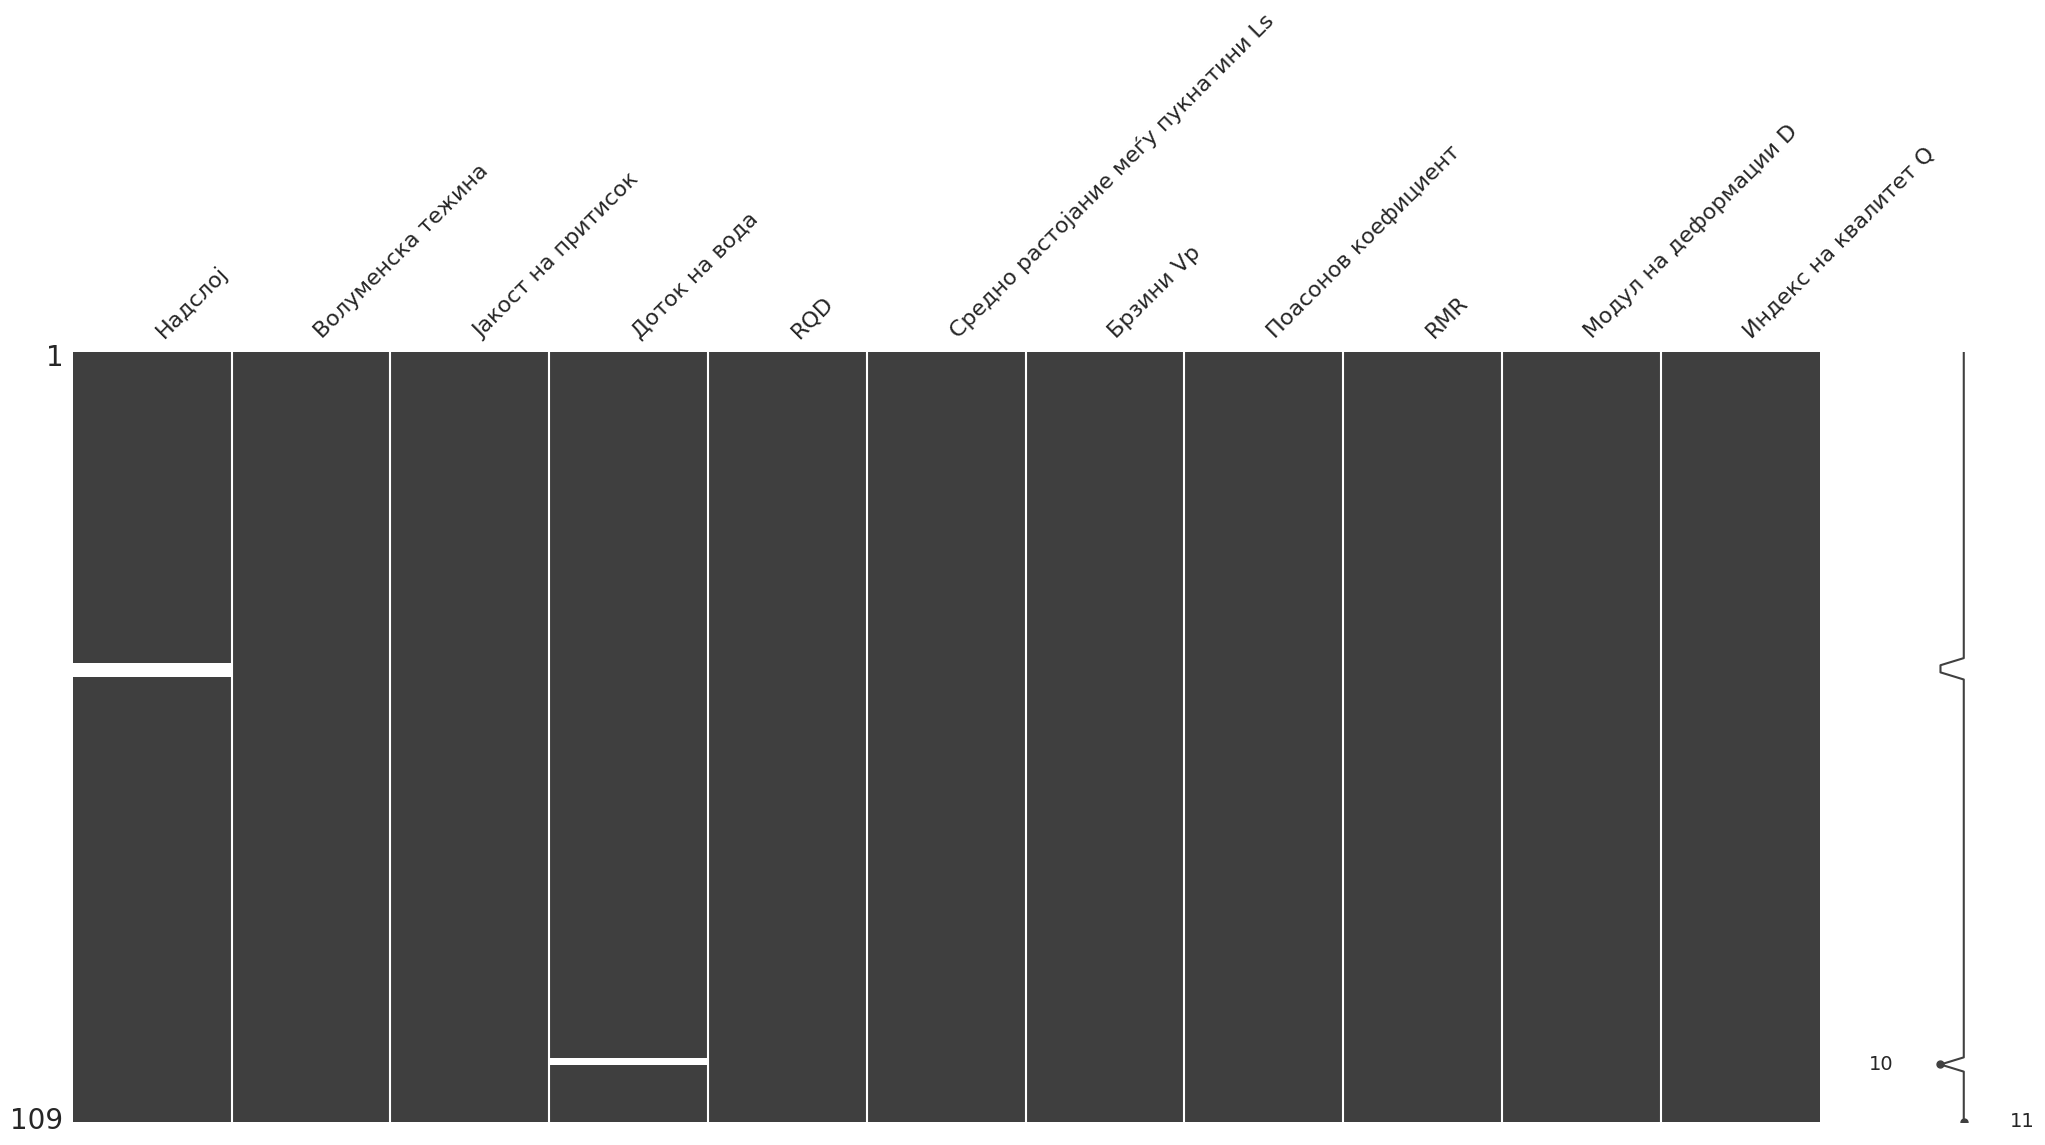

In [2682]:
msno.matrix(df)

In [2683]:
imputer = KNNImputer(n_neighbors=5)
# df.iloc[:,:] = imputer.fit_transform(df)

Во атрибутот RGD има една торка со стринг вредност каде што пишува '70-90', за да го средиме овој проблем може да искористиме просекот односно 70+90/2=160/2=80 или пак може да се искористи некој рандом број од 70 до 90 бидејќи и останатите вредности во тој атрибут се движат околу 70-90. Но заради поточност на податоците мислам дека е подобро да се користи просек.

In [2684]:
df.loc[100,'RQD'] = 80
df = df.astype(float)

In [2685]:
 df.iloc[:,:] = imputer.fit_transform(df)

In [2686]:
df.isnull().sum()

Надслој                                0
Волуменска тежина                      0
Јакост на притисок                     0
Доток на вода                          0
RQD                                    0
Средно растојание меѓу пукнатини Ls    0
Брзини Vp                              0
Поасонов коефициент                    0
RMR                                    0
Модул на деформации D                  0
Индекс на квалитет Q                   0
dtype: int64

Бројот на missing value беше мал, само во два атрибути недостасуваат вредност и тоа во едниот 1 вредност и во другио 2. Бидејќи датасетот е мал и ако се одлучев да ги избришам многу малку податоци ќе ми останат, затоа се одлучив за KNN inputer.

##Outliers

In [2687]:
df.describe()

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода  \
count  109.000000         109.000000          109.000000     109.000000   
mean    51.300183          26.137156           48.433028       0.649856   
std     55.037454           1.157512           26.628892       0.709522   
min      3.000000          23.000000            5.550000       0.008000   
25%     19.000000          25.500000           29.000000       0.100000   
50%     33.000000          26.200000           45.000000       0.500000   
75%     60.000000          26.850000           66.000000       1.000000   
max    320.000000          28.700000          150.000000       3.000000   

              RQD  Средно растојание меѓу пукнатини Ls   Брзини Vp   \
count  109.000000                           109.000000   109.000000   
mean    61.596330                           198.990826  2635.321101   
std     19.340094                           152.620292   919.485130   
min     22.000000                            45.000000   920.000000   
25%     47.000000                           100.000000  2000.000000   
50%     65.000000                           150.000000  2500.000000   
75%     75.000000                           200.000000  3250.000000   
max     96.000000                           700.000000  4900.000000   

       Поасонов коефициент         RMR  Модул на деформации D  \
count           109.000000  109.000000             109.000000   
mean              0.270734   45.522936               2.776606   
std               0.027536   12.104940               2.919393   
min               0.220000   21.000000               0.400000   
25%               0.250000   38.000000               1.100000   
50%               0.265000   45.000000               1.700000   
75%               0.280000   54.000000               3.100000   
max               0.330000   76.000000              13.000000   

       Индекс на квалитет Q  
count            109.000000  
mean               1.843569  
std                2.535512  
min                0.051000  
25%                0.500000  
50%                1.200000  
75%                1.800000  
max               15.600000

In [2688]:
f1=df.append({'Надслој':10, "Волуменска тежина":10,"Јакост на притисок":10, "Доток на вода":10,  "RQD":10, "Средно растојание меѓу пукнатини Ls":10, "Брзини Vp ":10, "Поасонов коефициент":10,"RMR":10, "Модул на деформации D":10, "Индекс на квалитет Q":10 }, ignore_index=True)

<ipython-input-2688-d0a4b8ca2042>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f1=df.append({'Надслој':10, "Волуменска тежина":10,"Јакост на притисок":10, "Доток на вода":10,  "RQD":10, "Средно растојание меѓу пукнатини Ls":10, "Брзини Vp ":10, "Поасонов коефициент":10,"RMR":10, "Модул на деформации D":10, "Индекс на квалитет Q":10 }, ignore_index=True)


In [2689]:
df1.describe()

Реден број   Брзини Vp   Поасонов коефициент         RMR  \
count  109.000000   110.000000           110.000000  110.000000   
mean    55.000000  2611.454545             0.368273   45.227273   
std     31.609598   948.869764             1.023363   12.441908   
min      1.000000    10.000000             0.220000   13.000000   
25%     28.000000  2000.000000             0.250000   38.000000   
50%     55.000000  2500.000000             0.265000   45.000000   
75%     82.000000  3237.500000             0.280000   53.500000   
max    109.000000  4900.000000            11.000000   76.000000   

       Индекс на квалитет Q  
count            110.000000  
mean               1.935900  
std                2.703257  
min                0.051000  
25%                0.501250  
50%                1.200000  
75%                1.800000  
max               15.600000

In [2690]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Реден број                54.00000
Брзини Vp               1237.50000
Поасонов коефициент        0.03000
RMR                       15.50000
Индекс на квалитет Q       1.29875
dtype: float64


<ipython-input-2690-16e1017f3583>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df1.quantile(0.25)
<ipython-input-2690-16e1017f3583>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df1.quantile(0.75)


In [2691]:
print((df1<(Q1-1.5*IQR)) | (df1>(Q3+1.5*IQR)))

       RMR    RQD  Јакост на притисок  Брзини Vp   Волуменска тежина  \
0    False  False               False       False              False   
1     True  False               False        True              False   
2    False  False               False       False              False   
3    False  False               False       False              False   
4    False  False               False       False              False   
..     ...    ...                 ...         ...                ...   
106  False  False               False       False              False   
107  False  False               False       False              False   
108  False  False               False       False              False   
109  False  False               False       False              False   
110  False  False               False       False              False   

     Доток на вода  Индекс на квалитет Q  Модул на деформации D  Надслој  \
0            False                 False                  F

<ipython-input-2691-b084e80e335f>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((df1<(Q1-1.5*IQR)) | (df1>(Q3+1.5*IQR)))


In [2692]:
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum(axis=0)
print(outlier_counts)

RMR                                     1
RQD                                     0
Јакост на притисок                      0
Брзини Vp                               1
Волуменска тежина                       0
Доток на вода                           0
Индекс на квалитет Q                   11
Модул на деформации D                   0
Надслој                                 0
Поасонов коефициент                     6
Реден број                              0
Средно растојание меѓу пукнатини Ls     0
dtype: int64


<ipython-input-2692-77b2d62424c1>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f9102b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f9107f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f910130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f910c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f910eb0>],
 'means': []}

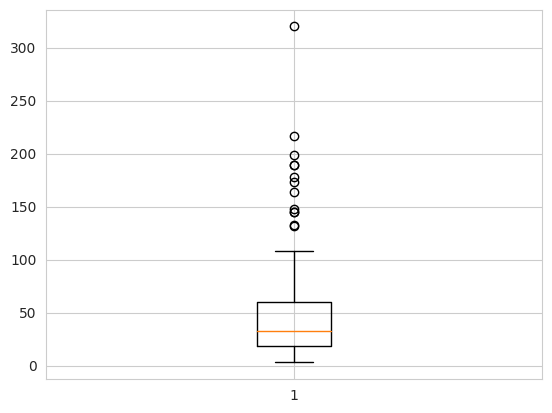

In [2693]:
plt.boxplot(df['Надслој'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f969a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f969f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f969780>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f96a4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f96a740>],
 'means': []}

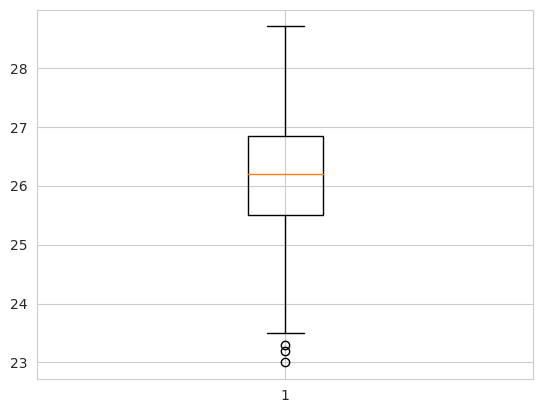

In [2694]:
plt.boxplot(df['Волуменска тежина'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f7ba950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f7bae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f7ba6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f7bb3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f7bb670>],
 'means': []}

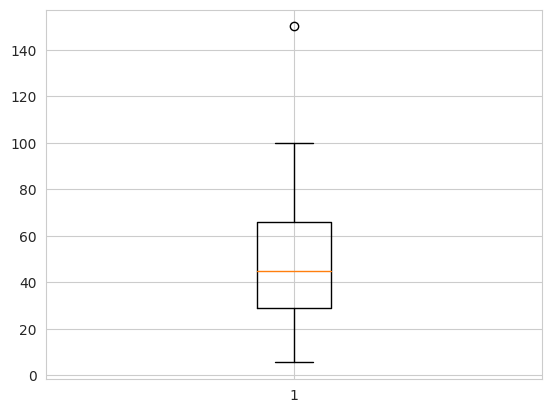

In [2695]:
plt.boxplot(df['Јакост на притисок'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f849180>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f8496c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f848ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f849c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f849ea0>],
 'means': []}

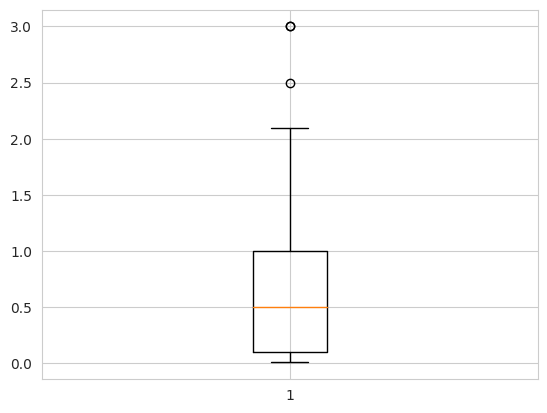

In [2696]:
plt.boxplot(df['Доток на вода'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f69af20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f69b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f69ad40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f69b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f69bc40>],
 'means': []}

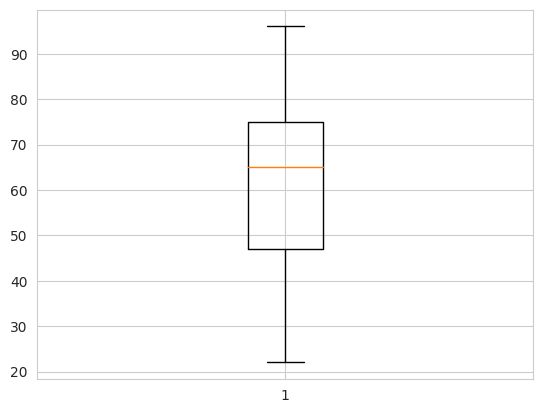

In [2697]:
plt.boxplot(df['RQD'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f7156c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f715c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f715420>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f716140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f7163e0>],
 'means': []}

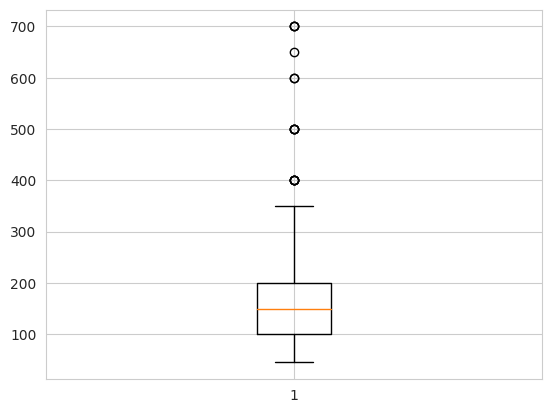

In [2698]:
plt.boxplot(df['Средно растојание меѓу пукнатини Ls'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f773460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f7739a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f7731c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f773ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f5b01c0>],
 'means': []}

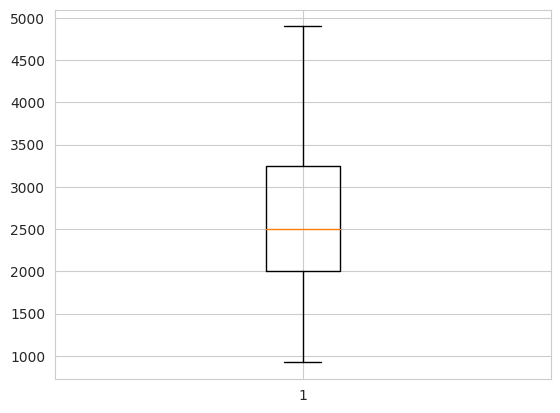

In [2699]:
plt.boxplot(df['Брзини Vp '])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f5ee230>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f5ee770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f5edf90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f5eecb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f5eef50>],
 'means': []}

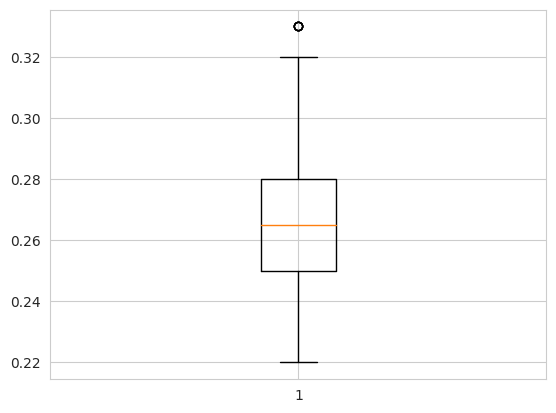

In [2700]:
plt.boxplot(df['Поасонов коефициент'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f64fbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f480040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f64fd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f480580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f480820>],
 'means': []}

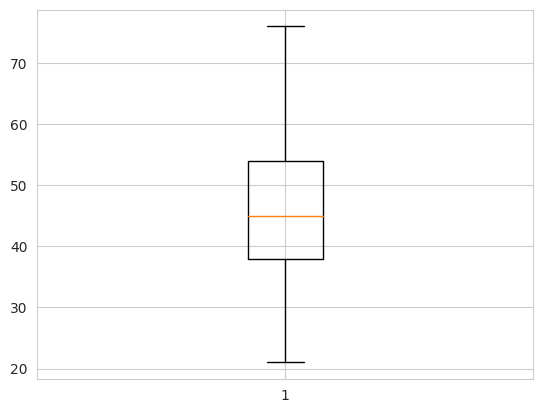

In [2701]:
plt.boxplot(df['RMR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f4cd6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f4cdc30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f4cd450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f4ce170>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f4ce410>],
 'means': []}

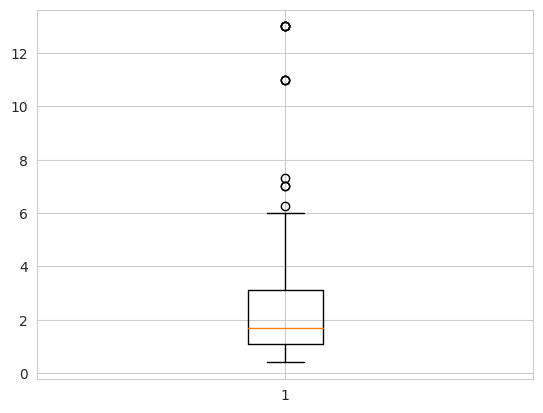

In [2702]:
plt.boxplot(df['Модул на деформации D'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcb4f52f970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcb4f52feb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcb4f52f6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcb4f564430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcb4f5646d0>],
 'means': []}

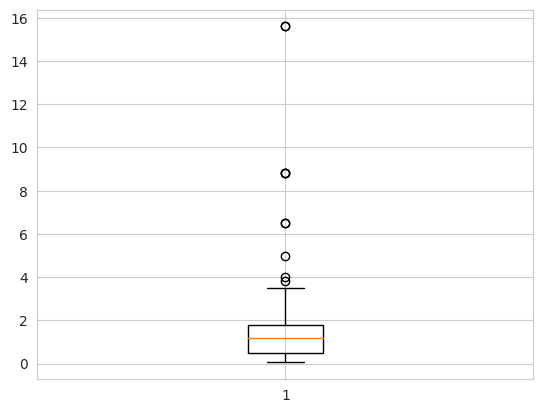

In [2703]:
plt.boxplot(df['Индекс на квалитет Q'])

Скатер плот-Ако гледаме за секој посебно атрибут дали има outliers, ќе забележиме дека  атрибутите RQD, Брзина Vp и RMR немаат воопшто оутлаери.  Со помалку оутлаери се Волуменска тежина, Јакост на притисок, Додаток на вода, Средно растојание меѓу пукнатини Ls, Поасонов коефициент и Модул на деформации D имаат мал број на оутлаери. Додека пак Надслој и Индекс на квалитет Q имаат поголем број што може да видиме од скатер плот.
Доколку видиме според интерквартален ранг IQR ќе видиме дека ситуацијата не е таква дека всушност таму каде што покажува дека се оутлаери дека всушност не се, дека се тоа се во ред вредности. Според ова атрибуотот Индекс на квалитет Q, а по него и Паосонов коефициент имаат најголем број на оутлаери.

Доколку при тренирање на одреден модел, се јават доста послаби резултати и при тоа се сомневаме дека тоа е од outliers, би било подобро да користиме ridge или lasso регресија. Со ласо регресија со воведување на sparcity на коефициентите се намалува важноста на поневажните карактеристики, односно ги поставува на 0. Со ridge регресија се намалува влијанието на outliers и се намалува вредноста за overfiting.

##Correlations

###Pearsons corelation - за линеарна поврзаност помеѓу два атрибути

In [2704]:
corr_matrix = df.corr()

<Axes: >

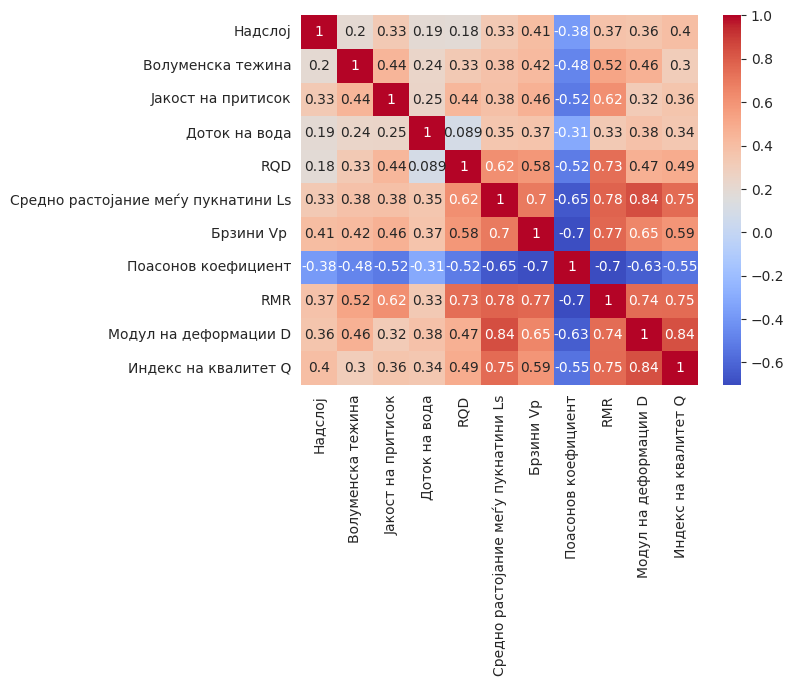

In [2705]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Што може да видиме од корелацијата е дека атрибутите Надслој, Волуменска тежина, Јакост на притисок, Додаток на вода немаат силна корелација со другите атрибути.

Атрибутот RQD  има позитивна корелација со RMR.

Атрибутот Средно растојание меѓу пукнатини Ls има позитивни корелации со атрибутите RMR, Модул на деформации D и Индексна квалитет Q.

Атрибутот Брзини Vp има корелација позитивна со RMR и негативна корелација со Поасонов коефициент.

Атрибутот Поасонов коефициент има две негативни корелации  со Брзина Vp и RMR.

Атрибутот RMR има негативна корелација со Поасонов коефициент, и позитивни корелации со атрибутите Брзина Vp, RQD, Средно растојание меѓу пукнатини Ls.

Атрибутот Модул на деформации D има позитивна корелација со Средно растојание меѓу пукнатини Ls.

Индекс на квалитет Q има позитивна корелација со Средно растојание меѓу пукнатини Ls.


In [2706]:
attributes = ['Надслој',	'Волуменска тежина',	'Јакост на притисок', 'Доток на вода', 	'RQD'	, 'Средно растојание меѓу пукнатини Ls', 	'Брзини Vp ' ,	'Поасонов коефициент'	]
targets = ['RMR', 'Модул на деформации D',	'Индекс на квалитет Q']

In [2707]:
for target in targets:
    print(f"Correlations with {target}:")
    for attribute in attributes:
        corr = np.corrcoef(df[attribute], df[target])[0, 1]
        print(f"{attribute}: correlation={corr:.3f}")
    print()

Correlations with RMR:
Надслој: correlation=0.371
Волуменска тежина: correlation=0.523
Јакост на притисок: correlation=0.617
Доток на вода: correlation=0.330
RQD: correlation=0.734
Средно растојание меѓу пукнатини Ls: correlation=0.777
Брзини Vp : correlation=0.765
Поасонов коефициент: correlation=-0.703

Correlations with Модул на деформации D:
Надслој: correlation=0.357
Волуменска тежина: correlation=0.462
Јакост на притисок: correlation=0.320
Доток на вода: correlation=0.380
RQD: correlation=0.474
Средно растојание меѓу пукнатини Ls: correlation=0.842
Брзини Vp : correlation=0.650
Поасонов коефициент: correlation=-0.633

Correlations with Индекс на квалитет Q:
Надслој: correlation=0.401
Волуменска тежина: correlation=0.302
Јакост на притисок: correlation=0.357
Доток на вода: correlation=0.345
RQD: correlation=0.492
Средно растојание меѓу пукнатини Ls: correlation=0.751
Брзини Vp : correlation=0.592
Поасонов коефициент: correlation=-0.546



Каде што имаме позитивна корелација меѓу атрибутите тоа значи дека вредностите помеѓу атрибутите зависат меѓу себе со високи вредности.
Тука имаме и негативна корелација што ни покажува дека доколку едниот атрибут има високи вредности кои ќе зависат од ниски вредности од другиот атрибут

###Spearman's rank Корелација за монотони релации меѓу променливи

In [2708]:
attributes = ['Надслој',	'Волуменска тежина',	'Јакост на притисок', 'Доток на вода', 	'RQD'	, 'Средно растојание меѓу пукнатини Ls', 	'Брзини Vp ' ,	'Поасонов коефициент'	]
targets = ['RMR', 'Модул на деформации D',	'Индекс на квалитет Q']

In [2709]:
for target in targets:
    print(f"Correlations with {target}:")
    for attribute in attributes:
        corr, p_value = spearmanr(df[attribute], df[target])
        print(f"{attribute}: correlation={corr:.3f}, p-value={p_value:.3f}")
    print()

Correlations with RMR:
Надслој: correlation=0.364, p-value=0.000
Волуменска тежина: correlation=0.403, p-value=0.000
Јакост на притисок: correlation=0.655, p-value=0.000
Доток на вода: correlation=0.275, p-value=0.004
RQD: correlation=0.732, p-value=0.000
Средно растојание меѓу пукнатини Ls: correlation=0.804, p-value=0.000
Брзини Vp : correlation=0.774, p-value=0.000
Поасонов коефициент: correlation=-0.712, p-value=0.000

Correlations with Модул на деформации D:
Надслој: correlation=0.201, p-value=0.036
Волуменска тежина: correlation=0.591, p-value=0.000
Јакост на притисок: correlation=0.414, p-value=0.000
Доток на вода: correlation=0.366, p-value=0.000
RQD: correlation=0.495, p-value=0.000
Средно растојание меѓу пукнатини Ls: correlation=0.661, p-value=0.000
Брзини Vp : correlation=0.603, p-value=0.000
Поасонов коефициент: correlation=-0.606, p-value=0.000

Correlations with Индекс на квалитет Q:
Надслој: correlation=0.247, p-value=0.010
Волуменска тежина: correlation=0.367, p-value=

Како што може да видиме скоро сите слични атрибути имаат корелација меѓу себе како што видовме со Pearson-ова корелација. Тука доколку имаме вредност за p-value (корелациски коефициент меѓу атрибутите) 0.000 дека имаме голема доверба меѓу атрибутите. Помалите вредности на p-value ја всушност подбиваат нултата хипотеза што докажуваат дека постои некоја значајна корелација.

##Visualization

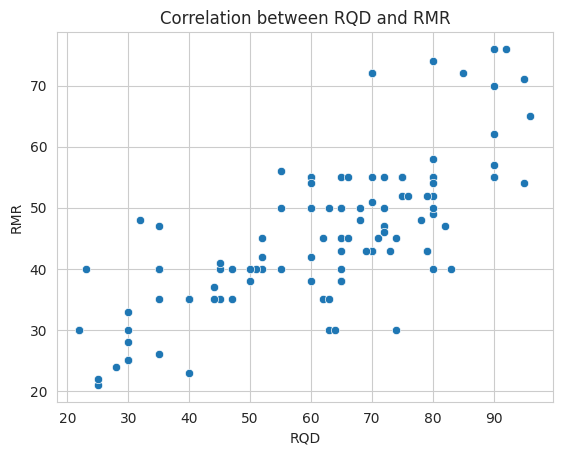

In [2710]:
sns.set_style("whitegrid")
sns.scatterplot(x=df['RQD'], y=df['RMR'])
plt.xlabel('RQD')
plt.ylabel('RMR')
plt.title('Correlation between RQD and RMR')
plt.show()

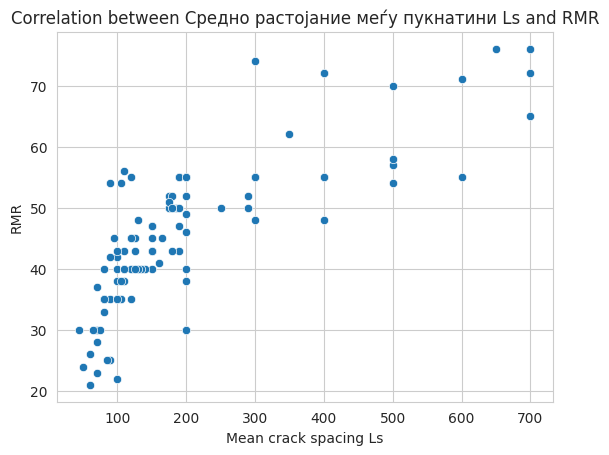

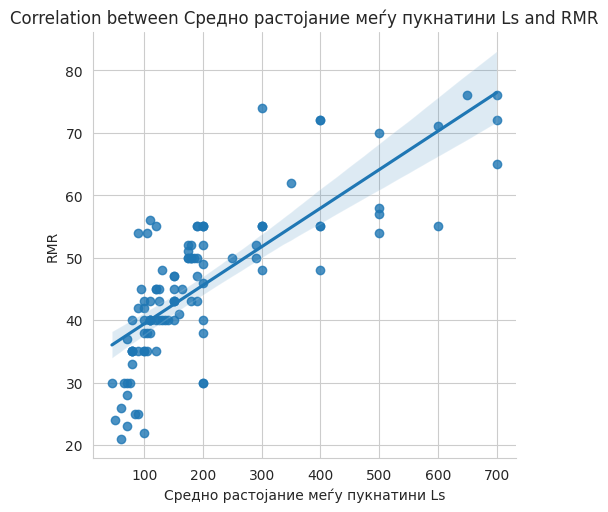

In [2711]:
sns.set_style("whitegrid")
sns.scatterplot(x=df['Средно растојание меѓу пукнатини Ls'], y=df['RMR'])
plt.xlabel('Mean crack spacing Ls')
plt.ylabel('RMR')
plt.title('Correlation between Средно растојание меѓу пукнатини Ls and RMR')
plt.show()
sns.lmplot(x='Средно растојание меѓу пукнатини Ls', y='RMR', data=df)
plt.xlabel('Средно растојание меѓу пукнатини Ls')
plt.ylabel('RMR')
plt.title('Correlation between Средно растојание меѓу пукнатини Ls and RMR')
plt.show()

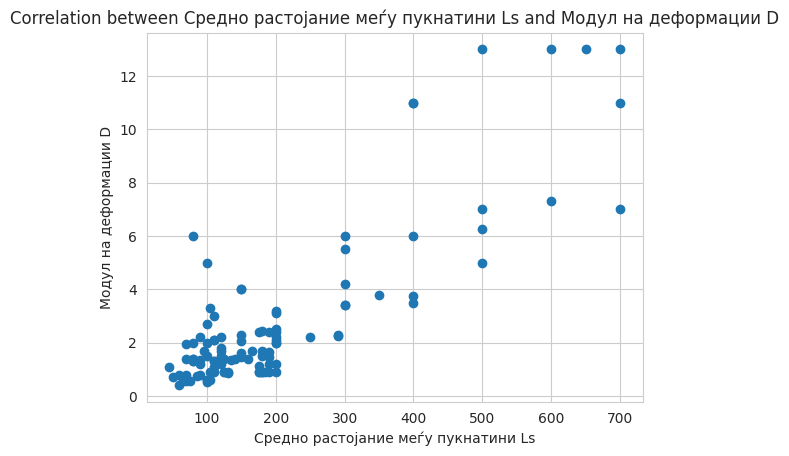

In [2712]:
plt.scatter(df["Средно растојание меѓу пукнатини Ls"], df["Модул на деформации D"])
plt.xlabel("Средно растојание меѓу пукнатини Ls")
plt.ylabel("Модул на деформации D")
plt.title("Correlation between Средно растојание меѓу пукнатини Ls and Модул на деформации D")
plt.show()

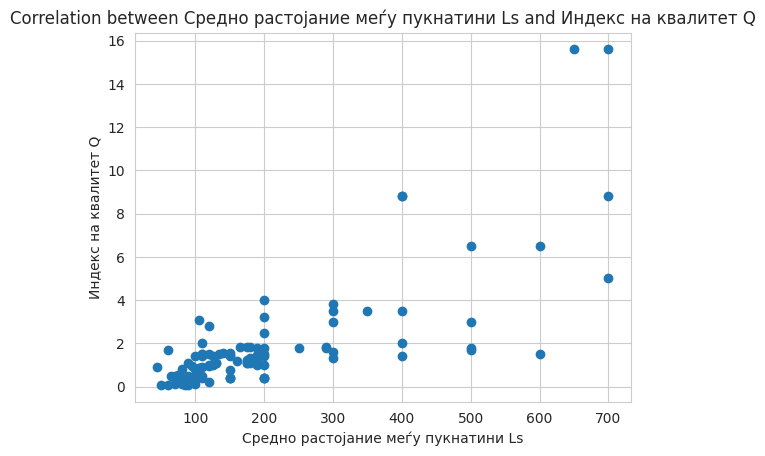

In [2713]:
plt.scatter(df['Средно растојание меѓу пукнатини Ls'], df['Индекс на квалитет Q'])
plt.xlabel('Средно растојание меѓу пукнатини Ls')
plt.ylabel('Индекс на квалитет Q')
plt.title('Correlation between Средно растојание меѓу пукнатини Ls and Индекс на квалитет Q')
plt.show()

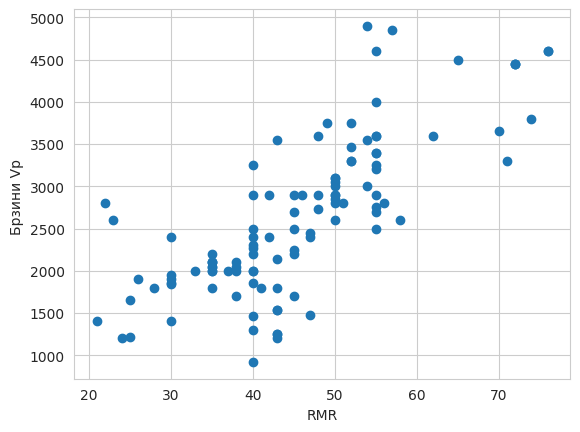

In [2714]:
rmr = df['RMR']
vp = df['Брзини Vp ']
plt.scatter(rmr, vp)
plt.xlabel('RMR')
plt.ylabel('Брзини Vp ')
plt.show()

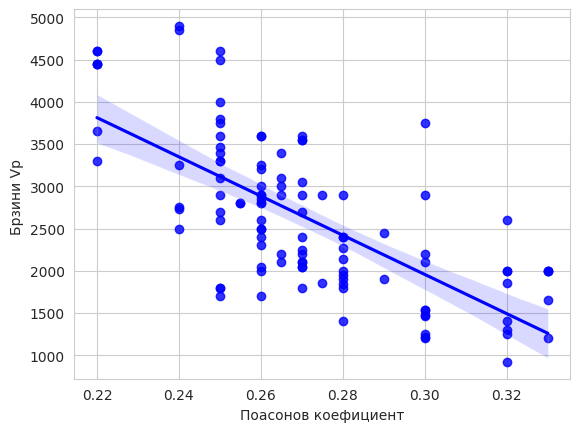

In [2715]:
poisson_ratio = df["Поасонов коефициент"]
vp = df['Брзини Vp ']
sns.regplot(x=poisson_ratio, y=vp, color='b')
plt.xlabel("Поасонов коефициент")
plt.ylabel('Брзини Vp ')
plt.show()

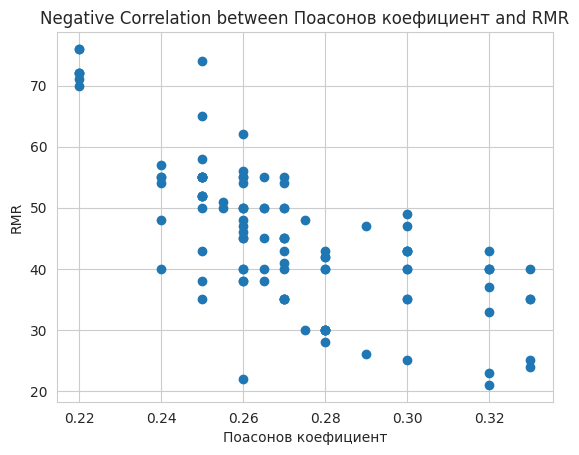

In [2716]:
plt.scatter(df['Поасонов коефициент'], df['RMR'])
plt.xlabel('Поасонов коефициент')
plt.ylabel('RMR')
plt.title('Negative Correlation between Поасонов коефициент and RMR')
plt.show()

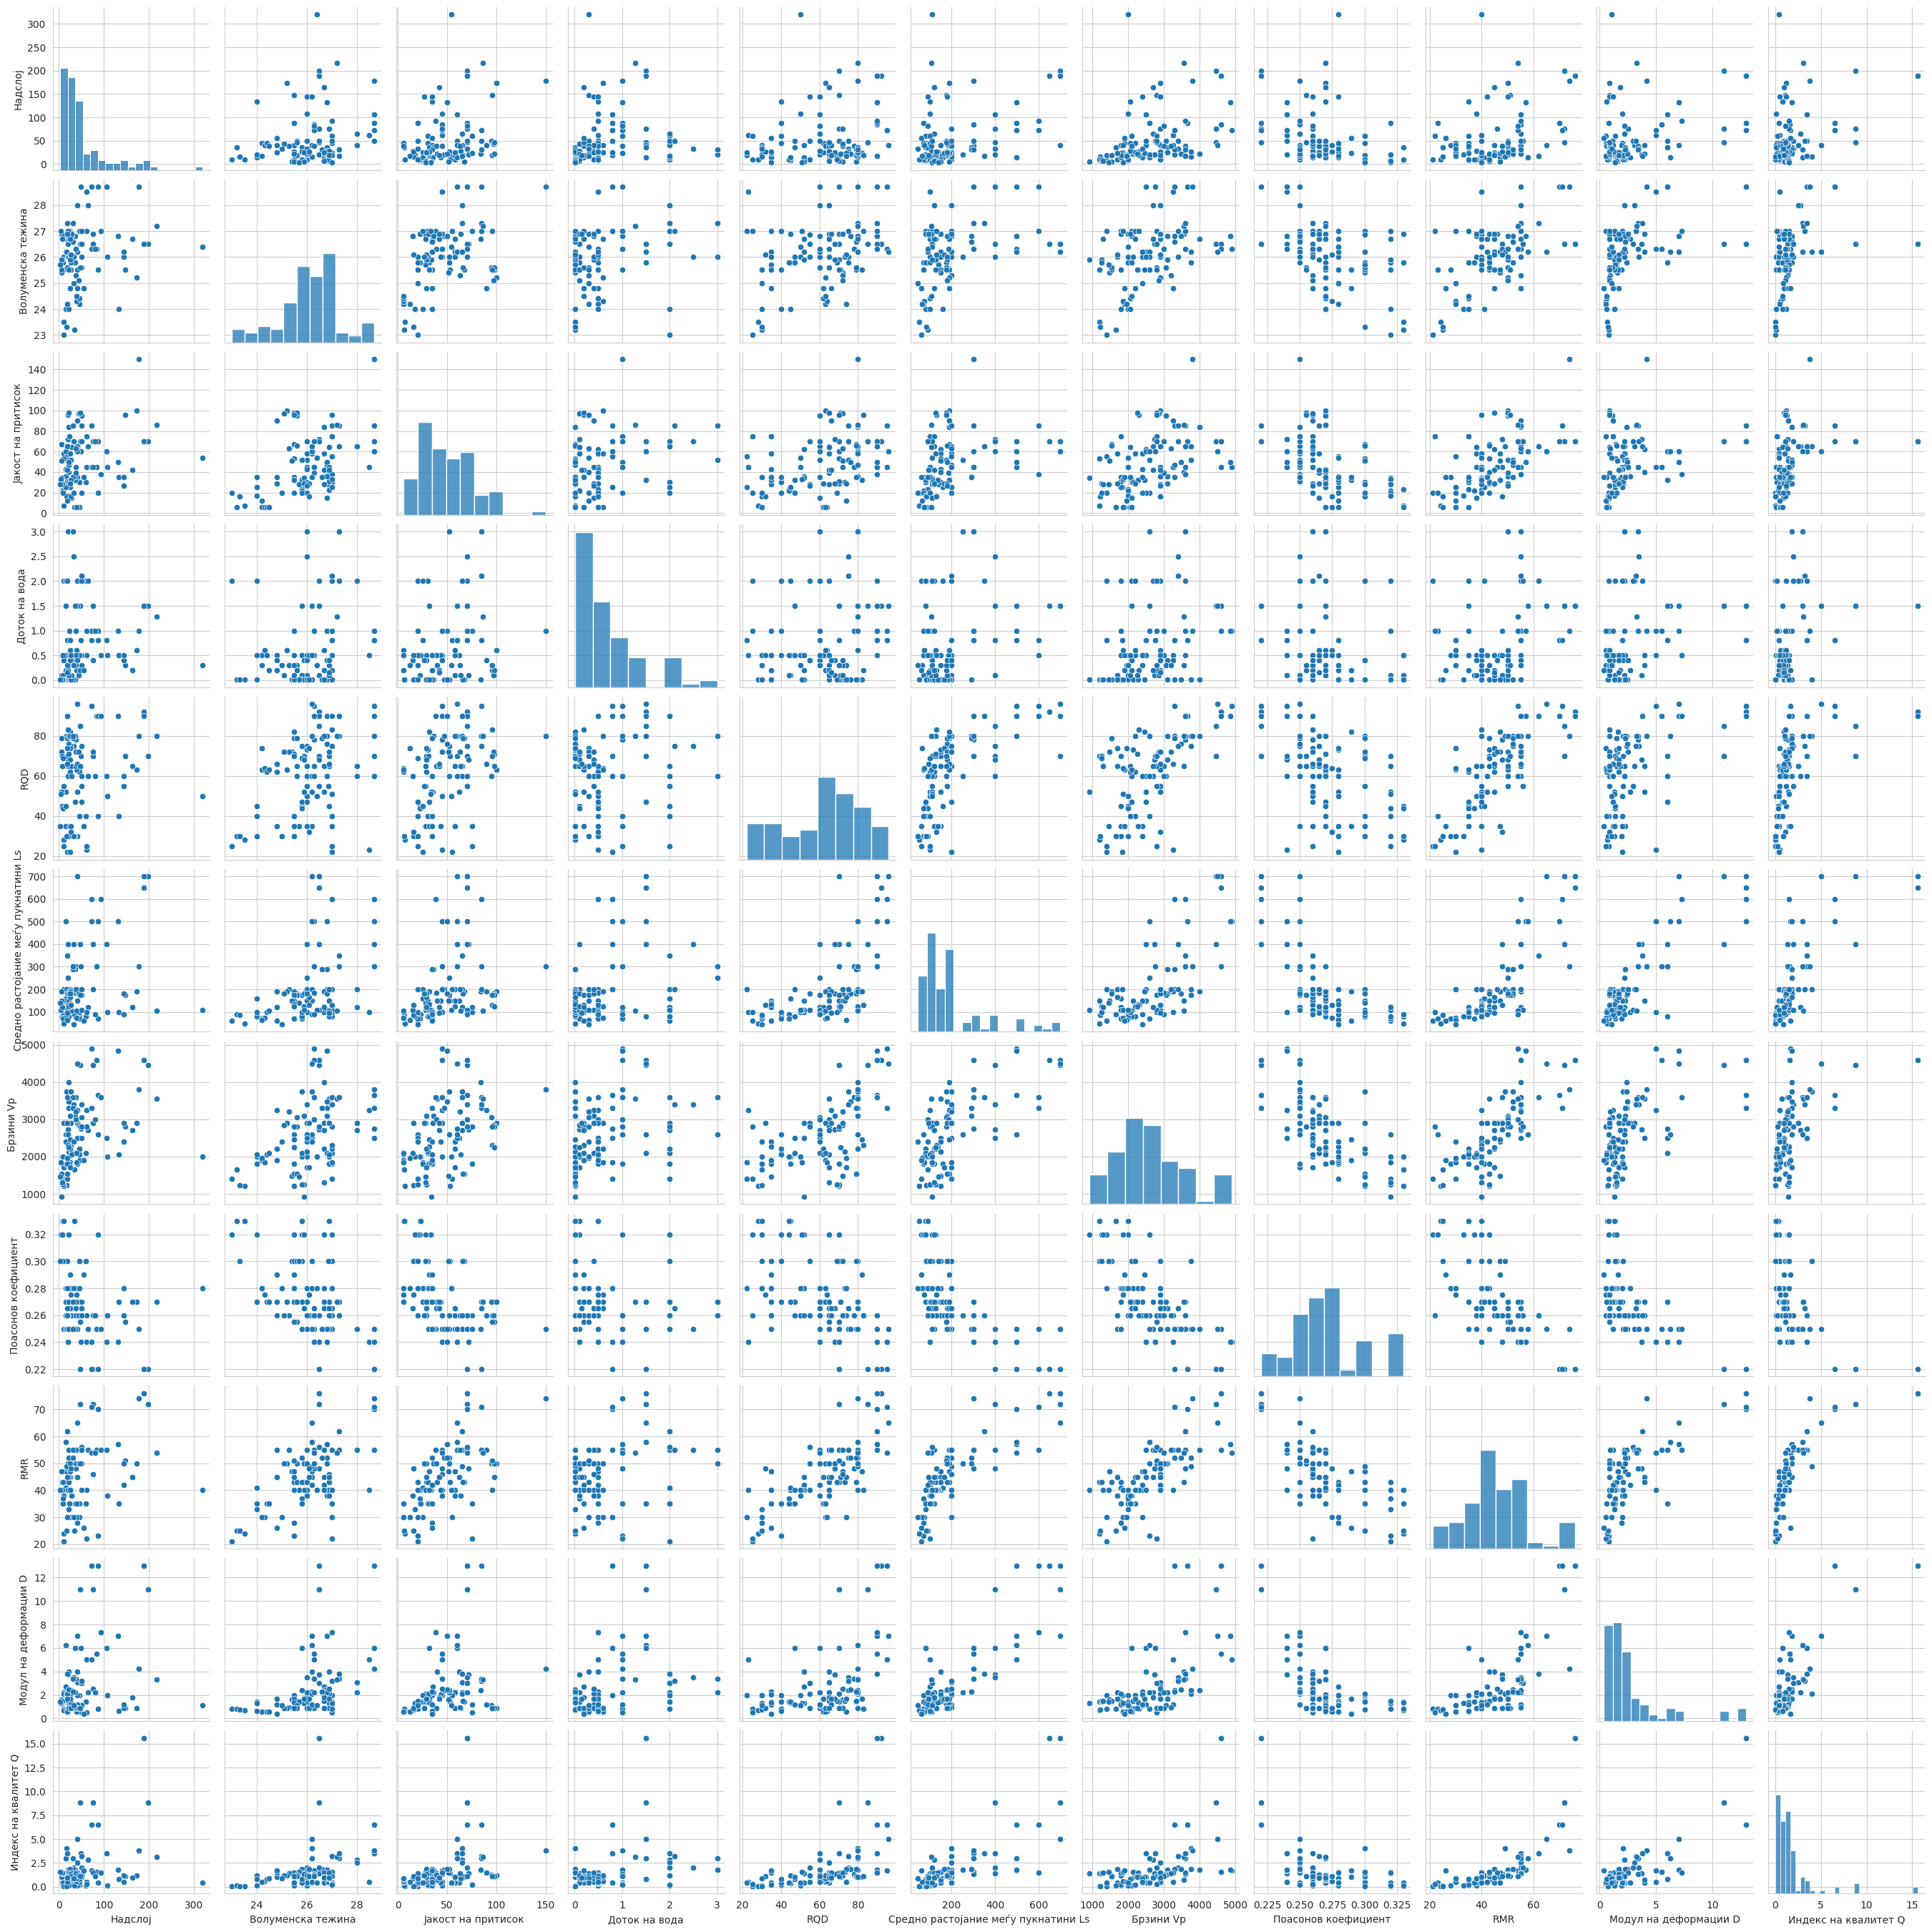

In [2717]:
sns.pairplot(df)

#Категориски податоци

In [2718]:
df2=df.copy()
df2.head()

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
0     75.0               26.5                70.0            1.5  70.0   
1    189.0               26.5                70.0            1.5  92.0   
2     47.0               26.5                70.0            1.5  85.0   
3    199.0               26.5                70.0            1.5  70.0   
4    108.0               26.0                45.0            0.5  50.0   

   Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент   RMR  \
0                                400.0      4450.0                 0.22  72.0   
1                                650.0      4600.0                 0.22  76.0   
2                                400.0      4450.0                 0.22  72.0   
3                                700.0      4450.0                 0.22  72.0   
4                                100.0      2000.0                 0.26  38.0   

   Модул на деформации D  Индекс на квалитет Q  
0                   11.0                   8.8  
1                   13.0                  15.6  
2                   11.0                   8.8  
3                   11.0                   8.8  
4                    2.0                   0.1

In [2719]:
def categorize_RMR(x):
    if x <= 20:
        return '5 категорија'
    elif x <= 40:
        return '4 категорија'
    elif x <= 60:
        return '3 категорија'
    elif x <= 80:
        return '2 категорија'
    else:
        return '1 категорија'
df2['RMR_category'] = df2['RMR'].apply(categorize_RMR)
df2

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
0       75.0               26.5                70.0           1.50  70.0   
1      189.0               26.5                70.0           1.50  92.0   
2       47.0               26.5                70.0           1.50  85.0   
3      199.0               26.5                70.0           1.50  70.0   
4      108.0               26.0                45.0           0.50  50.0   
..       ...                ...                 ...            ...   ...   
104     75.0               26.9                45.0           0.40  72.0   
105     81.0               26.3                70.0           1.00  60.0   
106    164.0               26.7                42.0           0.20  65.0   
107     18.0               27.3                65.0           2.00  90.0   
108     19.0               26.9                42.0           0.15  66.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0                                  400.0      4450.0                0.220   
1                                  650.0      4600.0                0.220   
2                                  400.0      4450.0                0.220   
3                                  700.0      4450.0                0.220   
4                                  100.0      2000.0                0.260   
..                                   ...         ...                  ...   
104                                200.0      2900.0                0.260   
105                                 90.0      3000.0                0.260   
106                                120.0      2700.0                0.270   
107                                350.0      3600.0                0.260   
108                                 95.0      2900.0                0.265   

      RMR  Модул на деформации D  Индекс на квалитет Q  RMR_category  
0    72.0                   11.0                  8.80  2 категорија  
1    76.0                   13.0                 15.60  2 категорија  
2    72.0                   11.0                  8.80  2 категорија  
3    72.0                   11.0                  8.80  2 категорија  
4    38.0                    2.0                  0.10  4 категорија  
..    ...                    ...                   ...           ...  
104  46.0                    2.5                  1.50  3 категорија  
105  54.0                    2.2                  1.10  3 категорија  
106  45.0                    1.8                  0.95  3 категорија  
107  62.0                    3.8                  3.50  2 категорија  
108  45.0                    1.7                  0.96  3 категорија  

[109 rows x 12 columns]

In [2720]:
def categorize_IKQ(x):
    if x >= 0.001 and x < 0.01:
       return  "особено лоша карпа (G)"
    elif x >= 0.01 and x < 0.1:
       return "екстремно лоша карпа (F)"
    elif x >= 0.1 and x < 1:
        return "многу лоша карпа (E)"
    elif x >= 1 and x < 4:
        return "лоша карпа (D)"
    elif x >= 4 and x < 10:
        return  "поволна карпа (C)"
    elif x >= 10 and x < 40:
        return "добра карпа (B)"
    elif x >= 40 and x < 100:
        return "многу добра карпа (A)"
    elif x >= 100 and x < 400:
        return "екстремно добра карпа (A)"
    elif x >= 400 and x <= 1000:
        return "особено добра карпа (A)"

df2["Индекс на квалитет Q_classification"] = df2["Индекс на квалитет Q"].apply(categorize_IKQ)
df2

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
0       75.0               26.5                70.0           1.50  70.0   
1      189.0               26.5                70.0           1.50  92.0   
2       47.0               26.5                70.0           1.50  85.0   
3      199.0               26.5                70.0           1.50  70.0   
4      108.0               26.0                45.0           0.50  50.0   
..       ...                ...                 ...            ...   ...   
104     75.0               26.9                45.0           0.40  72.0   
105     81.0               26.3                70.0           1.00  60.0   
106    164.0               26.7                42.0           0.20  65.0   
107     18.0               27.3                65.0           2.00  90.0   
108     19.0               26.9                42.0           0.15  66.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0                                  400.0      4450.0                0.220   
1                                  650.0      4600.0                0.220   
2                                  400.0      4450.0                0.220   
3                                  700.0      4450.0                0.220   
4                                  100.0      2000.0                0.260   
..                                   ...         ...                  ...   
104                                200.0      2900.0                0.260   
105                                 90.0      3000.0                0.260   
106                                120.0      2700.0                0.270   
107                                350.0      3600.0                0.260   
108                                 95.0      2900.0                0.265   

      RMR  Модул на деформации D  Индекс на квалитет Q  RMR_category  \
0    72.0                   11.0                  8.80  2 категорија   
1    76.0                   13.0                 15.60  2 категорија   
2    72.0                   11.0                  8.80  2 категорија   
3    72.0                   11.0                  8.80  2 категорија   
4    38.0                    2.0                  0.10  4 категорија   
..    ...                    ...                   ...           ...   
104  46.0                    2.5                  1.50  3 категорија   
105  54.0                    2.2                  1.10  3 категорија   
106  45.0                    1.8                  0.95  3 категорија   
107  62.0                    3.8                  3.50  2 категорија   
108  45.0                    1.7                  0.96  3 категорија   

    Индекс на квалитет Q_classification  
0                     поволна карпа (C)  
1                       добра карпа (B)  
2                     поволна карпа (C)  
3                     поволна карпа (C)  
4                  многу лоша карпа (E)  
..                                  ...  
104                      лоша карпа (D)  
105                      лоша карпа (D)  
106                многу лоша карпа (E)  
107                      лоша карпа (D)  
108                многу лоша карпа (E)  

[109 rows x 13 columns]

In [2721]:
#Сопствен избор на поделба
def categorize_MDD(x):
    if x >= 0.01 and x <1:
       return  "мали деформации"
    elif x >= 1 and x < 5:
       return "прифатливи/нормални деформации"
    elif x >= 5 and x < 10:
        return "големи деформации"
    elif x >10:
        return "екстремни деформации"

df2["Модул на деформации D_classification"] = df2["Модул на деформации D"].apply(categorize_MDD)
df2

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
0       75.0               26.5                70.0           1.50  70.0   
1      189.0               26.5                70.0           1.50  92.0   
2       47.0               26.5                70.0           1.50  85.0   
3      199.0               26.5                70.0           1.50  70.0   
4      108.0               26.0                45.0           0.50  50.0   
..       ...                ...                 ...            ...   ...   
104     75.0               26.9                45.0           0.40  72.0   
105     81.0               26.3                70.0           1.00  60.0   
106    164.0               26.7                42.0           0.20  65.0   
107     18.0               27.3                65.0           2.00  90.0   
108     19.0               26.9                42.0           0.15  66.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0                                  400.0      4450.0                0.220   
1                                  650.0      4600.0                0.220   
2                                  400.0      4450.0                0.220   
3                                  700.0      4450.0                0.220   
4                                  100.0      2000.0                0.260   
..                                   ...         ...                  ...   
104                                200.0      2900.0                0.260   
105                                 90.0      3000.0                0.260   
106                                120.0      2700.0                0.270   
107                                350.0      3600.0                0.260   
108                                 95.0      2900.0                0.265   

      RMR  Модул на деформации D  Индекс на квалитет Q  RMR_category  \
0    72.0                   11.0                  8.80  2 категорија   
1    76.0                   13.0                 15.60  2 категорија   
2    72.0                   11.0                  8.80  2 категорија   
3    72.0                   11.0                  8.80  2 категорија   
4    38.0                    2.0                  0.10  4 категорија   
..    ...                    ...                   ...           ...   
104  46.0                    2.5                  1.50  3 категорија   
105  54.0                    2.2                  1.10  3 категорија   
106  45.0                    1.8                  0.95  3 категорија   
107  62.0                    3.8                  3.50  2 категорија   
108  45.0                    1.7                  0.96  3 категорија   

    Индекс на квалитет Q_classification Модул на деформации D_classification  
0                     поволна карпа (C)                 екстремни деформации  
1                       добра карпа (B)                 екстремни деформации  
2                     поволна карпа (C)                 екстремни деформации  
3                     поволна карпа (C)                 екстремни деформации  
4                  многу лоша карпа (E)       прифатливи/нормални деформации  
..                                  ...                                  ...  
104                      лоша карпа (D)       прифатливи/нормални деформации  
105                      лоша карпа (D)       прифатливи/нормални деформации  
106                многу лоша карпа (E)       прифатливи/нормални деформации  
107                      лоша карпа (D)       прифатливи/нормални деформации  
108                многу лоша карпа (E)       прифатливи/нормални деформации  

[109 rows x 14 columns]

##Визуелизација на категориски податоци

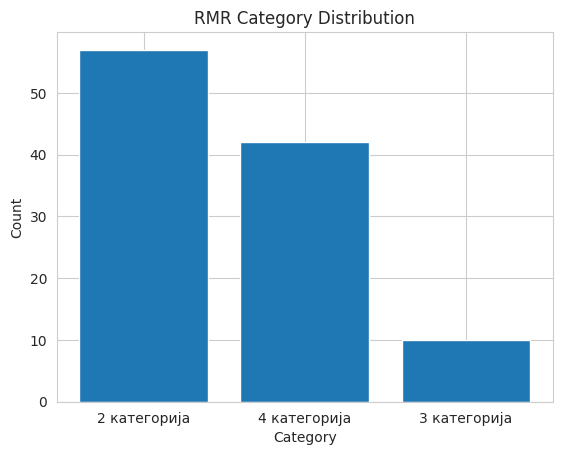

In [2722]:
plt.bar(df2['RMR_category'].unique(), df2['RMR_category'].value_counts())
plt.title("RMR Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

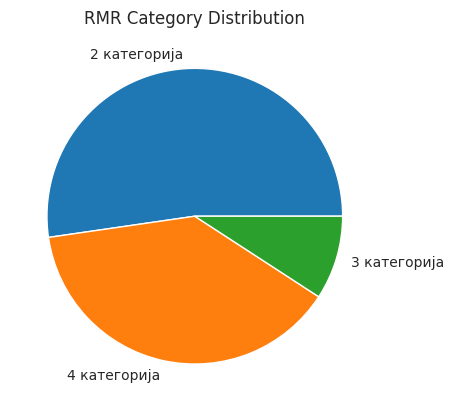

In [2723]:
plt.pie(df2['RMR_category'].value_counts(), labels=df2['RMR_category'].unique())
plt.title("RMR Category Distribution")
plt.show()

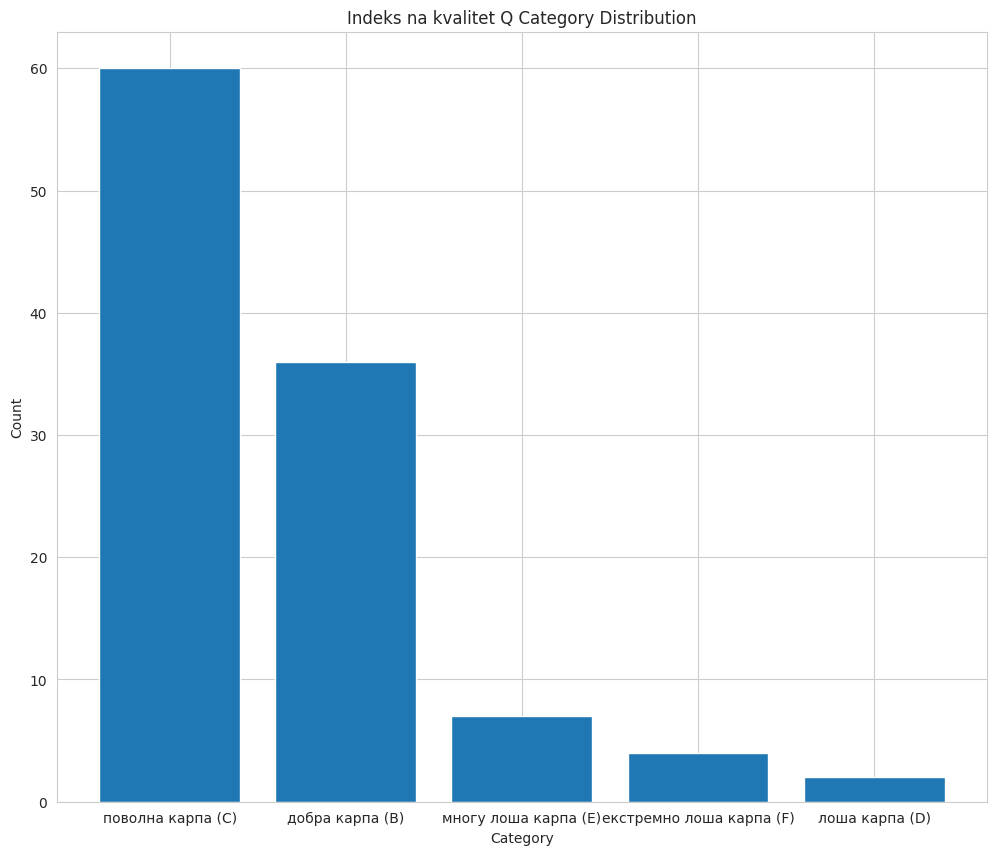

In [2724]:
fig = plt.figure(figsize=(12, 10))
plt.bar(df2['Индекс на квалитет Q_classification'].unique(), df2['Индекс на квалитет Q_classification'].value_counts())
plt.title("Indeks na kvalitet Q Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

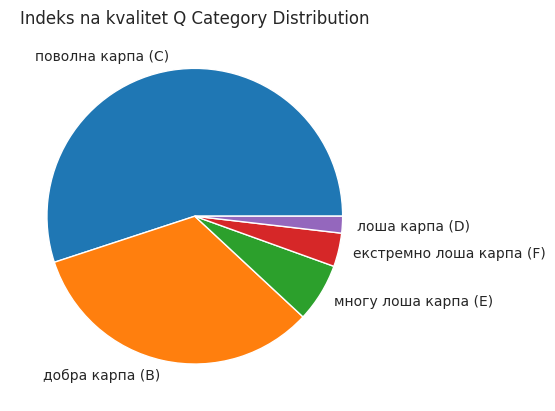

In [2725]:
plt.pie(df2['Индекс на квалитет Q_classification'].value_counts(), labels=df2['Индекс на квалитет Q_classification'].unique())
plt.title("Indeks na kvalitet Q Category Distribution")
plt.show()

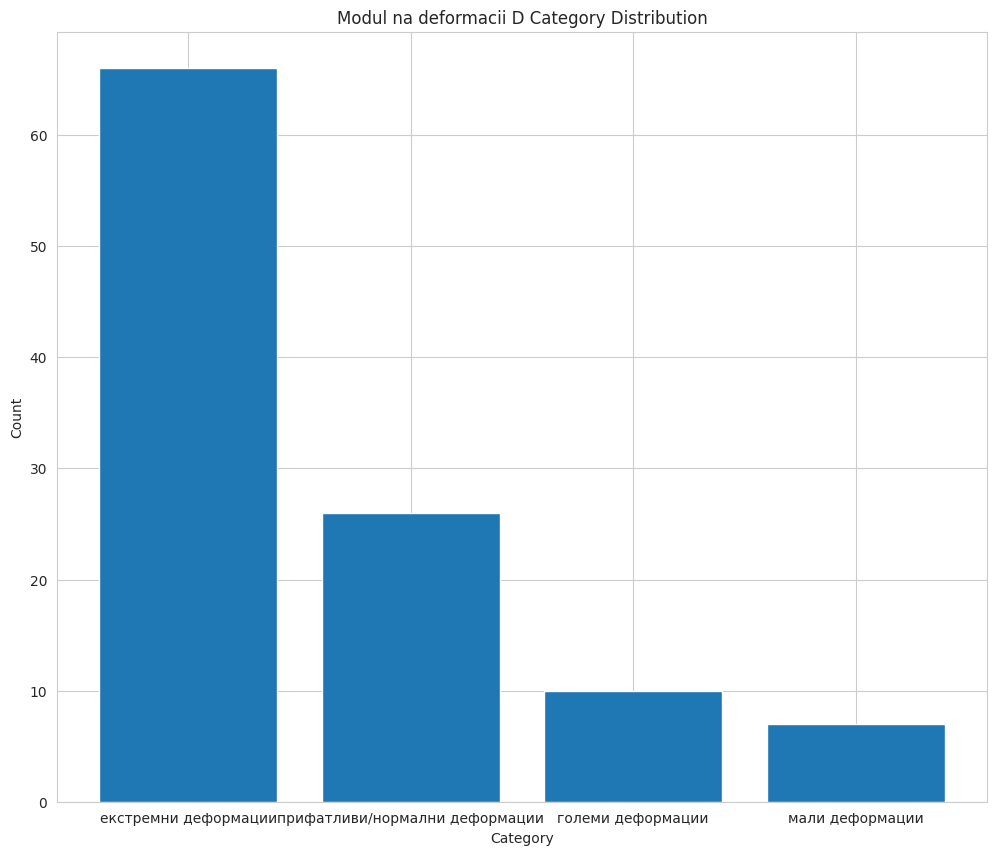

In [2726]:
fig = plt.figure(figsize=(12, 10))
plt.bar(df2['Модул на деформации D_classification'].unique(), df2['Модул на деформации D_classification'].value_counts())
plt.title("Modul na deformacii D Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

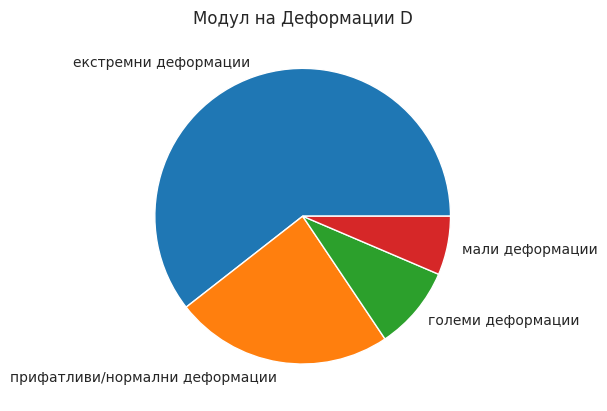

In [2727]:
plt.pie(df2['Модул на деформации D_classification'].value_counts(), labels=df2['Модул на деформации D_classification'].unique())
plt.title("Модул на Деформации D")
plt.show()

##Енкодирање

In [2728]:
categories_RMR = [['5 категорија', '4 категорија', '3 категорија', '2 категорија', '1 категорија']]
encoder = OrdinalEncoder(categories=categories_RMR)
column_to_encode = "RMR_category"
column_reshaped = df2[column_to_encode].values.reshape(-1, 1)
encoded_column = encoder.fit_transform(column_reshaped)
df2[column_to_encode + "_encoded"] = encoded_column

In [2729]:
categories_Indeks_Na_KvalitetQ = [['особено лоша карпа (G)', 'екстремно лоша карпа (F)', 'многу лоша карпа (E)', 'лоша карпа (D)', 'поволна карпа (C)', 'добра карпа (B)', 'многу добра карпа (А)', 'екстремно добра карпа (А)', 'особено добра карпа (А)']]
encoder = OrdinalEncoder(categories=categories_Indeks_Na_KvalitetQ)
column_to_encode = "Индекс на квалитет Q_classification"
column_reshaped = df2[column_to_encode].values.reshape(-1, 1)
encoded_column = encoder.fit_transform(column_reshaped)
df2[column_to_encode + "_encoded"] = encoded_column

In [2730]:
categories_MNDD = [['мали деформации', 'прифатливи/нормални деформации', 'големи деформации', 'екстремни деформации']]
encoder = OrdinalEncoder(categories=categories_MNDD)
column_to_encode = "Модул на деформации D_classification"
column_reshaped = df2[column_to_encode].values.reshape(-1, 1)
encoded_column = encoder.fit_transform(column_reshaped)
df2[column_to_encode + "_encoded"] = encoded_column

In [2731]:
# le = LabelEncoder()
# df2['RMR_category_encoded'] = le.fit_transform(df2['RMR_category'])
# df2

In [2732]:
# le = LabelEncoder()
# df2['IndeksNaKvalitetQ_category_encoded'] = le.fit_transform(df2['Индекс на квалитет Q_classification'])
# df2

In [2733]:
# le = LabelEncoder()
# df2['Модул на деформации D_category_encoded'] = le.fit_transform(df2['Модул на деформации D_classification'])
# df2

In [2734]:
df2 = df2.drop(['Модул на деформации D_classification', 'Модул на деформации D', 'Индекс на квалитет Q_classification', 'Индекс на квалитет Q', 'RMR', 'RMR_category'], axis=1)
df2

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
0       75.0               26.5                70.0           1.50  70.0   
1      189.0               26.5                70.0           1.50  92.0   
2       47.0               26.5                70.0           1.50  85.0   
3      199.0               26.5                70.0           1.50  70.0   
4      108.0               26.0                45.0           0.50  50.0   
..       ...                ...                 ...            ...   ...   
104     75.0               26.9                45.0           0.40  72.0   
105     81.0               26.3                70.0           1.00  60.0   
106    164.0               26.7                42.0           0.20  65.0   
107     18.0               27.3                65.0           2.00  90.0   
108     19.0               26.9                42.0           0.15  66.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
0                                  400.0      4450.0                0.220   
1                                  650.0      4600.0                0.220   
2                                  400.0      4450.0                0.220   
3                                  700.0      4450.0                0.220   
4                                  100.0      2000.0                0.260   
..                                   ...         ...                  ...   
104                                200.0      2900.0                0.260   
105                                 90.0      3000.0                0.260   
106                                120.0      2700.0                0.270   
107                                350.0      3600.0                0.260   
108                                 95.0      2900.0                0.265   

     RMR_category_encoded  Индекс на квалитет Q_classification_encoded  \
0                     3.0                                          4.0   
1                     3.0                                          5.0   
2                     3.0                                          4.0   
3                     3.0                                          4.0   
4                     1.0                                          2.0   
..                    ...                                          ...   
104                   2.0                                          3.0   
105                   2.0                                          3.0   
106                   2.0                                          2.0   
107                   3.0                                          3.0   
108                   2.0                                          2.0   

     Модул на деформации D_classification_encoded  
0                                             3.0  
1                                             3.0  
2                                             3.0  
3                                             3.0  
4                                             1.0  
..                                            ...  
104                                           1.0  
105                                           1.0  
106                                           1.0  
107                                           1.0  
108                                           1.0  

[109 rows x 11 columns]

#Класификација

##Decision Tree

Дрвото на одлуки е supervised  алгоритам за машинско учење што се користи  за класификација и регресија. Секој внатрешен јазол претставува карактеристика или атрибут, секоја гранка претставува правило за одлучување и секој лист јазол го претставува исходот или предвидувањето. Целта е да се создаде дрво што може да прави точни предвидувања со минимизирање на нечистотијата или максимизирање на добивката на информации при секое делење. За класификација се користат мерки за нечистотија како што се Џини Индекс или Ентропија, додека во задачите за регресија се користат средната квадратна грешка или други метрики.

###Таргет колона е RMR

In [2735]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2736]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [2737]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9090909090909091
Precision: 0.9242424242424243
Recall: 0.9090909090909091
F1 Score: 0.9044512106713064


In [2738]:
y = y.astype(int)
y = np.where(y == 3, 2, y - 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9090909090909091
Precision: 0.9242424242424243
Recall: 0.9090909090909091
F1 Score: 0.9044512106713064


###Таргет колона е Индекс на квалитет Q

In [2739]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2740]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [2741]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9090909090909091
Precision: 0.922077922077922
Recall: 0.9090909090909091
F1 Score: 0.9069055944055944


In [2742]:
y = y.astype(int)
y = np.where(y == 3, 2, y - 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9545454545454546
Precision: 0.958041958041958
Recall: 0.9545454545454546
F1 Score: 0.9541176470588236


###Таргет колона е Модул на деформации D

In [2743]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2744]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [2745]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7727272727272727
Precision: 0.7844155844155843
Recall: 0.7727272727272727
F1 Score: 0.7763845350052246


In [2746]:
y = y.astype(int)
# y = y - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7272727272727273
Precision: 0.6818181818181818
Recall: 0.7272727272727273
F1 Score: 0.7000000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Резултатите пред користење на XGBoost покажаа дека кога таргет колоната Индекс на Квалитет Q имаат најдобри accuracy, precision, recall, f1score, иако има доста блиски вредности доколку таргет колона е RMR.

По употребување на XGBoost најдобри резулти дава кога таргет колона е Индекс на квалитет Q. Доколку по таргет колоната ни е Модул на деформации D, имаме послаби резултати.

Имаме минимално влошување на резултатите при подобрување кога таргет колона ни е Модул на деформации D.

##Naive Bayes

Naive Bayes е популарен алгоритам за машинско учење што се користи за задачи за класификација. Naive Bayes ја прави претпоставката за независност на атрибутите за да ја поедностави пресметката на условните веројатности.

###Таргет колона е RMR

In [2747]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D_classification_encoded', 'Индекс на квалитет Q_classification_encoded']]
y = df2[['RMR_category_encoded']]

In [2748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2749]:
nb_classifier = CategoricalNB()

In [2750]:
nb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

In [2751]:
y_pred = nb_classifier.predict(X_test)

In [2752]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8636363636363636
Precision: 0.8951048951048951
Recall: 0.8636363636363636
F1 Score: 0.859903381642512


In [2753]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  2  0]
 [ 0 10  0]
 [ 0  1  1]]


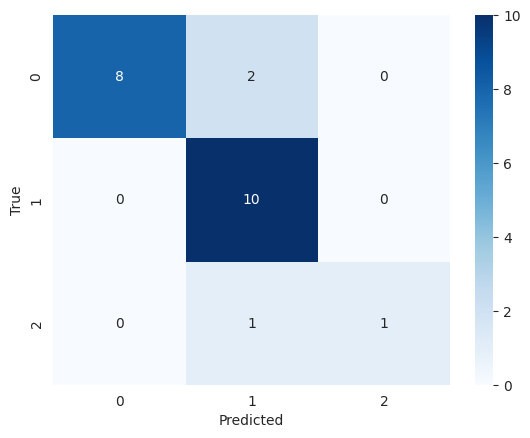

In [2754]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [2755]:
y = y.astype(int)
y = np.where(y == 3, 2, y - 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9090909090909091
Precision: 0.9242424242424243
Recall: 0.9090909090909091
F1 Score: 0.9044512106713064


###Таргет колона е Индекс на квалитет Q

In [2756]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2757]:
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2758]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9090909090909091
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091


In [2759]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  1  0]
 [ 1 11  0]
 [ 0  0  1]]


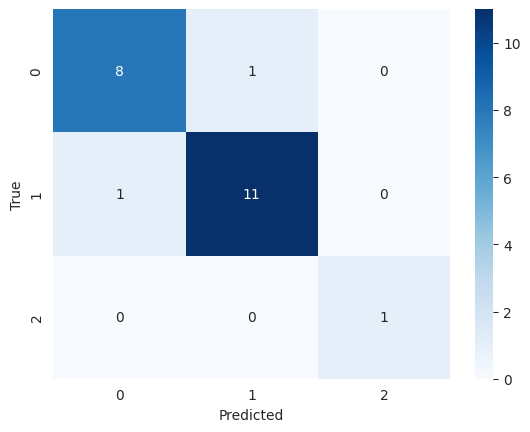

In [2760]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [2761]:
y = y.astype(int)
y =  y - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9545454545454546
Precision: 0.958041958041958
Recall: 0.9545454545454546
F1 Score: 0.9541176470588236


###Таргет колона е Модул на деформации D

In [2762]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2763]:
nb_classifier = CategoricalNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2764]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8636363636363636
Precision: 0.7954545454545454
Recall: 0.8636363636363636
F1 Score: 0.8211334120425029


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2765]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3  1  0  0]
 [ 0 15  0  0]
 [ 0  2  0  0]
 [ 0  0  0  1]]


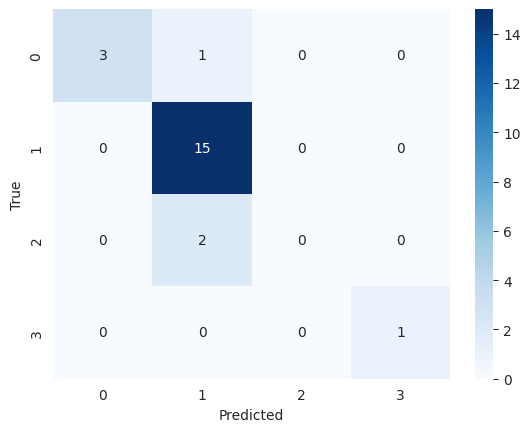

In [2766]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [2767]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7272727272727273
Precision: 0.6818181818181818
Recall: 0.7272727272727273
F1 Score: 0.7000000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Според добиените резултати пред а и после кога се прави XGBoost најдобри резултати дава кога таргет колона е Индекс на Квалитет Q.

Тука кога пробуваме таргет колона да е Модул на деформации D, имаме разлика со тоа што по употреба на XGBoost имаме помали вредности, за разлика од другите две колони пробуваме да се таргет.

##KNN Classifier

K-Nearest Neighbors (KNN) е популарен supervised  алгоритам за машинско учење што се користи и за класификација и за регресија. Овој модел работи со К најблиски соседи. Класификаторот KNN може да се користи во различни домени како што се препознавање на шаблони, класификација на слики и системи за препораки.

###Таргет колона е RMR

In [2768]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2769]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [2770]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [2771]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7272727272727273
Precision: 0.7474747474747474
Recall: 0.7272727272727273
F1 Score: 0.7261128026678265


In [2772]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7 3 0]
 [2 8 0]
 [0 1 1]]


In [2773]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
selector = SelectKBest(k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
knn_classifier_improved = KNeighborsClassifier()
knn_classifier_improved.fit(X_train_selected, y_train)
y_pred_improved = knn_classifier_improved.predict(X_test_selected)
accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved, average='weighted')
recall_improved = recall_score(y_test, y_pred_improved, average='weighted')
f1_improved = f1_score(y_test, y_pred_improved, average='weighted')
print("Accuracy:", accuracy_improved)
print("Precision:", precision_improved)
print("Recall:", recall_improved)
print("F1 Score:", f1_improved)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8636363636363636
Precision: 0.8719008264462809
Recall: 0.8636363636363636
F1 Score: 0.8656869446343133


###Таргет е колоната Модул на деформации D

In [2774]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2775]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [2776]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6363636363636364
Precision: 0.572192513368984
Recall: 0.6363636363636364
F1 Score: 0.6022727272727274


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2777]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 1  3  0  0]
 [ 3 12  0  0]
 [ 0  2  0  0]
 [ 0  0  0  1]]


In [2778]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
selector = SelectKBest(k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
knn_classifier_improved = KNeighborsClassifier()
knn_classifier_improved.fit(X_train_selected, y_train)
y_pred_improved = knn_classifier_improved.predict(X_test_selected)
accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved, average='weighted')
recall_improved = recall_score(y_test, y_pred_improved, average='weighted')
f1_improved = f1_score(y_test, y_pred_improved, average='weighted')
print("Accuracy:", accuracy_improved)
print("Precision:", precision_improved)
print("Recall:", recall_improved)
print("F1 Score:", f1_improved)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7272727272727273
Precision: 0.8370064279155188
Recall: 0.7272727272727273
F1 Score: 0.7424242424242423


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


###Таргет е атрибутот Индекс на квалитет Q

In [2779]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2780]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [2781]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8181818181818182
Precision: 0.8246753246753247
Recall: 0.8181818181818182
F1 Score: 0.8138111888111887


In [2782]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  3  0]
 [ 1 11  0]
 [ 0  0  1]]


In [2783]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
selector = SelectKBest(k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
knn_classifier_improved = KNeighborsClassifier()
knn_classifier_improved.fit(X_train_selected, y_train)
y_pred_improved = knn_classifier_improved.predict(X_test_selected)
accuracy_improved = accuracy_score(y_test, y_pred_improved)
precision_improved = precision_score(y_test, y_pred_improved, average='weighted')
recall_improved = recall_score(y_test, y_pred_improved, average='weighted')
f1_improved = f1_score(y_test, y_pred_improved, average='weighted')
print("KNN Accuracy (with additional techniques):", accuracy_improved)
print("KNN Precision (with additional techniques):", precision_improved)
print("KNN Recall (with additional techniques):", recall_improved)
print("KNN F1 Score (with additional techniques):", f1_improved)

KNN Accuracy (with additional techniques): 0.8636363636363636
KNN Precision (with additional techniques): 0.868595041322314
KNN Recall (with additional techniques): 0.8636363636363636
KNN F1 Score (with additional techniques): 0.8642604535053047


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Според добиените резултати кога таргет колона е Индекс со квалитет на Q  ни дава најдобри резултати според accuracy и precision.

Со користење на Стандар Скалер,  SeleckKBest, најдобри резултати имаме кога имаме таргет колона RMR, иако има слични вредности со Индекс на квалитет Q и по подобрувањене не се толку добри резултати.

##Logistic Regression

Логистичка регресија е популарен алгоритам за supervised учење што се користи за проблеми со бинарна класификација. Логистичката регресија ја моделира врската помеѓу зависната променлива и една или повеќе независни променливи со проценка на веројатностите со помош на логистичка функција. Логистичката регресија е линеарен алгоритам и работи добро кога границата на одлуката е релативно линеарна или може да се приближи со линеарна функција. Тој е ефикасен, може да се толкува и може да се справи со големи збирки на податоци. Сепак, може да не функционира добро кога се работи со високо нелинеарни врски или кога има сложени интеракции помеѓу карактеристиките.

###Таргет колона е RMR

In [2784]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D_classification_encoded', 'Индекс на квалитет Q_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2785]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2786]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)

In [2787]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("R-squared Score:", r2)

Accuracy: 0.7272727272727273
Precision: 0.7272727272727273
Recall: 0.7272727272727273
F1 Score: 0.7272727272727273
R-squared Score: 0.009999999999999898


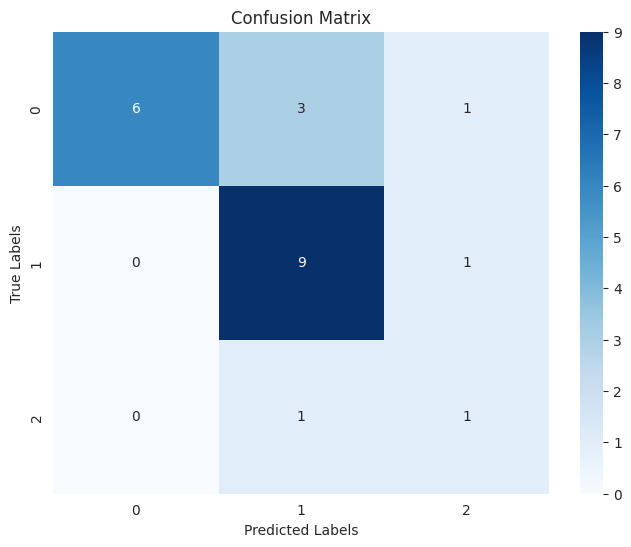

In [2788]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [2789]:
boosting_model = AdaBoostClassifier(base_estimator=logreg, n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packa

Accuracy: 0.7272727272727273
Precision: 0.7431129476584022
Recall: 0.7272727272727273
F1 Score: 0.729004329004329


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

###Таргет колона е Индекс на квалитет Q

In [2790]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2791]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2792]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)

In [2793]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("R-squared Score:", r2)

Accuracy: 0.6818181818181818
Precision: 0.6818181818181818
Recall: 0.6818181818181818
F1 Score: 0.6818181818181818
R-squared Score: -0.4102564102564097


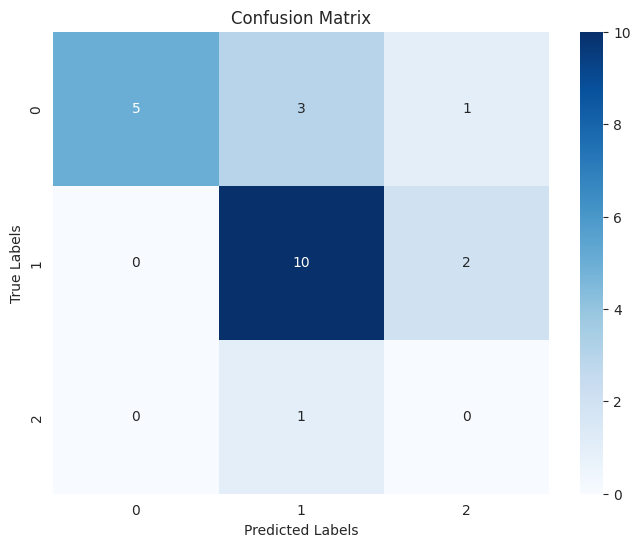

In [2794]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [2795]:
boosting_model = AdaBoostClassifier(base_estimator=logreg, n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packa

Accuracy: 0.45454545454545453
Precision: 0.5826446280991736
Recall: 0.45454545454545453
F1 Score: 0.4950592885375494


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

###Таргет колона е Модул на деформации D

In [2796]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2797]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2798]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
r2 = r2_score(y_test, y_pred)

In [2799]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("R-squared Score:", r2)

Accuracy: 0.6818181818181818
Precision: 0.6818181818181818
Recall: 0.6818181818181818
F1 Score: 0.6818181818181818
R-squared Score: 0.30000000000000004


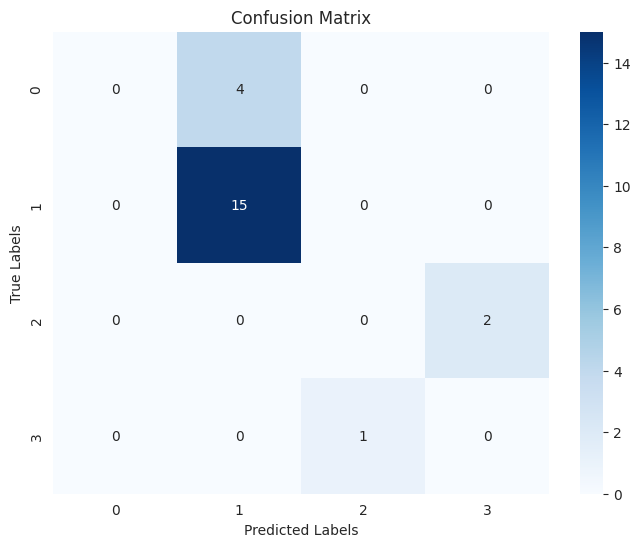

In [2800]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [2801]:
boosting_model = AdaBoostClassifier(base_estimator=logreg, n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packa

Accuracy: 0.6363636363636364
Precision: 0.792929292929293
Recall: 0.6363636363636364
F1 Score: 0.6596153846153846


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Пред употреба на AdaBoosting според резултатите доколку таргет е RMR ни дава најдобри резултати, додека пак кога таргет е Индекс на квалитет Q и Модул на деформации D  тие имаа ист accurancy, f1-score, recall, precision.

По употреба на AdaBoosting најдобар резултати дава  кога таргет колона е RMR , според f1score, recall, accuracy,  а  таргет колона е Модул на деформации D има  подобри precision.

Значително имаме намалување при користење на AdaBoosting кога таргет колона ни е Индекс на квалутет Q.

##Random Forest

Random Forest е моќен и разноврсен алгоритам за учење на ансамблот кој вообичаено се користи за регресија и  класификација. Тоа е продолжување на алгоритмот на дрвото на одлуки што гради колекција од стебла на одлуки и ги комбинира нивните предвидувања за да ја направи конечната класификација. Воведува дополнително ниво на случајност со избирање на случаен подмножество карактеристики за секое дрво за време на обуката.
Овој случаен избор на карактеристики осигурува дека секое дрво се фокусира на различни подмножества на карактеристики, намалувајќи ја корелацијата помеѓу дрвјата и подобрувајќи ја различноста на моделот.

###Таргет колона е RMR

In [2802]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2803]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

<ipython-input-2803-62a878db9663>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


In [2804]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [2805]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9090909090909091
Precision: 0.9242424242424243
Recall: 0.9090909090909091
F1 Score: 0.9044512106713064


###Таегет колона е Модул на деформации D

In [2806]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2807]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

<ipython-input-2807-62a878db9663>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


In [2808]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [2809]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8636363636363636
Precision: 0.8693181818181818
Recall: 0.8636363636363636
F1 Score: 0.858260019550342


###Таргет колона е Индекс на квалитет Q

In [2810]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2811]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

<ipython-input-2811-62a878db9663>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


In [2812]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [2813]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9545454545454546
Precision: 0.958041958041958
Recall: 0.9545454545454546
F1 Score: 0.9541176470588236


Тука кај Random Forest имаме прилично добри резултати посебно кога таргет колона е Индекс на квалитет Q, од таа причина сметам дека нема потреба од некој есембл метод за подобри резултати и затоа што исто така random forest ни служи како есембл метод.

##Support Vector Machines

SVM е популарен надгледуван алгоритам за учење што се користи и за класификација и за регресија. Тој е особено ефикасен во решавањето на проблемите со бинарна класификација, но исто така може да се прошири за да се справи со класификација со повеќе класи. SVM има за цел да најде оптимална хиперрамнина која ги одвојува податочните точки кои припаѓаат на различни класи со најголема можна маргина.

###Таргет колона е RMR

In [2814]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D_classification_encoded', 'Индекс на квалитет Q_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2815]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2816]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [2817]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7272727272727273
Precision: 0.7727272727272727
Recall: 0.7272727272727273
F1 Score: 0.7223707664884136


In [2818]:
boosting_classifier = AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9090909090909091
Precision: 0.9242424242424243
Recall: 0.9090909090909091
F1 Score: 0.9044512106713064


###Таргет колона е Модул на деформации D

In [2819]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2820]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2821]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [2822]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8181818181818182
Precision: 0.8363636363636363
Recall: 0.8181818181818182
F1 Score: 0.8181818181818182


In [2823]:
boosting_classifier = AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8636363636363636
Precision: 0.8693181818181818
Recall: 0.8636363636363636
F1 Score: 0.858260019550342


###Таргет колона е Индекс на квалитет Q

In [2824]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2825]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2826]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2827]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8636363636363636
Precision: 0.916083916083916
Recall: 0.8636363636363636
F1 Score: 0.8834090909090908


In [2828]:
boosting_classifier = AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, random_state=42)
boosting_classifier.fit(X_train, y_train)
y_pred_boosting = boosting_classifier.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1 Score:", f1_boosting)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9545454545454546
Precision: 0.958041958041958
Recall: 0.9545454545454546
F1 Score: 0.9541176470588236


Кога таргет колона ни е Индекс на квалитет Q ни дава најдобри резултати и при тоа немаме користено AdaBoosting за да подобримо резултати.

По користење на AdaBoosting најдобри резултати дава кога таргет колона е Индекс на квалитет Q.

###**RMR**

####Пред подобрување

In [2829]:
data1 = {'Model name':['Decision Tree','Naive Bayes','KNN Classifier', 'Logistic Regression', 'Random Forest', 'SVM'],
        'Accuracy':[0.91,0.86,0.73,0.73,0.91,0.73],
        'Precision':[0.92,0.90,0.75,0.73,0.92,0.77],
        'Recall':[0.90,0.86,0.73,0.73,0.91,0.73],
        'F1-Score':[0.91,0.86,0.73,0.73,0.90,0.72]}
dataframe1 = pd.DataFrame(data1)
dataframe1

Model name  Accuracy  Precision  Recall  F1-Score
0        Decision Tree      0.91       0.92    0.90      0.91
1          Naive Bayes      0.86       0.90    0.86      0.86
2       KNN Classifier      0.73       0.75    0.73      0.73
3  Logistic Regression      0.73       0.73    0.73      0.73
4        Random Forest      0.91       0.92    0.91      0.90
5                  SVM      0.73       0.77    0.73      0.72

Најдобри резултати имаме при користење на моделот Random Forest, а најлош при Logistic Regression

####После подобрување

In [2830]:
data2 = {'Model name':['Decision Tree','Naive Bayes','KNN Classifier', 'Logistic Regression', 'SVM'],
        'Accuracy':[0.91,0.91,0.86,0.73,0.91],
        'Precision':[0.92,0.92,0.87,0.74,0.92],
        'Recall':[0.90,0.91,0.86,0.73,0.91],
        'F1-Score':[0.91,0.90,0.87,0.73,0.90]}
dataframe2 = pd.DataFrame(data2)
dataframe2

Model name  Accuracy  Precision  Recall  F1-Score
0        Decision Tree      0.91       0.92    0.90      0.91
1          Naive Bayes      0.91       0.92    0.91      0.90
2       KNN Classifier      0.86       0.87    0.86      0.87
3  Logistic Regression      0.73       0.74    0.73      0.73
4                  SVM      0.91       0.92    0.91      0.90

Најдобри резултати имаме при Naive Bayes, a најлоши кај Logistic Regression

###**Индекс на Квалитет Q**

####Пред подобрување

In [2831]:
data3 = {'Model name':['Decision Tree','Naive Bayes','KNN Classifier', 'Logistic Regression', 'Random Forest', 'SVM'],
        'Accuracy':[0.91,0.91,0.82,0.68,0.95,0.86],
        'Precision':[0.92,0.91,0.82,0.68,0.96,0.92],
        'Recall':[0.91,0.91,0.82,0.68,0.95,0.86],
        'F1-Score':[0.91,0.91,0.81,0.68,0.95,0.88]}
dataframe3 = pd.DataFrame(data3)
dataframe3

Model name  Accuracy  Precision  Recall  F1-Score
0        Decision Tree      0.91       0.92    0.91      0.91
1          Naive Bayes      0.91       0.91    0.91      0.91
2       KNN Classifier      0.82       0.82    0.82      0.81
3  Logistic Regression      0.68       0.68    0.68      0.68
4        Random Forest      0.95       0.96    0.95      0.95
5                  SVM      0.86       0.92    0.86      0.88

Random Forest e тука како најдобар модел, Logistic Regression дава најлоши резултати.

####После подобрување

In [2832]:
data4= {'Model name':['Decision Tree','Naive Bayes','KNN Classifier', 'Logistic Regression', 'SVM'],
        'Accuracy':[0.95,0.95,0.86,0.45,0.95],
        'Precision':[0.96,0.96,0.87,0.58,0.96],
        'Recall':[0.95,0.95,0.86,0.45,0.95],
        'F1-Score':[0.95,0.96,0.87,0.50,0.95]}
dataframe4 = pd.DataFrame(data4)
dataframe4

Model name  Accuracy  Precision  Recall  F1-Score
0        Decision Tree      0.95       0.96    0.95      0.95
1          Naive Bayes      0.95       0.96    0.95      0.96
2       KNN Classifier      0.86       0.87    0.86      0.87
3  Logistic Regression      0.45       0.58    0.45      0.50
4                  SVM      0.95       0.96    0.95      0.95

Најдобри резултати дава  Naive Bayes и тука лоши резултати дава Logistic Regression

###**Модул на деформации D**

###Пред подобрување

In [2833]:
data5 = {'Model name':['Decision Tree','Naive Bayes','KNN Classifier', 'Logistic Regression', 'Random Forest', 'SVM'],
        'Accuracy':[0.77,0.86,0.64,0.68,0.86,0.82],
        'Precision':[0.78,0.80,0.57,0.68,0.87,0.84],
        'Recall':[0.77,0.86,0.63,0.68,0.86,0.82],
        'F1-Score':[0.78,0.82,0.60,0.68,0.86,0.82]}
dataframe5 = pd.DataFrame(data5)
dataframe5

Model name  Accuracy  Precision  Recall  F1-Score
0        Decision Tree      0.77       0.78    0.77      0.78
1          Naive Bayes      0.86       0.80    0.86      0.82
2       KNN Classifier      0.64       0.57    0.63      0.60
3  Logistic Regression      0.68       0.68    0.68      0.68
4        Random Forest      0.86       0.87    0.86      0.86
5                  SVM      0.82       0.84    0.82      0.82

Random Forest ни дава за минимално подобри резултати од Naive Bayes. Најлоши имаме кај KNN Clasiffier.

###После подобрување

In [2834]:
data6= {'Model name':['Decision Tree','Naive Bayes','KNN Classifier', 'Logistic Regression', 'SVM'],
        'Accuracy':[0.72,0.73,0.73,0.64,0.86],
        'Precision':[0.68,0.68,0.84,0.79,0.87],
        'Recall':[0.72,0.73,0.73,0.64,0.86],
        'F1-Score':[0.70,0.70,0.74,0.66,0.86]}
dataframe6 = pd.DataFrame(data6)
dataframe6

Model name  Accuracy  Precision  Recall  F1-Score
0        Decision Tree      0.72       0.68    0.72      0.70
1          Naive Bayes      0.73       0.68    0.73      0.70
2       KNN Classifier      0.73       0.84    0.73      0.74
3  Logistic Regression      0.64       0.79    0.64      0.66
4                  SVM      0.86       0.87    0.86      0.86

Како најдобар модел тука ни е SVM, најлош ни е Logistic Regression.

Доколку работиме со класификација понатаму би се препорачало таргет колона да е Индекс на квалутет Q, бидејќи дава најдобри резултати.

Модел кој најлоши работи класификација за овој датасет е Logistic Regressio, додека пак Random Forest ни дава најдобри.

Naive Bayes скоро секаде по подобрување ни дава уште подобри резултати, иако и предходно ни дава солидни и добри резултати.

#Регресија

##Decision Tree


###Кога сите три се таргет колони

In [2835]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент']]
y = df[['RMR', 'Модул на деформации D', 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2836]:
X_train

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
65       4.0              27.00                33.0          0.010  51.0   
26      72.0              26.30                45.0          1.000  95.0   
22      10.0              26.85                28.0          0.400  55.0   
31      49.0              28.70                60.0          0.800  70.0   
47      21.0              24.00                17.0          0.015  30.0   
..       ...                ...                 ...            ...   ...   
71      27.0              25.50                32.0          0.012  35.0   
14      15.0              26.20                58.0          0.500  35.0   
92     145.0              26.00                27.0          0.400  55.0   
51      21.0              26.80                47.0          0.012  80.0   
102    178.0              28.70               150.0          1.000  80.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  
65                                 110.0      1850.0                 0.32  
26                                 500.0      4900.0                 0.24  
22                                 110.0      2900.0                 0.30  
31                                 300.0      2750.0                 0.24  
47                                  80.0      2000.0                 0.32  
..                                   ...         ...                  ...  
71                                 135.0      2270.0                 0.28  
14                                 150.0      2400.0                 0.26  
92                                 180.0      2900.0                 0.26  
51                                 200.0      3300.0                 0.25  
102                                300.0      3800.0                 0.25  

[87 rows x 8 columns]

In [2837]:
X_test

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
78     18.00               24.2               12.00          0.300  74.0   
10     45.00               27.0               30.00          2.000  40.0   
4     108.00               26.0               45.00          0.500  50.0   
84     50.00               25.6               95.00          0.300  60.0   
64     36.00               26.8               36.00          0.012  80.0   
68      3.00               25.7               28.00          0.014  35.0   
30     19.00               27.0               55.00          0.800  22.0   
45     23.72               27.0               75.00          1.000  35.0   
96     50.00               27.0               85.00          2.100  75.0   
11     40.00               28.0               65.00          2.000  65.0   
79     25.00               26.7               58.00          0.600  80.0   
80     45.50               24.4                5.55          0.500  62.0   
0      75.00               26.5               70.00          1.500  70.0   
81     25.00               25.9               29.00          0.400  68.0   
18      6.00               26.9               22.50          0.100  45.0   
70     24.00               26.1               29.00          0.010  74.0   
56     22.00               26.7               84.00          0.010  80.0   
72     45.00               24.2                5.55          0.500  63.0   
107    18.00               27.3               65.00          2.000  90.0   
42     93.00               27.0               38.00          0.500  90.0   
12     40.00               26.2               62.00          0.500  52.0   
36     15.00               26.2               60.00          1.500  80.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  
78                                  65.0      1950.0                0.280  
10                                  80.0      2200.0                0.300  
4                                  100.0      2000.0                0.260  
84                                 175.0      3050.0                0.270  
64                                 290.0      3100.0                0.250  
68                                 140.0      1460.0                0.300  
30                                 200.0      1400.0                0.280  
45                                 120.0      1800.0                0.250  
96                                 200.0      3400.0                0.265  
11                                 200.0      2900.0                0.250  
79                                 125.0      2200.0                0.265  
80                                 100.0      2050.0                0.270  
0                                  400.0      4450.0                0.220  
81                                 180.0      3100.0                0.265  
18                                  80.0      2000.0                0.330  
70                                 165.0      1700.0                0.260  
56                                 190.0      4000.0                0.250  
72                                  70.0      1900.0                0.280  
107                                350.0      3600.0                0.260  
42                                 600.0      3600.0                0.250  
12                                 150.0      2500.0                0.260  
36                                 500.0      2600.0                0.250

In [2838]:
y_train

RMR  Модул на деформации D  Индекс на квалитет Q
65   40.0                  1.300                 1.510
26   54.0                  5.000                 1.700
22   40.0                  2.100                 0.500
31   55.0                  6.000                 3.500
47   33.0                  1.300                 0.106
..    ...                    ...                   ...
71   40.0                  1.350                 1.500
14   47.0                  2.300                 0.400
92   50.0                  0.905                 1.200
51   52.0                  2.400                 1.800
102  74.0                  4.200                 3.800

[87 rows x 3 columns]

In [2839]:
y_test

RMR  Модул на деформации D  Индекс на квалитет Q
78   30.0                  0.550                 0.505
10   35.0                  2.000                 0.200
4    38.0                  2.000                 0.100
84   50.0                  1.115                 1.250
64   50.0                  2.250                 1.800
68   40.0                  1.400                 1.550
30   30.0                  2.000                 0.400
45   35.0                  1.200                 0.200
96   55.0                  3.200                 3.200
11   55.0                  3.100                 2.500
79   40.0                  0.910                 1.050
80   35.0                  0.600                 0.800
0    72.0                 11.000                 8.800
81   50.0                  1.700                 1.300
18   40.0                  1.300                 0.400
70   45.0                  1.700                 1.830
56   55.0                  2.400                 1.800
72   30.0                  0.550                 0.500
107  62.0                  3.800                 3.500
42   55.0                  7.300                 1.500
12   45.0                  4.000                 0.400
36   58.0                  6.250                 3.000

In [2840]:
regressor = DecisionTreeRegressor(random_state=42)

In [2841]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [2842]:
y_pred = regressor.predict(X_test)

In [2843]:
y_pred

array([[45.   ,  1.7  ,  1.   ],
       [35.   ,  1.4  ,  0.15 ],
       [38.   ,  0.9  ,  0.85 ],
       [51.   ,  0.905,  1.1  ],
       [42.   ,  2.7  ,  0.4  ],
       [41.   ,  1.4  ,  1.2  ],
       [30.   ,  2.   ,  0.4  ],
       [30.   ,  2.   ,  0.4  ],
       [52.   ,  2.45 ,  1.83 ],
       [50.   ,  2.2  ,  1.8  ],
       [40.   ,  0.85 ,  1.1  ],
       [35.   ,  0.605,  0.85 ],
       [72.   , 11.   ,  8.8  ],
       [50.   ,  0.91 ,  1.25 ],
       [35.   ,  1.4  ,  0.37 ],
       [43.   ,  1.5  ,  1.54 ],
       [52.   ,  2.4  ,  1.8  ],
       [30.   ,  0.55 ,  0.55 ],
       [55.   ,  3.4  ,  3.   ],
       [54.   ,  5.   ,  1.7  ],
       [50.   ,  2.2  ,  1.8  ],
       [48.   ,  3.75 ,  1.4  ]])

In [2844]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 8.99994318181818
R2 Score: 0.8349598818657161
Mean Absolute Error: 1.4363636363636363


###Таргет колона е RMR

In [2845]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2846]:
X_train

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
65       4.0              27.00                33.0          0.010  51.0   
26      72.0              26.30                45.0          1.000  95.0   
22      10.0              26.85                28.0          0.400  55.0   
31      49.0              28.70                60.0          0.800  70.0   
47      21.0              24.00                17.0          0.015  30.0   
..       ...                ...                 ...            ...   ...   
71      27.0              25.50                32.0          0.012  35.0   
14      15.0              26.20                58.0          0.500  35.0   
92     145.0              26.00                27.0          0.400  55.0   
51      21.0              26.80                47.0          0.012  80.0   
102    178.0              28.70               150.0          1.000  80.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
65                                 110.0      1850.0                 0.32   
26                                 500.0      4900.0                 0.24   
22                                 110.0      2900.0                 0.30   
31                                 300.0      2750.0                 0.24   
47                                  80.0      2000.0                 0.32   
..                                   ...         ...                  ...   
71                                 135.0      2270.0                 0.28   
14                                 150.0      2400.0                 0.26   
92                                 180.0      2900.0                 0.26   
51                                 200.0      3300.0                 0.25   
102                                300.0      3800.0                 0.25   

     Модул на деформации D  Индекс на квалитет Q  
65                   1.300                 1.510  
26                   5.000                 1.700  
22                   2.100                 0.500  
31                   6.000                 3.500  
47                   1.300                 0.106  
..                     ...                   ...  
71                   1.350                 1.500  
14                   2.300                 0.400  
92                   0.905                 1.200  
51                   2.400                 1.800  
102                  4.200                 3.800  

[87 rows x 10 columns]

In [2847]:
X_test

Надслој  Волуменска тежина  Јакост на притисок  Доток на вода   RQD  \
78     18.00               24.2               12.00          0.300  74.0   
10     45.00               27.0               30.00          2.000  40.0   
4     108.00               26.0               45.00          0.500  50.0   
84     50.00               25.6               95.00          0.300  60.0   
64     36.00               26.8               36.00          0.012  80.0   
68      3.00               25.7               28.00          0.014  35.0   
30     19.00               27.0               55.00          0.800  22.0   
45     23.72               27.0               75.00          1.000  35.0   
96     50.00               27.0               85.00          2.100  75.0   
11     40.00               28.0               65.00          2.000  65.0   
79     25.00               26.7               58.00          0.600  80.0   
80     45.50               24.4                5.55          0.500  62.0   
0      75.00               26.5               70.00          1.500  70.0   
81     25.00               25.9               29.00          0.400  68.0   
18      6.00               26.9               22.50          0.100  45.0   
70     24.00               26.1               29.00          0.010  74.0   
56     22.00               26.7               84.00          0.010  80.0   
72     45.00               24.2                5.55          0.500  63.0   
107    18.00               27.3               65.00          2.000  90.0   
42     93.00               27.0               38.00          0.500  90.0   
12     40.00               26.2               62.00          0.500  52.0   
36     15.00               26.2               60.00          1.500  80.0   

     Средно растојание меѓу пукнатини Ls  Брзини Vp   Поасонов коефициент  \
78                                  65.0      1950.0                0.280   
10                                  80.0      2200.0                0.300   
4                                  100.0      2000.0                0.260   
84                                 175.0      3050.0                0.270   
64                                 290.0      3100.0                0.250   
68                                 140.0      1460.0                0.300   
30                                 200.0      1400.0                0.280   
45                                 120.0      1800.0                0.250   
96                                 200.0      3400.0                0.265   
11                                 200.0      2900.0                0.250   
79                                 125.0      2200.0                0.265   
80                                 100.0      2050.0                0.270   
0                                  400.0      4450.0                0.220   
81                                 180.0      3100.0                0.265   
18                                  80.0      2000.0                0.330   
70                                 165.0      1700.0                0.260   
56                                 190.0      4000.0                0.250   
72                                  70.0      1900.0                0.280   
107                                350.0      3600.0                0.260   
42                                 600.0      3600.0                0.250   
12                                 150.0      2500.0                0.260   
36                                 500.0      2600.0                0.250   

     Модул на деформации D  Индекс на квалитет Q  
78                   0.550                 0.505  
10                   2.000                 0.200  
4                    2.000                 0.100  
84                   1.115                 1.250  
64                   2.250                 1.800  
68                   1.400                 1.550  
30                   2.000                 0.400  
45                   1.200                 0.200  
96                   3.20

In [2848]:
y_train

RMR
65   40.0
26   54.0
22   40.0
31   55.0
47   33.0
..    ...
71   40.0
14   47.0
92   50.0
51   52.0
102  74.0

[87 rows x 1 columns]

In [2849]:
y_test

RMR
78   30.0
10   35.0
4    38.0
84   50.0
64   50.0
68   40.0
30   30.0
45   35.0
96   55.0
11   55.0
79   40.0
80   35.0
0    72.0
81   50.0
18   40.0
70   45.0
56   55.0
72   30.0
107  62.0
42   55.0
12   45.0
36   58.0

In [2850]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([30., 35., 40., 50., 52., 40., 28., 40., 55., 55., 43., 35., 72.,
       48., 35., 52., 52., 30., 50., 43., 47., 50.])

In [2851]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 22.227272727272727
R2 Score: 0.8222317695854058
Mean Absolute Error: 2.9545454545454546


###Таргет колона е Модул на деформации D

In [2852]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2853]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 0.75 ,  1.4  ,  2.05 ,  0.905,  2.5  ,  1.5  ,  2.2  ,  0.54 ,
        3.3  ,  2.2  ,  1.5  ,  0.605, 11.   ,  1.5  ,  1.4  ,  1.5  ,
        2.4  ,  0.55 ,  3.4  ,  5.5  ,  2.3  ,  3.75 ])

In [2854]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.6724011363636364
R2 Score: 0.8903889569018231
Mean Absolute Error: 0.48931818181818176


###Таргет колона е атрибутот Индекс на квалитет Q

In [2855]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2856]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([0.55, 0.15, 0.8 , 1.1 , 1.8 , 1.5 , 0.4 , 0.55, 2.  , 3.1 , 1.1 ,
       0.8 , 8.8 , 1.2 , 1.51, 1.54, 2.  , 0.55, 3.8 , 1.58, 0.4 , 4.  ])

In [2857]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.22316477272727273
R2 Score: 0.9344441365103934
Mean Absolute Error: 0.28750000000000003


Најдобри резултати дава кога Индекс на квалитет Q е таргет колона, бидејќи има најмало mse и mae и најголем резултат за r2 score што значи дека податоците убаво се фитуваат.

##KNN Regression

###Сите три колони да се таргет

In [2858]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент']]
y = df[['RMR', 'Модул на деформации D', 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2859]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [2860]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [2861]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 9.027290844848485
R2 Score: 0.7953802597602682
Mean Absolute Error: 1.8670727272727274


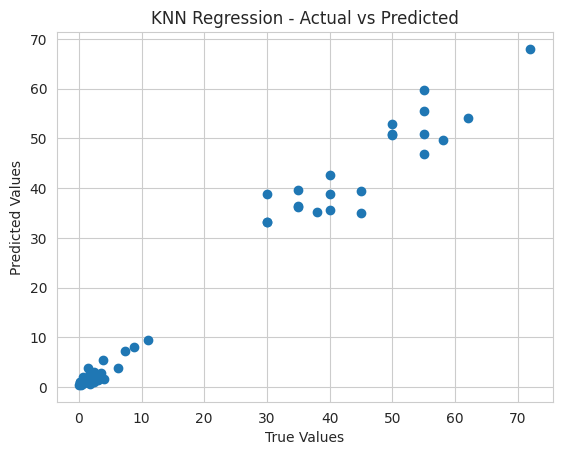

In [2862]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression - Actual vs Predicted')
plt.show()

###RMR колоната да е таргет само

In [2863]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2864]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [2865]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [2866]:
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 25.170909090909092
R2 Score: 0.7986892939174117
Mean Absolute Error: 4.145454545454546


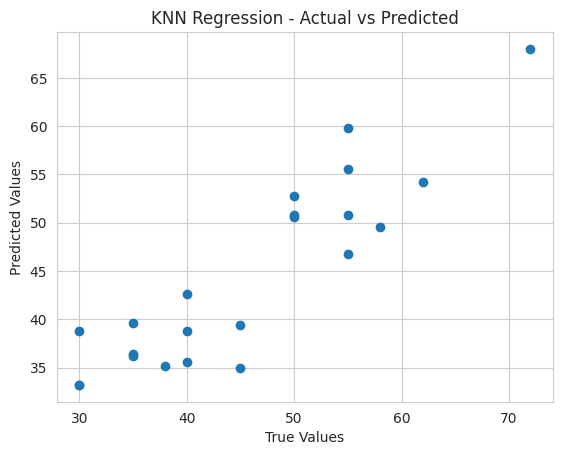

In [2867]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression - Actual vs Predicted')
plt.show()

###Таргет колона е атрибутот Модул на деформации D

In [2868]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2869]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [2870]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [2871]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.085606590909091
R-squared (R2) Score: 0.8230305328344228
Mean Absolute Error: 0.7885909090909092


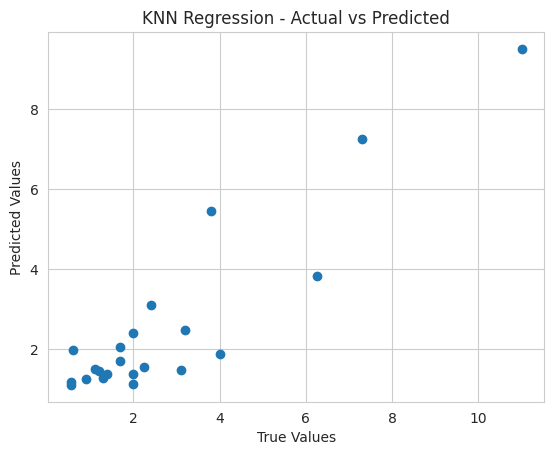

In [2872]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression - Actual vs Predicted')
plt.show()

###Атрибутот Индекс на квалитет Q e таргет колона

In [2873]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2874]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

In [2875]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [2876]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 0.780817107272727
R-squared (R2) Score: 0.7706307358945237
Mean Absolute Error: 0.6696272727272728


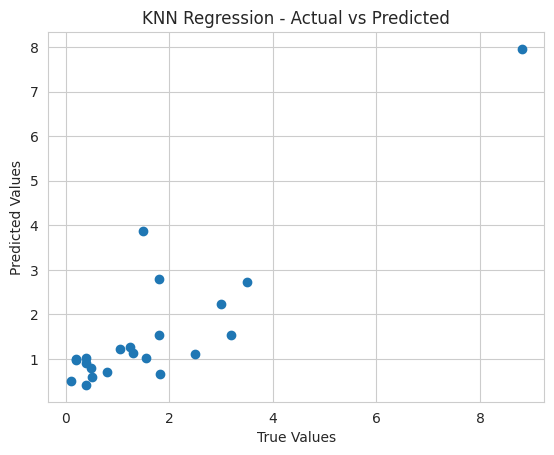

In [2877]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression - Actual vs Predicted')
plt.show()

Според добиените резултато кога правиме KNN Regression најдобар резултат имаме кога таргет колона е само атрибутот Индекс на квалитет Q. Тогаш имаме најмал MSE и mae, и солидно голем R-squared, иако доколку го гледаме овој параметар тогаш Модул на деформации D има подобра вредност.

##Linear Regression

Линеарната регресија е техника на статистичко моделирање што се користи за разбирање на врската помеѓу зависна променлива и една или повеќе независни променливи. Претпоставува линеарна врска помеѓу променливите и има за цел да ја најде најдобро одговара линија која ја минимизира разликата помеѓу вистинските вредности и предвидените вредности. Врската помеѓу променливите е може да ја добиеме со равенката на права линија:

Y = b0 + b1X1 + b2X2 + ... + bn*Xn

###Таргет колона е RMR

In [2878]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2879]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [2880]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 17.896161330987358
R-squared (R2) Score: 0.856870927438606
Mean Absolute Error: 3.4707395572537845


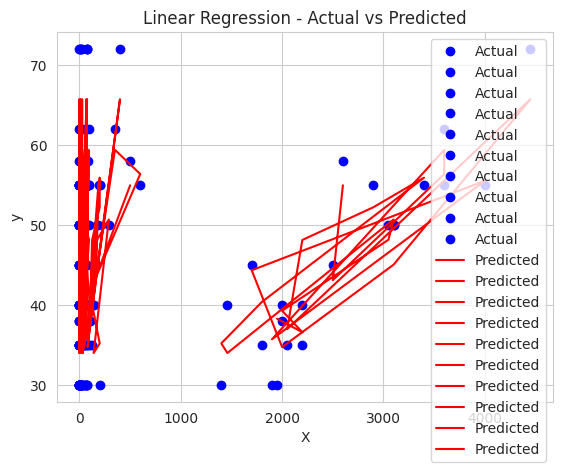

In [2881]:
plt.plot(X_test, y_test, 'o', color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

###Таргет колона - Модул на деформации D

In [2882]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2883]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [2884]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.0737175583677294
R-squared (R2) Score: 0.8249686159039049
Mean Absolute Error: 0.8265596627702293


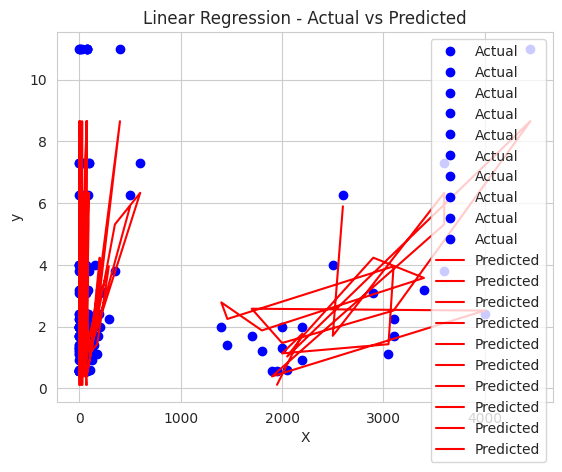

In [2885]:
plt.plot(X_test, y_test, 'o', color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

###Таргет колона - Индекс на квалитет Q

In [2886]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2887]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [2888]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.2962842703905793
R-squared (R2) Score: 0.6192094583973561
Mean Absolute Error: 0.7916517369386042


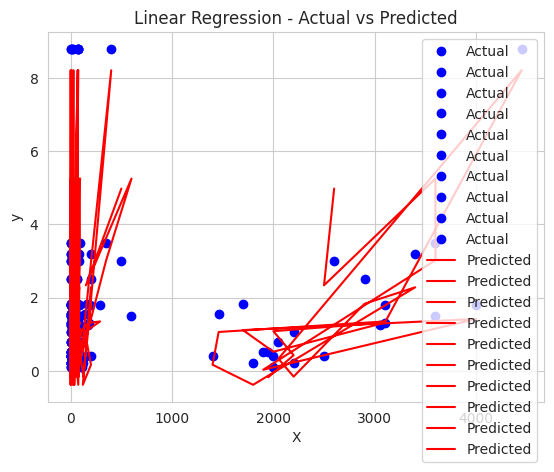

In [2889]:
plt.plot(X_test, y_test, 'o', color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

Најдобри резултати дава кога како таргет колона е атрибутот Модул на деформации D, бидејќи дава најмало MSE и има висок R2.

##Lasso Regression

Ласо Регресија е техника на линеарна регресија која врши и селекција на карактеристики и регулација. Тоа е особено корисно кога се работи со високодимензионални бази на податоци или кога има потреба да се идентификуваат најважните карактеристики. функцијата на целта на обичните најмали квадрати (OLS) се менува со додавање на казнен член кој е збир на апсолутните вредности на коефициентите на регресија помножени со параметар за регулација (алфа). Овој казнен термин поттикнува коефициентите на помалку важните карактеристики да се смалат на нула, со што ефективно се врши селекција на карактеристики со елиминирање на ирелевантните карактеристики од моделот.

###Таргет колона е RMR

In [2890]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2891]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [2892]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 15.897788058164506
R-squared (R2) Score: 0.872853422672115
Mean Absolute Error: 3.2947007133634516


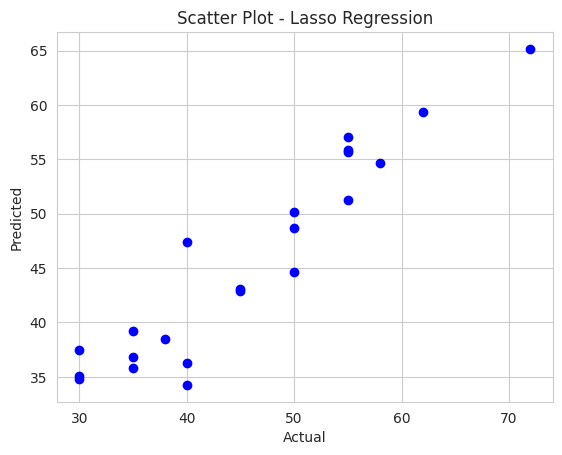

In [2893]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Lasso Regression')
plt.show()

###Таргет колиона е Модул на деформации D

In [2894]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2895]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [2896]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.0506601296882787
R-squared (R2) Score: 0.828727307958449
Mean Absolute Error: 0.8061782759193374


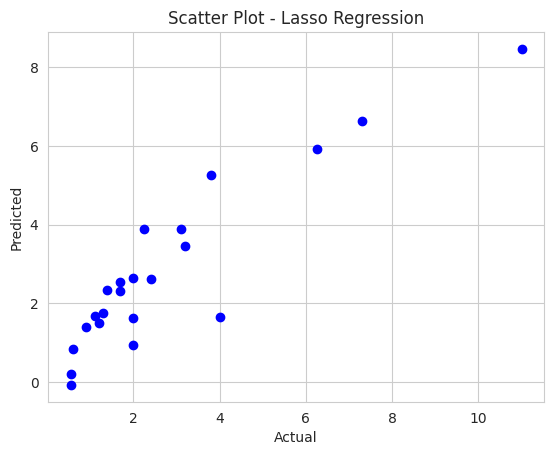

In [2897]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Lasso Regression')
plt.show()

###Таргет колона е Индекс и квалитет Q

In [2898]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2899]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [2900]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.3393793717319205
R-squared (R2) Score: 0.6065500384267306
Mean Absolute Error: 0.7445499153113174


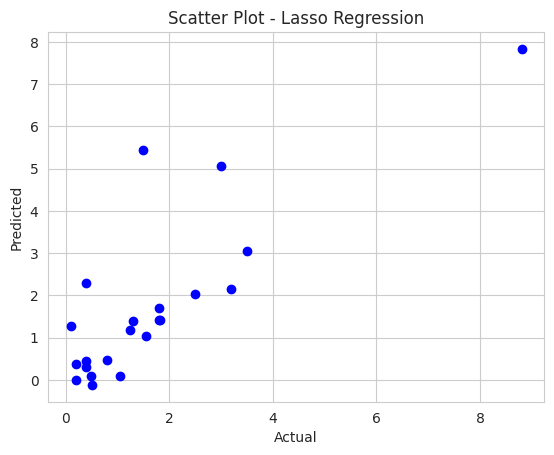

In [2901]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Lasso Regression')
plt.show()

Како и кај Linear Regression и тука додека ние таргет колоната Модул на деформации D, ни дава најдоби резултати, мал MSE и поголем R2.

##Ridge Regression

Ridge Regression е техника на линеарна регресија која помага да се спречи преоптоварување со додавање на казнениот термин на функцијата на обичните најмали квадрати. Слично е на регресијата на ласo, но користи различен тип на казна.Тука казнениот член е збирот на квадратните вредности на регресивните коефициенти помножени со параметар за регулација (алфа). Овој казнен термин ги поттикнува коефициентите да бидат мали, ефективно намалувајќи ги на нула. Сепак, за разлика од ласо регресијата, не ги поставува коефициентите точно на нула, туку ги намалува на мали вредности.Регресијата на гребенот е популарна техника за регулација која може да биде ефикасна во ситуации каде што има потреба да се намали преоптоварувањето и да се справи со мултиколинеарноста во моделите на линеарна регресија.

###Таргет колона е RMR

In [2902]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2903]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [2904]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 15.96198387549457
R-squared (R2) Score: 0.8723400004008895
Mean Absolute Error: 3.298825324737199


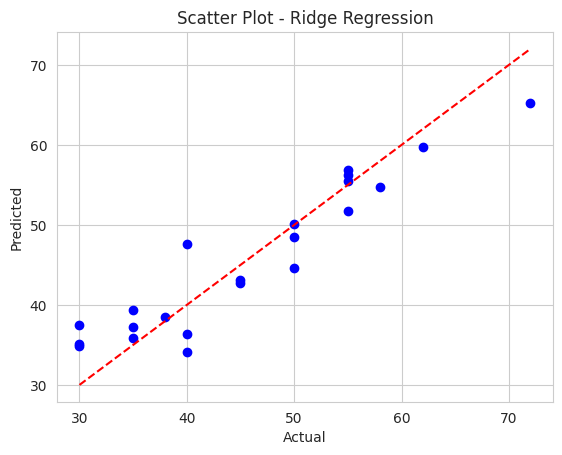

In [2905]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Ridge Regression')
plt.show()

###Таргет колона е Модул на деформации D

In [2906]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2907]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [2908]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.1077463692982208
R-squared (R2) Score: 0.8194214309576489
Mean Absolute Error: 0.8385129429736545


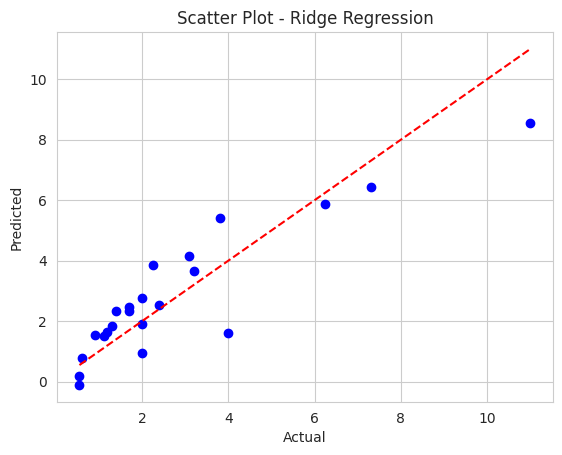

In [2909]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Ridge Regression')
plt.show()

###Таргет колона е Индекс на квалитет Q

In [2910]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2911]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [2912]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 1.2727975789413364
R-squared (R2) Score: 0.6261088015134433
Mean Absolute Error: 0.7481383311836102


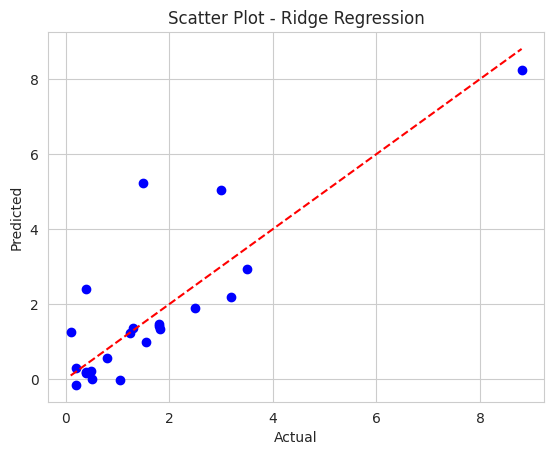

In [2913]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot - Ridge Regression')
plt.show()

Тука доколку гледаме кој е најдобран фитуван, односно има најголемо R2, тогаш кога таргет е атрибутот RMR. Доколку гледаме MSE, тогаш тоа ќе биде кога Модул на деформации D e таргет, бидејчи има најмала вредност.

##Random Forest Regresion

###Таргет колона RMR

In [2914]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2915]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-2915-d7833c517b56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [2916]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 7.934627272727272
R-squared (R2) Score: 0.9365408133251814
Mean Absolute Error: 2.001818181818182


###Таргет колона е Модул на деформации D

In [2917]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2918]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-2918-d7833c517b56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [2919]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 0.810771578181818
R-squared (R2) Score: 0.867832587435124
Mean Absolute Error: 0.5408227272727273


###Таргет колона е Индекс на квалитет Q

In [2920]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2921]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-2921-d7833c517b56>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [2922]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 0.2430393198636369
R-squared (R2) Score: 0.9286058803955652
Mean Absolute Error: 0.3628336363636368


Според сите три параметри mse, r-score и mae, најдобри резултати дава Индекс на квалите Q е таргет колона.

##Support Vector Regression

SVR е алгоритам за машинско учење што се користи  за регресија. Тоа е продолжување на SVM за регресивна анализа. SVR има за цел да најде хиперрамнина во високодимензионален простор на карактеристики што ја приближува врската помеѓу влезните променливи и целната променлива. Во SVR, целта е да се најде функција која има максимална маргина на толеранција околу предвидените вредности. Клучната идеја е да се минимизира грешката додека се дозволува одредено отстапување од вистинските вредности. SVR користи збир на вектори за поддршка, кои се примероци за обука кои лежат најблиску до предвидените вредности, за да ја дефинираат хиперрамнината.

###Таргет колона е RMR

In [2923]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2924]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2925]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 57.118444208359165
R-squared (R2) Score: 0.5431808087505027
Mean Absolute Error: 5.97898787685991


###Таргет колона е Модул на деформации D

In [2926]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2927]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2928]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 3.5403509564301134
R-squared (R2) Score: 0.422871943128204
Mean Absolute Error: 1.19875515174377


###Таргет колона е Индекс на квалитет Q

In [2929]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2930]:
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
y_pred = svr_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2931]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 2.082028855360315
R-squared (R2) Score: 0.3883927209684448
Mean Absolute Error: 0.875977159874289


Доколку гледаме според mse и mae, најдобри резултати ни дава кога таргет колона ни е Индекс на квалитет Q, бидејќи имаат најмали вредности, но доколку гледаме според r2-score, тогаш кога RMR е таргет колона ни дава најдобри резултати.

##Polynomial Regression

Полиномната регресија е техника на регресија која ја моделира врската помеѓу независната променлива и зависната променлива  како полином од n-ти степен. Во полиномната регресија, односот помеѓу променливите се приближува со приспособување на полиномна функција на податочните точки.

Равенка за полиномна регресија е:

y = b0 + b1x + b2x^2 + ... + bn*x^n


Полиномната регресија овозможува пофлексибилно приспособување на кривата на податоците во споредба со линеарната регресија. Може да долови нелинеарни врски помеѓу променливите со воведување полиномни членови со повисоки степени. На пример, ако врската помеѓу x и y е крива, полиномот од повисок степен може подобро да одговара на податоците.

###Таргет колона е RMR

In [2932]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2933]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [2934]:
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred = poly_regression.predict(X_test_poly)

In [2935]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 603.6530459317987
R-squared (R2) Score: -3.8278677765089233
Mean Absolute Error: 14.14896706999703


###Таргет колона е Модул на деформации D

In [2936]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2937]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [2938]:
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred = poly_regression.predict(X_test_poly)

In [2939]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 6.353147263794369
R-squared (R2) Score: -0.0356542558908286
Mean Absolute Error: 1.8298057519712232


###Таргет колона е Индекс на квалитет Q

In [2940]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2941]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [2942]:
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_pred = poly_regression.predict(X_test_poly)

In [2943]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 6.801829971377516
R-squared (R2) Score: -0.9980744793806176
Mean Absolute Error: 1.8177368988435376


Најдобри резултати дава кога таргет колона е Модул на деформации D, бидејќи има односно најмал резултат за mse и mae. Но според мене доколку гледаме r2 score ќе видиме дека вредностите за сите три таргет колони  оди во негатива што не е препорачливо и добро.

## Neural Network Regression

Регресијата на невронската мрежа е регресивна техника која користи вештачки невронски мрежи за моделирање на врската помеѓу влезните променливи и континуираната целна променлива. Тоа е моќен и флексибилен пристап за предвидување нумерички вредности врз основа на сложени обрасци и односи во податоците.

###Таргет колона е RMR

In [2944]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2945]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
nn_regressor.fit(X_train, y_train)
y_pred = nn_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2946]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 121.4164026027378
R-squared (R2) Score: 0.02894163855238885
Mean Absolute Error: 9.425926566754956


###Таргет колона е Модул на деформации

In [2947]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2948]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
nn_regressor.fit(X_train, y_train)
y_pred = nn_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2949]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 376.9989326345704
R-squared (R2) Score: -60.4562409523158
Mean Absolute Error: 17.724170515276263


###Таргет колона е Индекс на квалитет Q

In [2950]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2951]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
nn_regressor.fit(X_train, y_train)
y_pred = nn_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2952]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error (MSE): 378.3298531117789
R-squared (R2) Score: -110.1364482016552
Mean Absolute Error: 17.853474153084285


Со овој модел на регресија имаме многу лоши резултати mse, mae имаат преголеми вредности, a r2-score  имаме негативна вредност кај сите и поради тоа лошо се фитуваат податоци. Но ако треба да бираме тогаш кога таргет колона е RMR ни дава најдобри резултати.

##**RMR**

In [2953]:
data7 = {'Model name':['Decision Tree','KNN Regression','Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression', 'SVR', 'Polynomial Regression', 'Neural Network Regression'],
        'Mean Squared Error':[22.23,25.17,23.35,15.90,15.96,7.93, 57.12, 603.53, 121.42],
        '"R-squared (R2) Score':[0.82,0.80,0.87,0.87,0.87,0.94, 0.54, -3.83, 0.03],
        'Mean Absolute Error':[2.95,4.15,3.76,3.29,3.30,2.00, 5.98, 14.15, 9.43]}
dataframe7 = pd.DataFrame(data7)
dataframe7

Model name  Mean Squared Error  "R-squared (R2) Score  \
0              Decision Tree               22.23                   0.82   
1             KNN Regression               25.17                   0.80   
2          Linear Regression               23.35                   0.87   
3           Lasso Regression               15.90                   0.87   
4           Ridge Regression               15.96                   0.87   
5   Random Forest Regression                7.93                   0.94   
6                        SVR               57.12                   0.54   
7      Polynomial Regression              603.53                  -3.83   
8  Neural Network Regression              121.42                   0.03   

   Mean Absolute Error  
0                 2.95  
1                 4.15  
2                 3.76  
3                 3.29  
4                 3.30  
5                 2.00  
6                 5.98  
7                14.15  
8                 9.43

Со моделот Random Forest имаме најдобри резултати иако и тие не се баш добри, додека за  модел кој ни дава најлоши резултати е Neural Network Regression.

##**Индекс на Квалитет Q**

In [2954]:
data8 = {'Model name':['Decision Tree','KNN Regression','Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression', 'SVR', 'Polynomial Regression', 'Neural Network Regression'],
        'Mean Squared Error':[0.22, 0.78, 1.30, 1.34 ,1.27, 0.24, 2.08, 6.80, 378.33],
        '"R-squared (R2) Score':[0.93, 0.77, 0.62, 0.61, 0.63, 0.93, 0.39, -1.00, -110.14],
        'Mean Absolute Error':[0.29, 0.67, 0.79, 0.74, 0.75, 0.36, 0.88, 1.82, 17.85]}
dataframe8 = pd.DataFrame(data8)
dataframe8

Model name  Mean Squared Error  "R-squared (R2) Score  \
0              Decision Tree                0.22                   0.93   
1             KNN Regression                0.78                   0.77   
2          Linear Regression                1.30                   0.62   
3           Lasso Regression                1.34                   0.61   
4           Ridge Regression                1.27                   0.63   
5   Random Forest Regression                0.24                   0.93   
6                        SVR                2.08                   0.39   
7      Polynomial Regression                6.80                  -1.00   
8  Neural Network Regression              378.33                -110.14   

   Mean Absolute Error  
0                 0.29  
1                 0.67  
2                 0.79  
3                 0.74  
4                 0.75  
5                 0.36  
6                 0.88  
7                 1.82  
8                17.85

Доколку таргет колона ни е Индекс на Квалитет Q ќе забележиме дека најдобри резултати ни дава моделот Decison Tree Regression, а најлоши Neural Network Regression, ако не го рачунаме него тогаш Polynomial Regression.

##**Модул на Деформации D**

In [2955]:
data9 = {'Model name':['Decision Tree','KNN Regression','Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Random Forest Regression', 'SVR', 'Polynomial Regression', 'Neural Network Regression'],
        'Mean Squared Error':[0.67, 1.09, 1.07, 1.05 ,1.11, 0.81, 3.54, 6.35, 376.00],
        '"R-squared (R2) Score':[0.89, 0.82, 0.82, 0.83, 0.82, 0.87, 0.42, -0.04, -60.46],
        'Mean Absolute Error':[0.49, 0.79, 0.83, 0.81, 0.84, 0.54, 1.20, 1.83, 17.72]}
dataframe9 = pd.DataFrame(data9)
dataframe9

Model name  Mean Squared Error  "R-squared (R2) Score  \
0              Decision Tree                0.67                   0.89   
1             KNN Regression                1.09                   0.82   
2          Linear Regression                1.07                   0.82   
3           Lasso Regression                1.05                   0.83   
4           Ridge Regression                1.11                   0.82   
5   Random Forest Regression                0.81                   0.87   
6                        SVR                3.54                   0.42   
7      Polynomial Regression                6.35                  -0.04   
8  Neural Network Regression              376.00                 -60.46   

   Mean Absolute Error  
0                 0.49  
1                 0.79  
2                 0.83  
3                 0.81  
4                 0.84  
5                 0.54  
6                 1.20  
7                 1.83  
8                17.72

Тука кога оваа колона ќе ни е таргет добива дека со Decison Tree Regression имаме најдобри резултати, а со Neural Network Regression и Polynomial Regression најлоши.

Заклучок од регресиските методи е тоа дека доколку таргет колона ни е RMR имаме доста лоши резултати, за разлика од другите два атрибута.

Модул на деформации D, многу подобри резултати дава кога се работи со регресија за разлика од класификација.

Како најдобри модели тука може да ги издвоиме Decision Treee Regression и Random Forest Regression.

Најлоши модели што не би препорачале да се работат со регресија на овој датасет се Neural Network Regression.

#CrossValidation

Поради мал обем на податоци, само 109 торки се препорачува да се користи CrossValidation за поточни резултати.

## Leave-One-Out Cross-Validation

Во LOOCV, секоја податочна точка се користи како множество за валидација еднаш, додека остатокот од податоците се користат за обука. Овој процес се повторува за секоја податочна точка, а перформансите се просечни низ сите повторувања за да се добие конечната проценка на перформансите.

###Таргет колона RMR

In [2956]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D', 'Индекс на квалитет Q']]
y = df[['RMR']]

In [2957]:
regressor = LinearRegression()

In [2958]:
loo = LeaveOneOut()
scores = cross_val_score(regressor, X, y, cv=loo, scoring='neg_mean_squared_error')

In [2959]:
positive_scores = -scores

In [2960]:
for fold, score in enumerate(positive_scores):
    print(f"Fold {fold + 1}: Mean Squared Error = {score}")

Fold 1: Mean Squared Error = 36.73075280696734
Fold 2: Mean Squared Error = 75.37971214874842
Fold 3: Mean Squared Error = 8.822880278913306
Fold 4: Mean Squared Error = 16.122437021599765
Fold 5: Mean Squared Error = 0.12113442601068075
Fold 6: Mean Squared Error = 3.470766961248624
Fold 7: Mean Squared Error = 77.49772145481387
Fold 8: Mean Squared Error = 33.12171040100963
Fold 9: Mean Squared Error = 1.6485358018889615
Fold 10: Mean Squared Error = 29.718915092970295
Fold 11: Mean Squared Error = 3.2855833470707085
Fold 12: Mean Squared Error = 10.975322195435679
Fold 13: Mean Squared Error = 4.372201776631151
Fold 14: Mean Squared Error = 23.831848044490382
Fold 15: Mean Squared Error = 65.56159634299766
Fold 16: Mean Squared Error = 6.375107568849167
Fold 17: Mean Squared Error = 28.527403625227887
Fold 18: Mean Squared Error = 11.797126010598223
Fold 19: Mean Squared Error = 23.458521681208644
Fold 20: Mean Squared Error = 0.44003604129564167
Fold 21: Mean Squared Error = 0.4962

In [2961]:
mean_score = positive_scores.mean()
print("Mean Mean Squared Error:", mean_score)

Mean Mean Squared Error: 25.55575140275629


###Таргет колона е Индекс на Квалитет Q

In [2962]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Модул на деформации D' ]]
y = df[[ 'Индекс на квалитет Q']]

In [2963]:
regressor = LinearRegression()
loo = LeaveOneOut()
scores = cross_val_score(regressor, X, y, cv=loo, scoring='neg_mean_squared_error')

In [2964]:
positive_scores = -scores
for fold, score in enumerate(positive_scores):
    print(f"Fold {fold + 1}: Mean Squared Error = {score}")

Fold 1: Mean Squared Error = 0.3831704350340285
Fold 2: Mean Squared Error = 41.62378379879624
Fold 3: Mean Squared Error = 0.6419316797688673
Fold 4: Mean Squared Error = 0.0009498034304373025
Fold 5: Mean Squared Error = 1.1792297758687158
Fold 6: Mean Squared Error = 1.3700679869080776
Fold 7: Mean Squared Error = 42.18258680969319
Fold 8: Mean Squared Error = 0.14204280643556028
Fold 9: Mean Squared Error = 0.02146430736644661
Fold 10: Mean Squared Error = 1.5396110446683644
Fold 11: Mean Squared Error = 0.1412098132073845
Fold 12: Mean Squared Error = 0.25574011294154914
Fold 13: Mean Squared Error = 4.409923839121065
Fold 14: Mean Squared Error = 0.04289576299745855
Fold 15: Mean Squared Error = 1.5247346350047262
Fold 16: Mean Squared Error = 0.2667372068360065
Fold 17: Mean Squared Error = 0.12858239739989752
Fold 18: Mean Squared Error = 0.4763450833909277
Fold 19: Mean Squared Error = 0.007931753435606084
Fold 20: Mean Squared Error = 0.050366782713359336
Fold 21: Mean Square

In [2965]:
mean_score = positive_scores.mean()
print("Mean Mean Squared Error:", mean_score)

Mean Mean Squared Error: 1.9288596760202739


###Таргет колона е Модул на Деформации D

In [2966]:
X = df[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'RMR' , 'Индекс на квалитет Q']]
y = df[['Модул на деформации D']]

In [2967]:
regressor = LinearRegression()
loo = LeaveOneOut()
scores = cross_val_score(regressor, X, y, cv=loo, scoring='neg_mean_squared_error')

In [2968]:
positive_scores = -scores
for fold, score in enumerate(positive_scores):
    print(f"Fold {fold + 1}: Mean Squared Error = {score}")

Fold 1: Mean Squared Error = 6.368291081402235
Fold 2: Mean Squared Error = 2.912816062147347
Fold 3: Mean Squared Error = 7.923575078440383
Fold 4: Mean Squared Error = 0.13046440761369316
Fold 5: Mean Squared Error = 0.8312634527858658
Fold 6: Mean Squared Error = 4.2571393216673545
Fold 7: Mean Squared Error = 5.703894729997289
Fold 8: Mean Squared Error = 2.0268288626114357
Fold 9: Mean Squared Error = 0.029435161181672775
Fold 10: Mean Squared Error = 2.5334050322529547
Fold 11: Mean Squared Error = 0.1962637260718933
Fold 12: Mean Squared Error = 1.115838831456069
Fold 13: Mean Squared Error = 5.622863567546066
Fold 14: Mean Squared Error = 1.2337337986707024
Fold 15: Mean Squared Error = 0.05034577101165746
Fold 16: Mean Squared Error = 6.797428124888481e-05
Fold 17: Mean Squared Error = 0.22994130958263392
Fold 18: Mean Squared Error = 0.30707552911771274
Fold 19: Mean Squared Error = 0.0010777751042363008
Fold 20: Mean Squared Error = 0.4154304675209513
Fold 21: Mean Squared E

In [2969]:
mean_score = positive_scores.mean()
print("Mean Mean Squared Error:", mean_score)

Mean Mean Squared Error: 1.607862240781052


In [2970]:
data10 = {'Targets:':['RMR','Индекс на Квалитет Q','Модул на деформации D'],
        'Mean Mean Squared Error':[ 25.55575140275629, 1.9288596760202739, 1.607862240781052]}
dataframe10 = pd.DataFrame(data10)
dataframe10

Targets:  Mean Mean Squared Error
0                    RMR                25.555751
1   Индекс на Квалитет Q                 1.928860
2  Модул на деформации D                 1.607862

Според добиените резултати можеме да видеме декај најдобри резултати ни дава кога таргет колона е Модул на Деформации D, бидејќи за просечна средна квадратна грешка имаме најмала вредност што знаци дека подобро перформанси и дека моделот добро предикнува за вистинските вредности.

##K-fold Cross-Validation

K-fold е широко користена техника за оценување на перформансите на моделите за машинско учење, особено кога се работи со мали податоци. Вклучува поделба на сетот на податоци во k дела со еднаква големина и итеративно користење на секое превиткување како сет за валидација додека го тренирате моделот на преостанатите k-1 делови. Овој процес се повторува k пати, при што секој дел служи како валидација поставен точно еднаш. Метриката на перформансите од секое превиткување потоа се просекува за да се добие севкупна проценка на перформансите на моделот.

###Таргет колона е RMR

In [2971]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Модул на деформации D_classification_encoded', 'Индекс на квалитет Q_classification_encoded']]
y = df2[['RMR_category_encoded']]

In [2972]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

In [2973]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [2974]:
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.796969696969697


###Таргет колона е Индекс на Квалитет Q

In [2975]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]

In [2976]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

In [2977]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [2978]:
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.696969696969697


###Таргет колона е Модул на деформации D

In [2979]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]

In [2980]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []

In [2981]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [2982]:
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7432900432900433


In [2983]:
data11 = {'Targets:':['RMR','Индекс на Квалитет Q','Модул на деформации D'],
        'Mean Accuracy':[ 0.8069264069264068, 0.7155844155844155, 0.7523809523809524]}
dataframe11 = pd.DataFrame(data11)
dataframe11

Targets:  Mean Accuracy
0                    RMR       0.806926
1   Индекс на Квалитет Q       0.715584
2  Модул на деформации D       0.752381

Со овој cross-validation модел може да видеме дека кога таргет колона ни е RMR ни дава најдобри вредности (односно средна вредност на сите accurancy по одредена таргет колона), иако не се најдобри и тие резултати.

#Кластерирање

Кластерирањето се користи за учење без unsupervised, каде што целта е да се идентификуваат природни групи или обрасци во базата на податоци без претходно дефинирани ознаки или целни променливи. Тоа е вообичаена техника за анализа на податоци и машинско учење, и има различни апликации во различни домени. Кластерирање ги групира податоците според нивната сличност, однесување, врз основа на некои региони, да се идентификуваат аномалии или невообичаени податоци, групирање вср основа на некои модели..


###K-Means (Centroid-based)


Кластерирањето K-means е популарен и широко користен алгоритам за кластерирање. Таа има за цел да подели дадена база на податоци во K различни кластери врз основа на сличноста на точките на податоци. Овој алгоритам работи со доделување на центроиди, каде што податоците се доделуваат на соодветен центроид најчесто според Евклидово растојание, овој процес се повторува се додека повеќе центроидите не се менуваат.

In [2984]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df)

In [2985]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


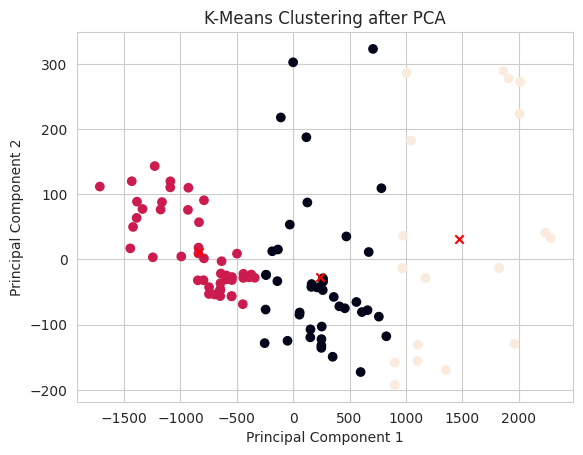

In [2986]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.show()

Според оваа дадено кластерирање може да забележиме дека имаме не многу добри резултати, но и многу лоши, податоците до некаде се поделени во посебни групи со соодветни центроиди, но некои од податоците не се толку блиску околу својот центроид.

###Hierarchical (Agglomerative)

Хиерархиското кластерирање, познато и како агломеративно кластерирање, е алгоритам за кластерирање кој гради хиерархија на кластери. Клучната идеја зад хиерархиското кластерирање е дека слични точки на податоци се групирани заедно на различни нивоа од хиерархијата.

In [2987]:
features = ['RMR', 'Модул на деформации D', 'Индекс на квалитет Q']
data = df[features].values

In [2988]:
num_clusters = 2
ac = AgglomerativeClustering(n_clusters=num_clusters)
labels = ac.fit_predict(data)

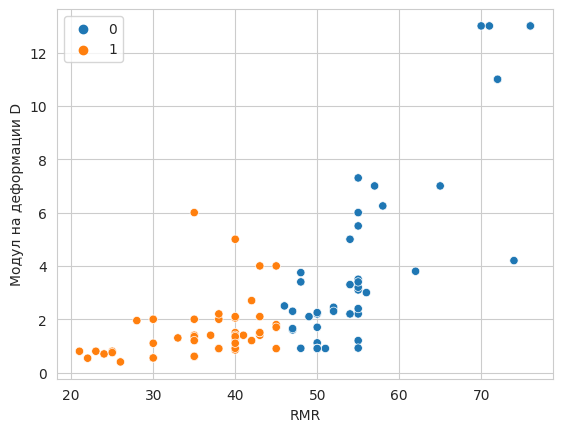

In [2989]:
sns.scatterplot(x=df['RMR'], y=df['Модул на деформации D'], hue=labels)
plt.show()

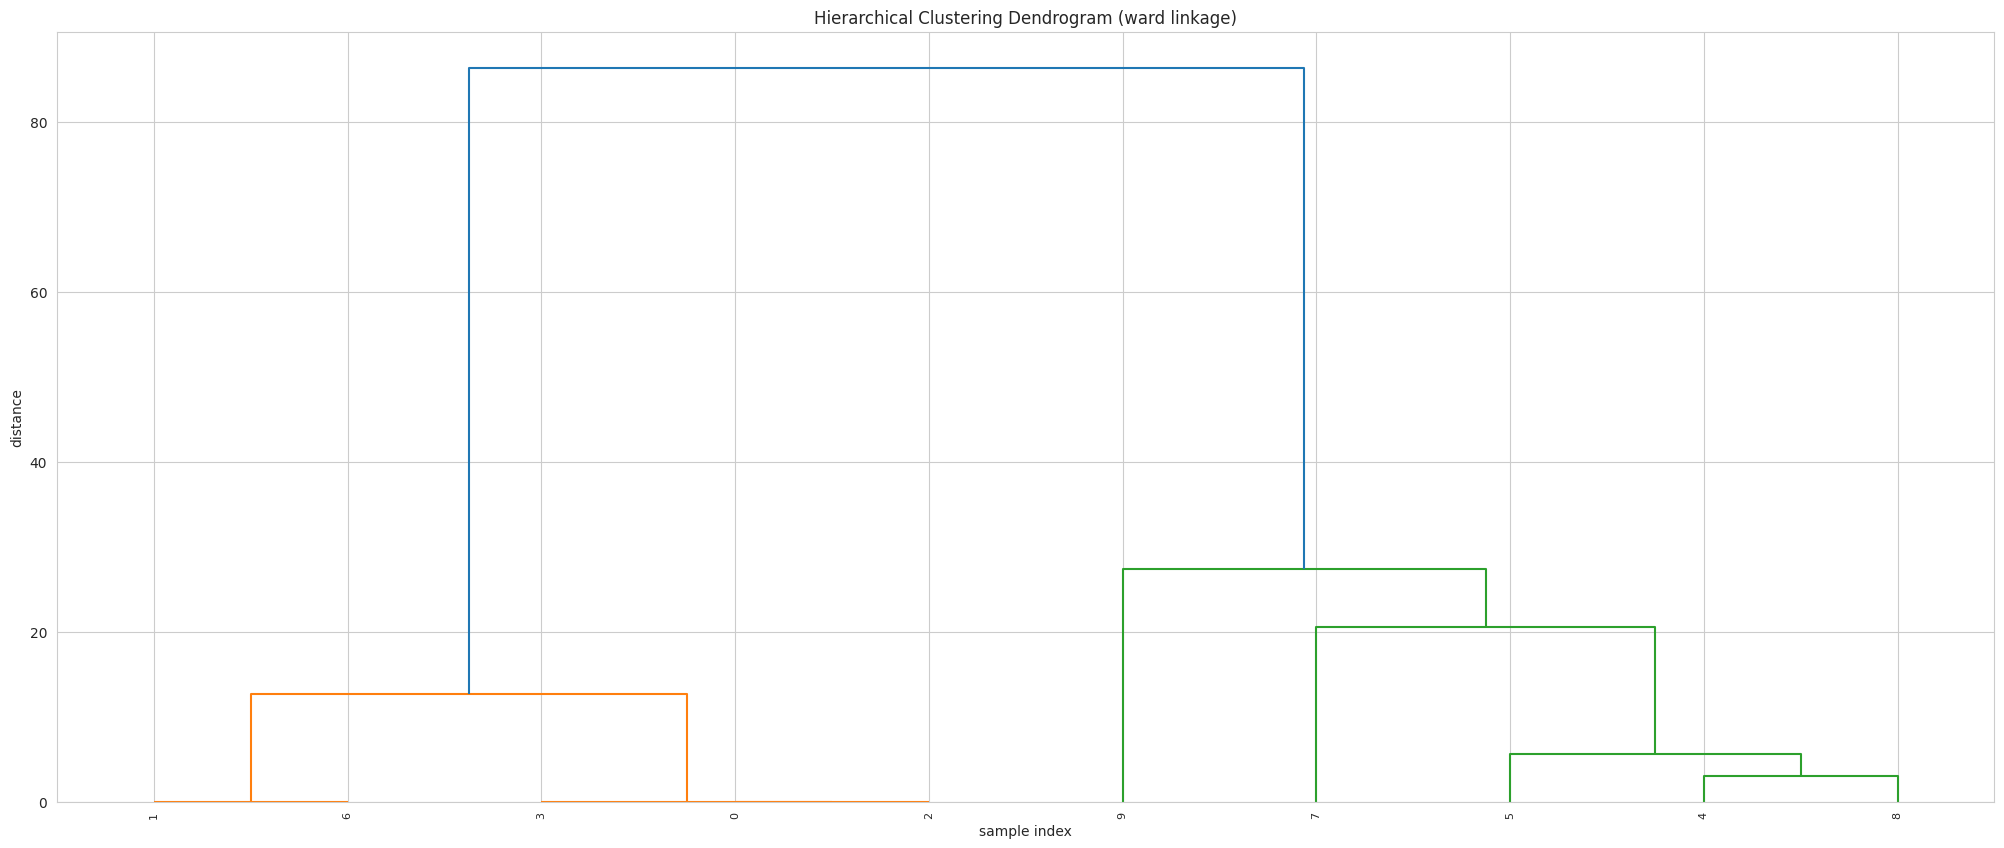

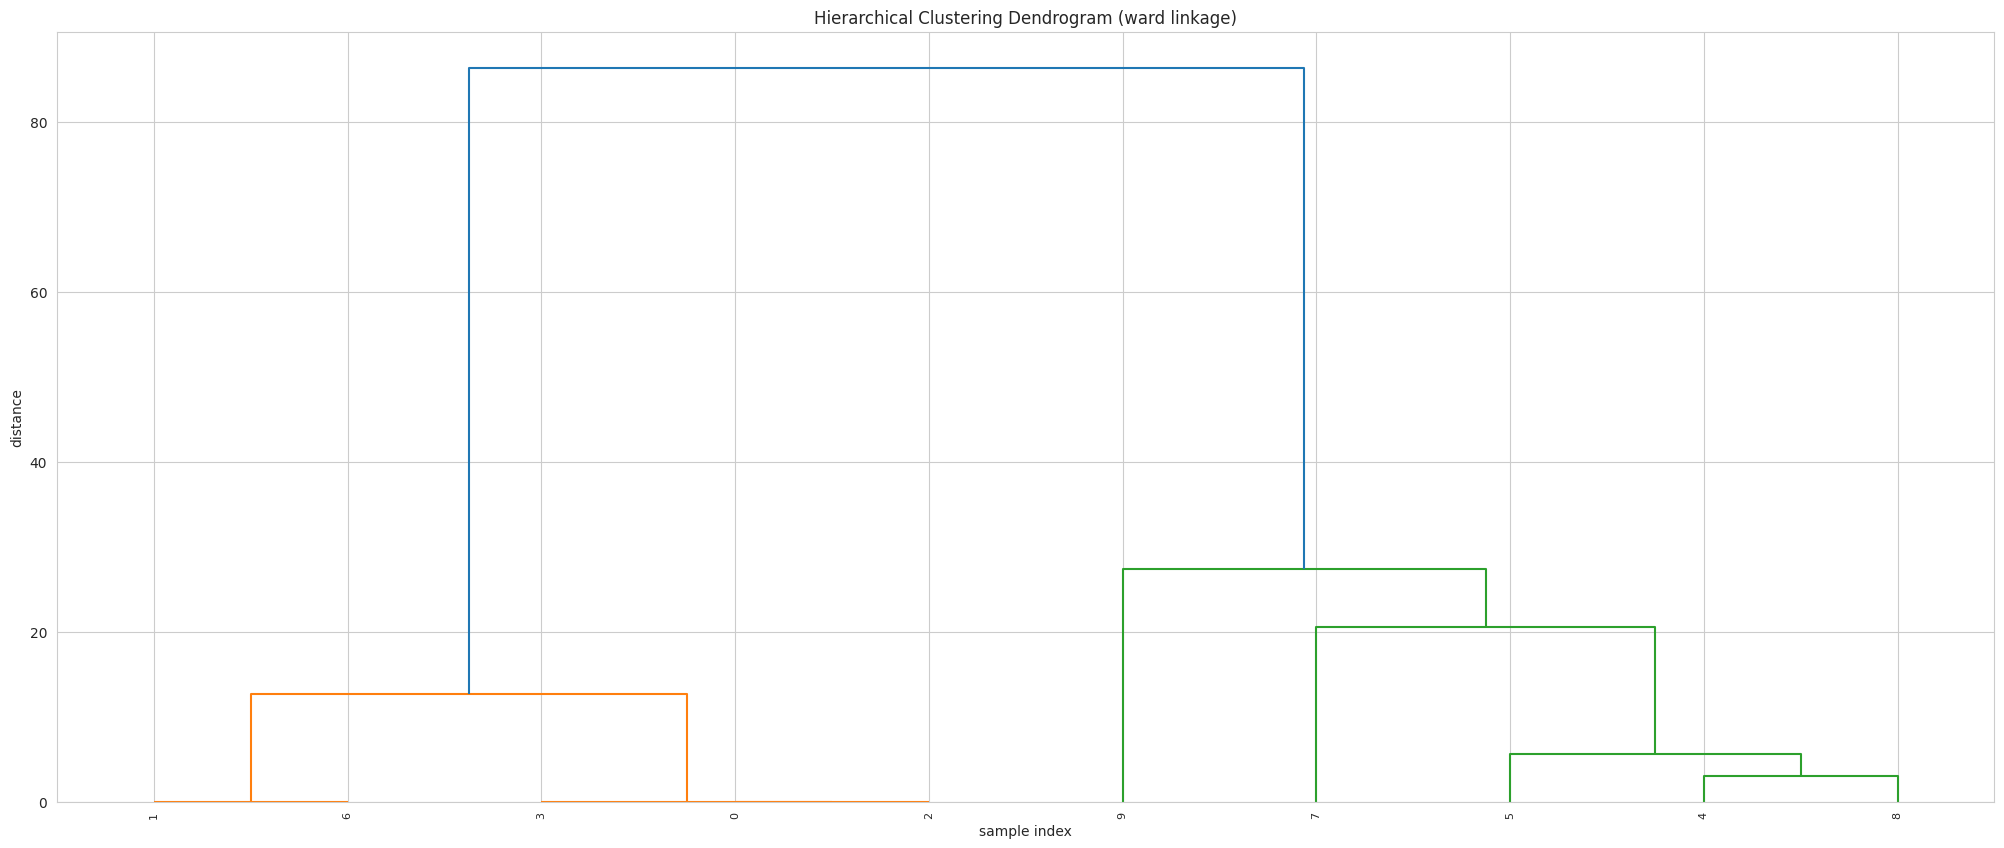

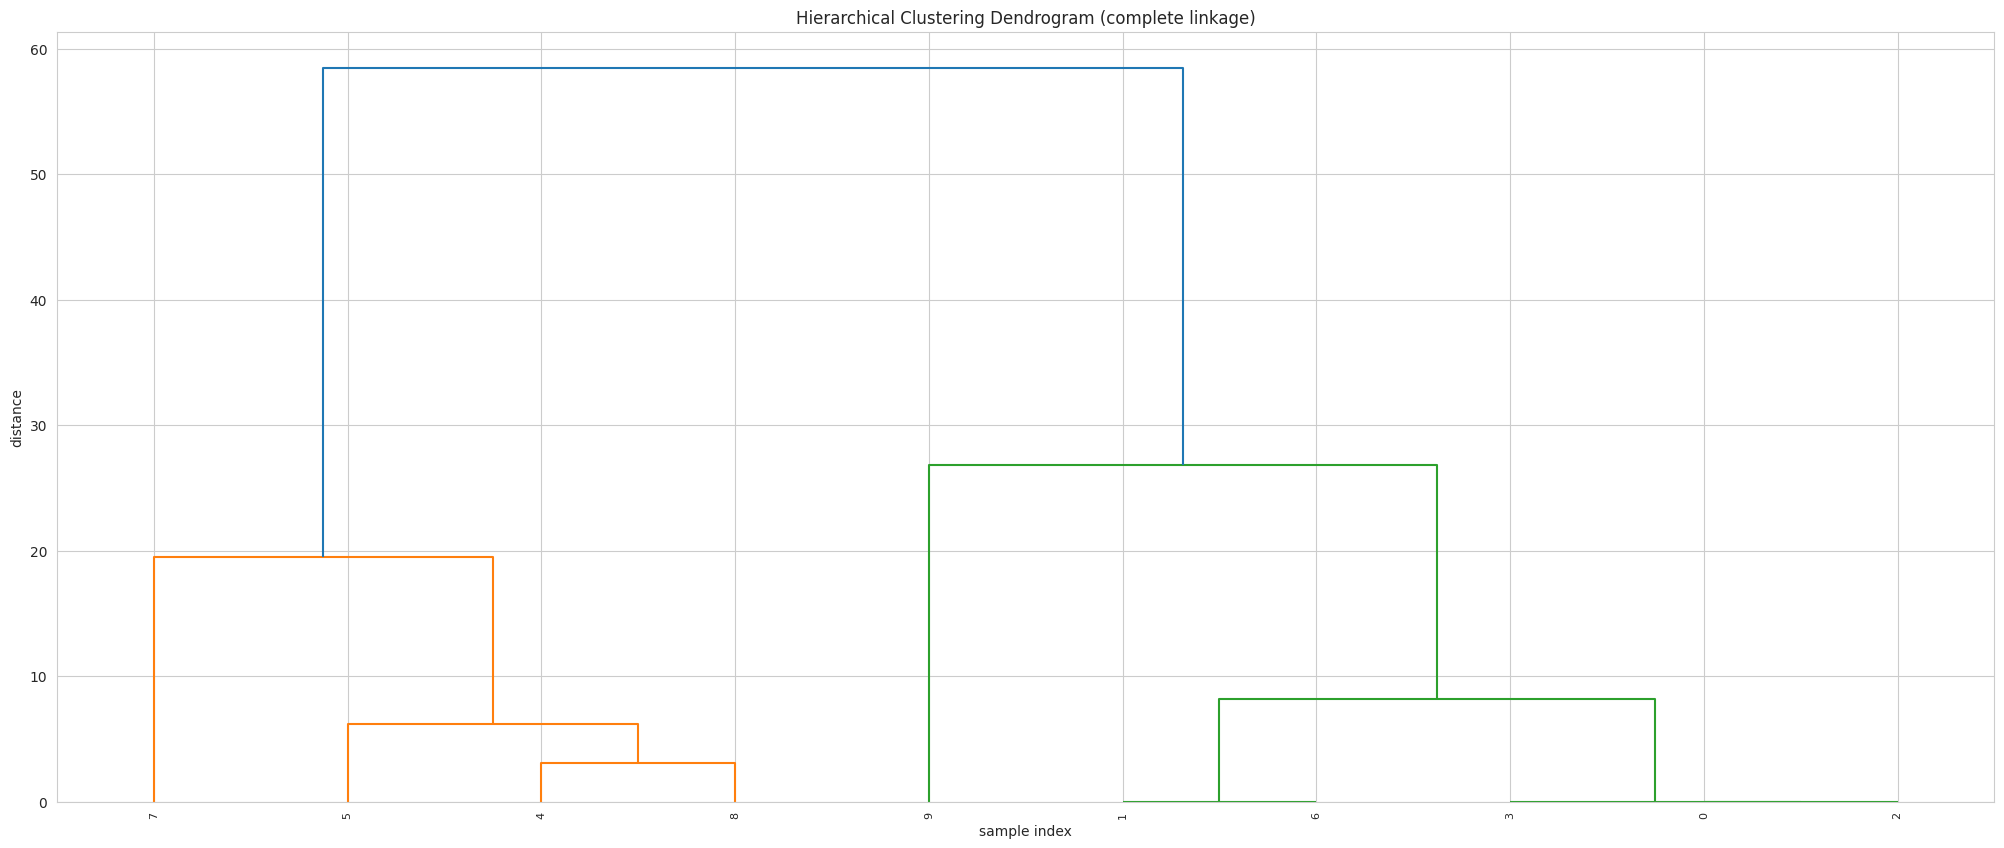

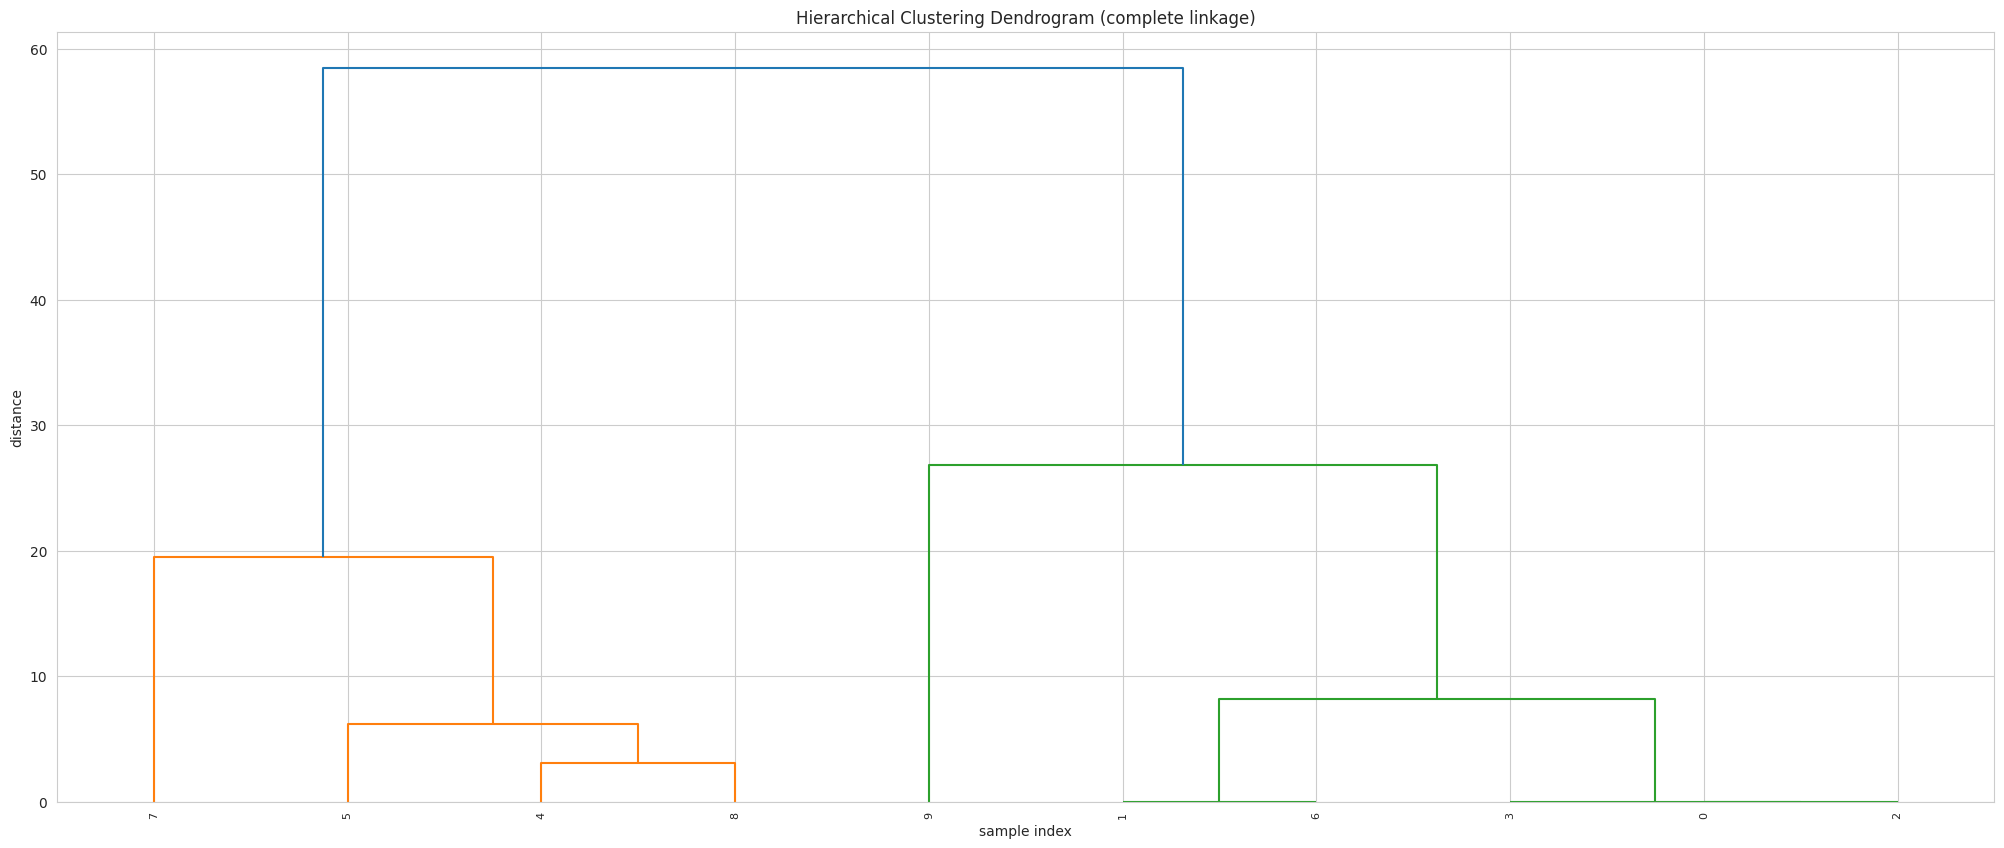

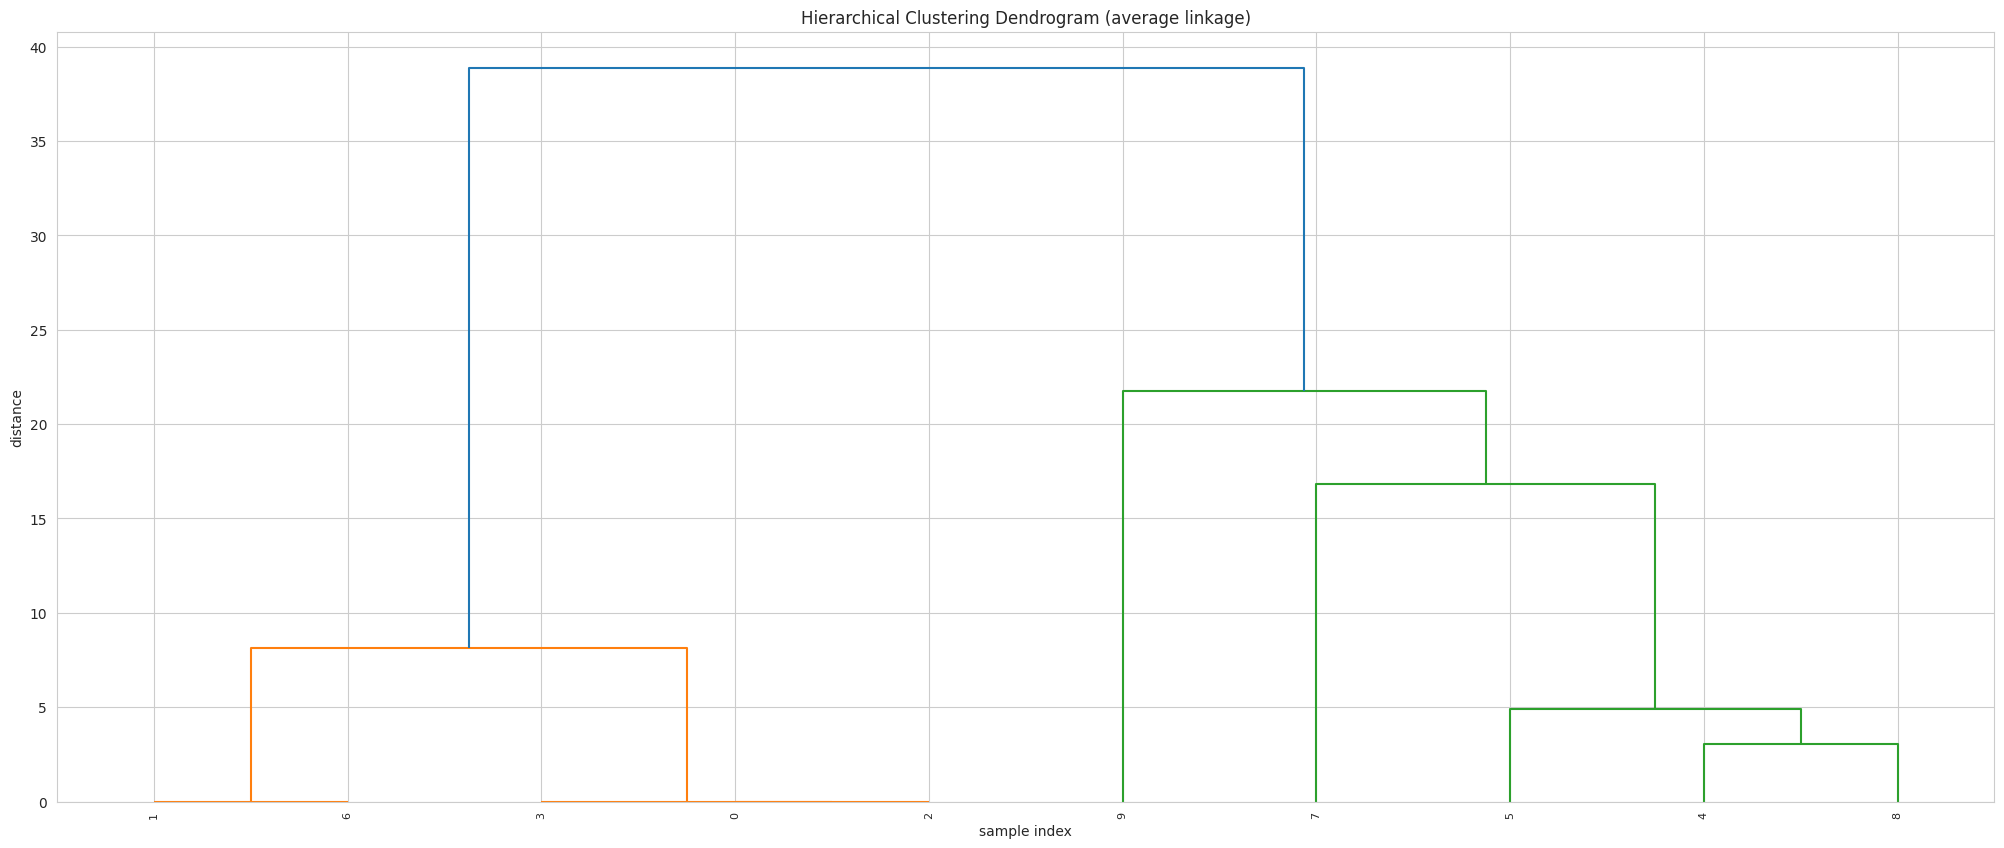

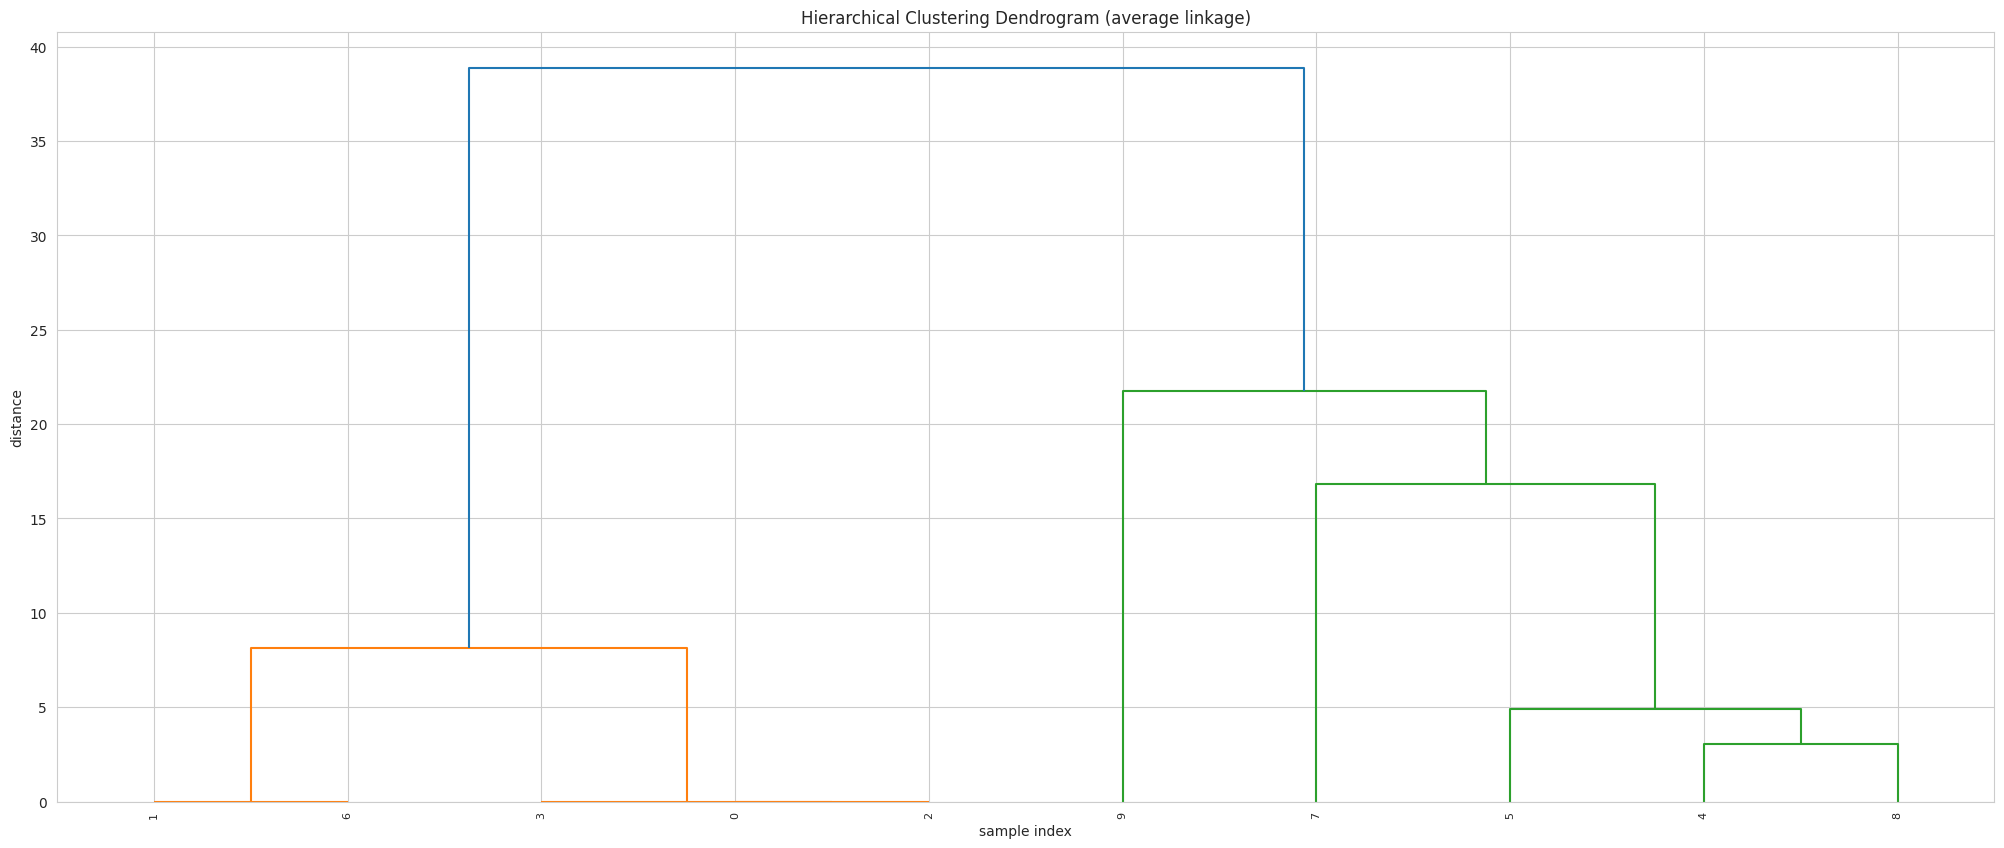

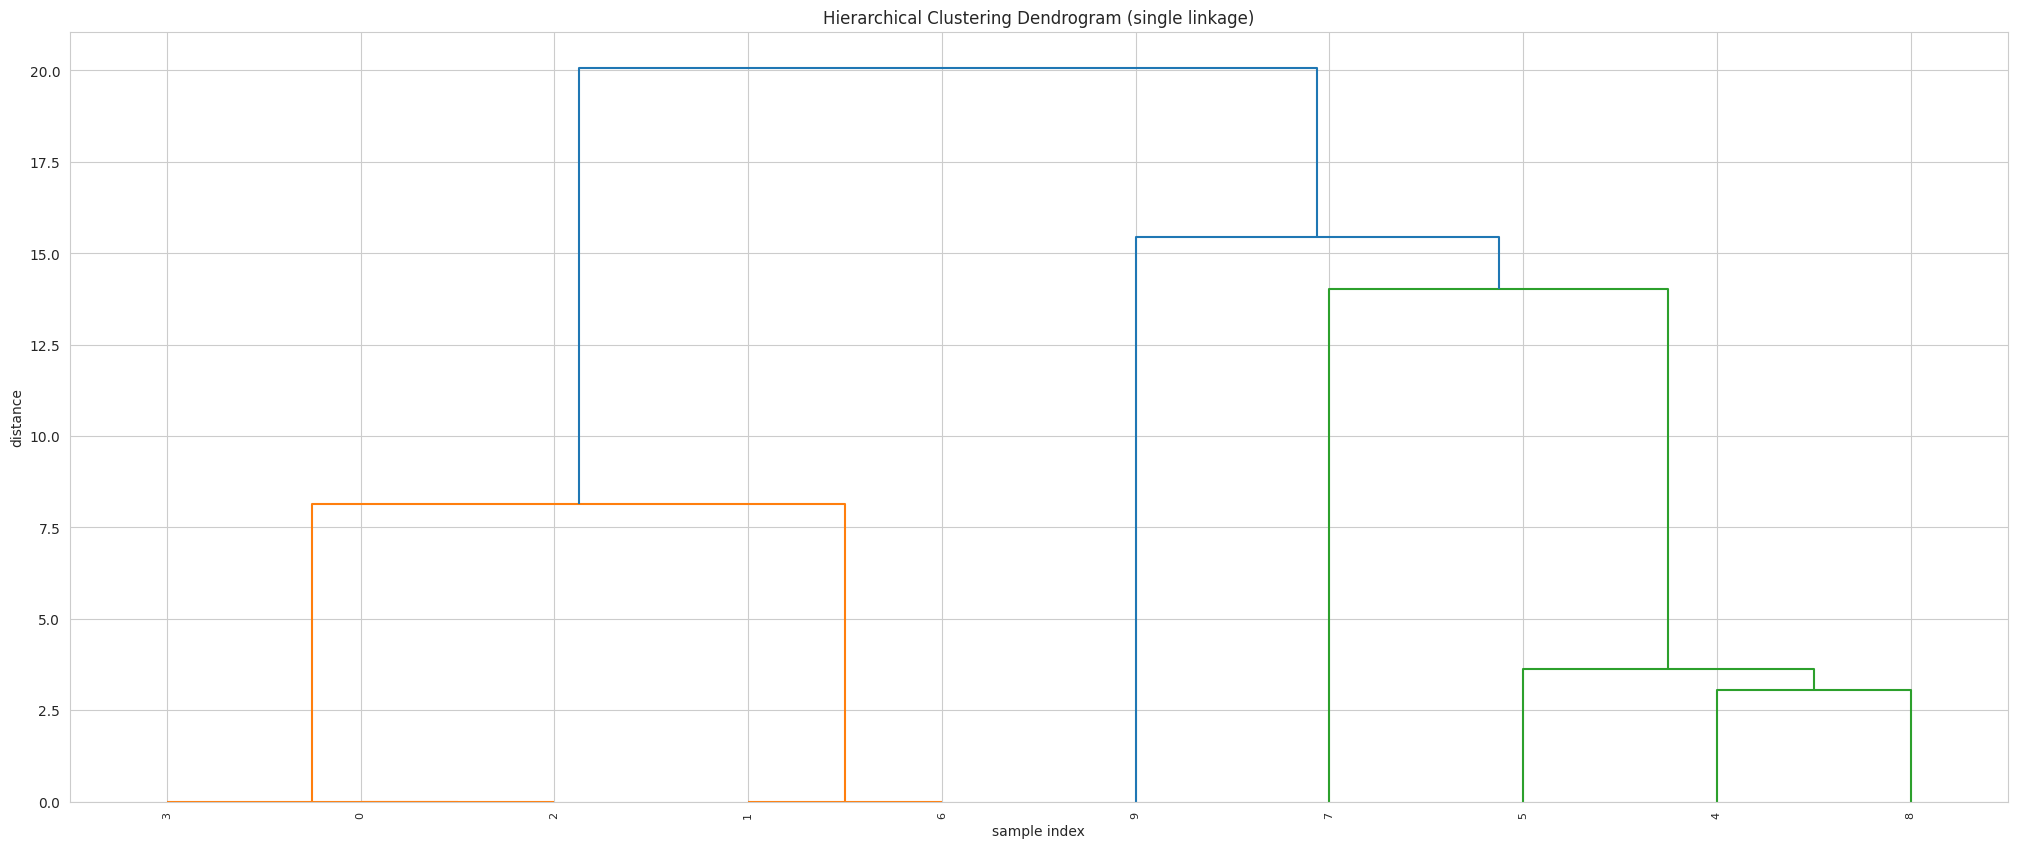

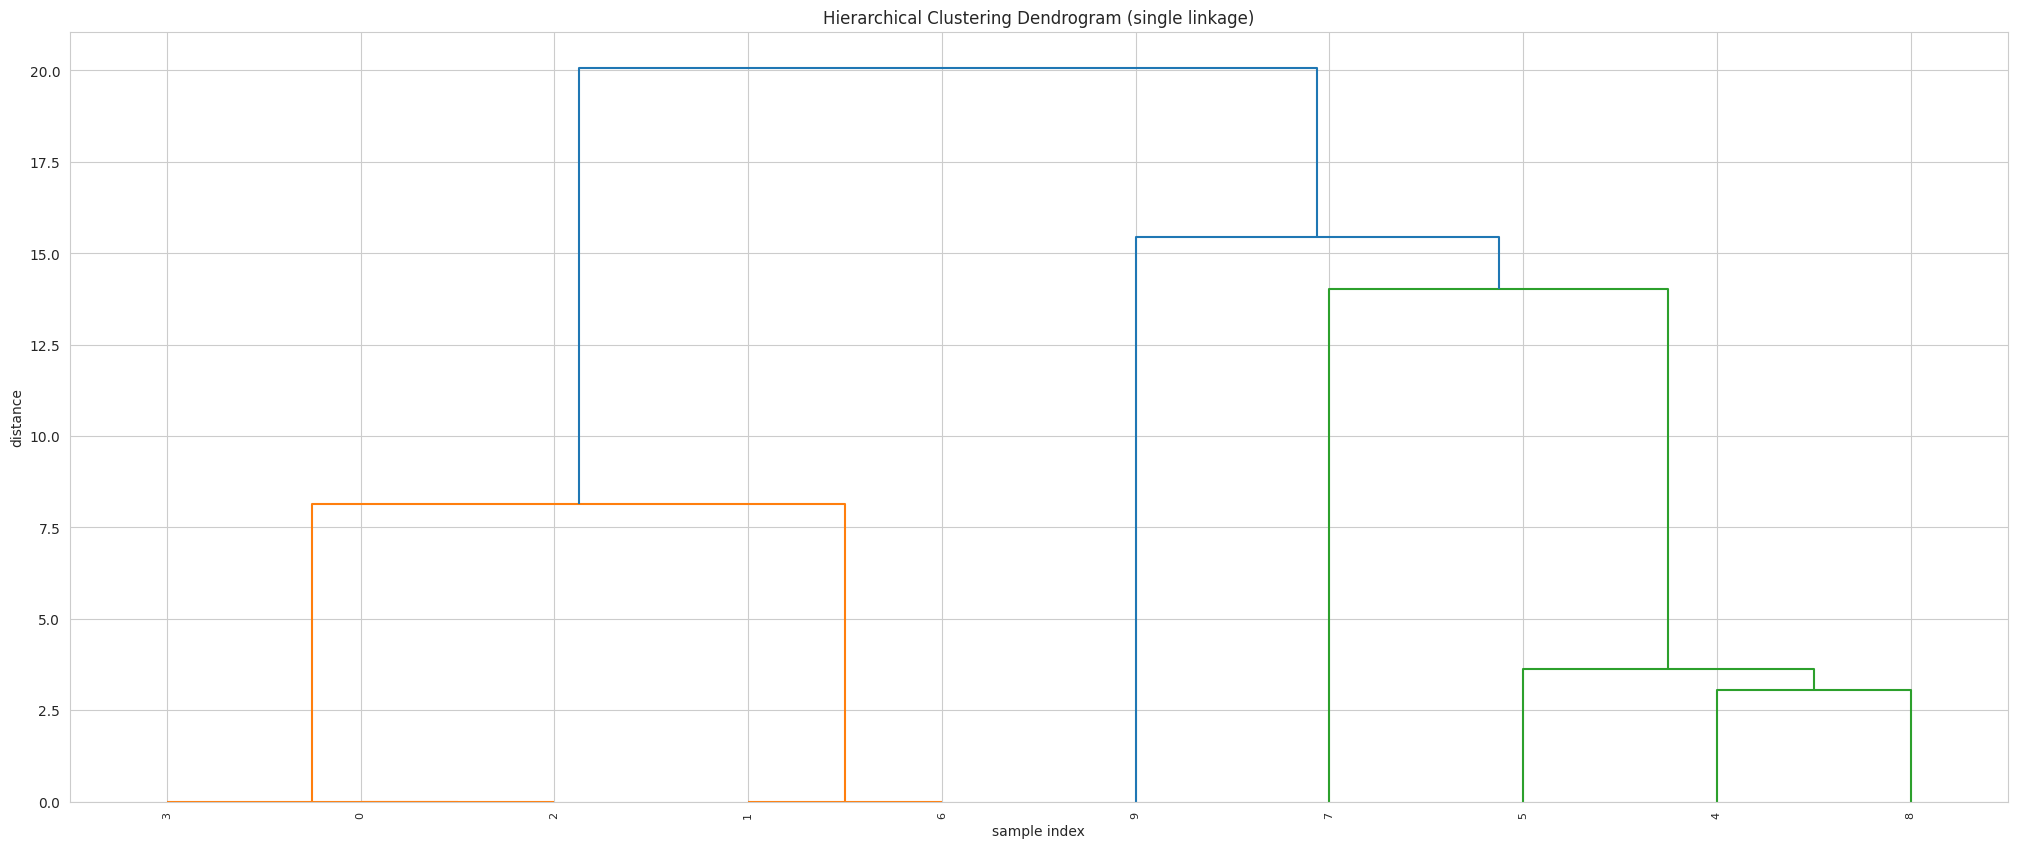

In [2990]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
    Z = linkage(data[:10], link_type)

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.show()

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp')
    plt.show()

In [2991]:
features = ['Модул на деформации D', 'Индекс на квалитет Q']
data = df[features].values

In [2992]:
num_clusters = 2
ac = AgglomerativeClustering(n_clusters=num_clusters)
labels = ac.fit_predict(data)

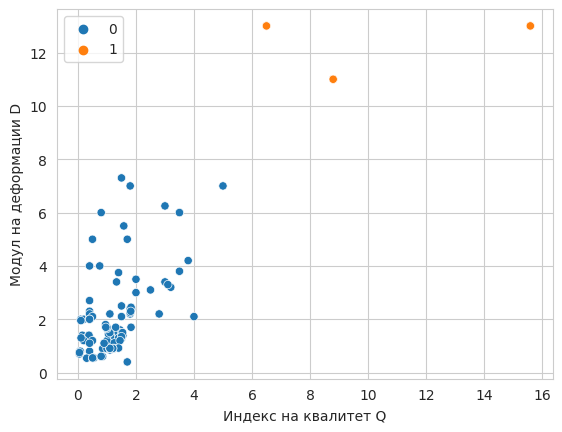

In [2993]:
sns.scatterplot(x=df['Индекс на квалитет Q'], y=df['Модул на деформации D'], hue=labels)
plt.show()

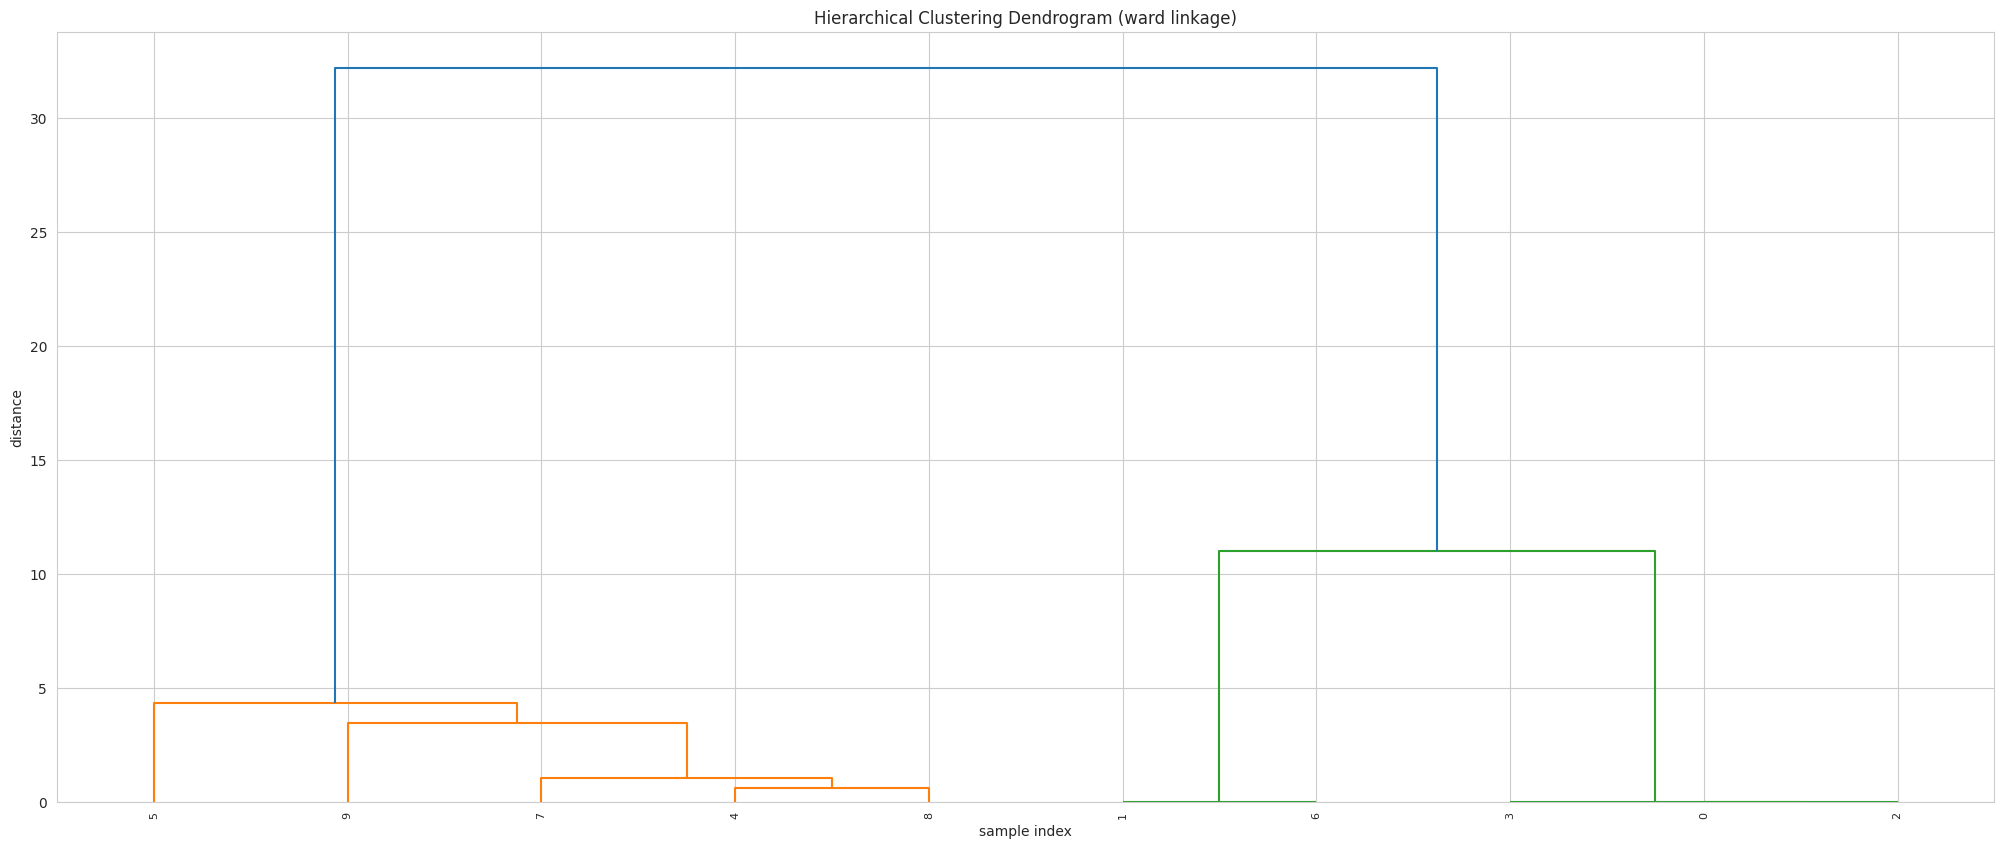

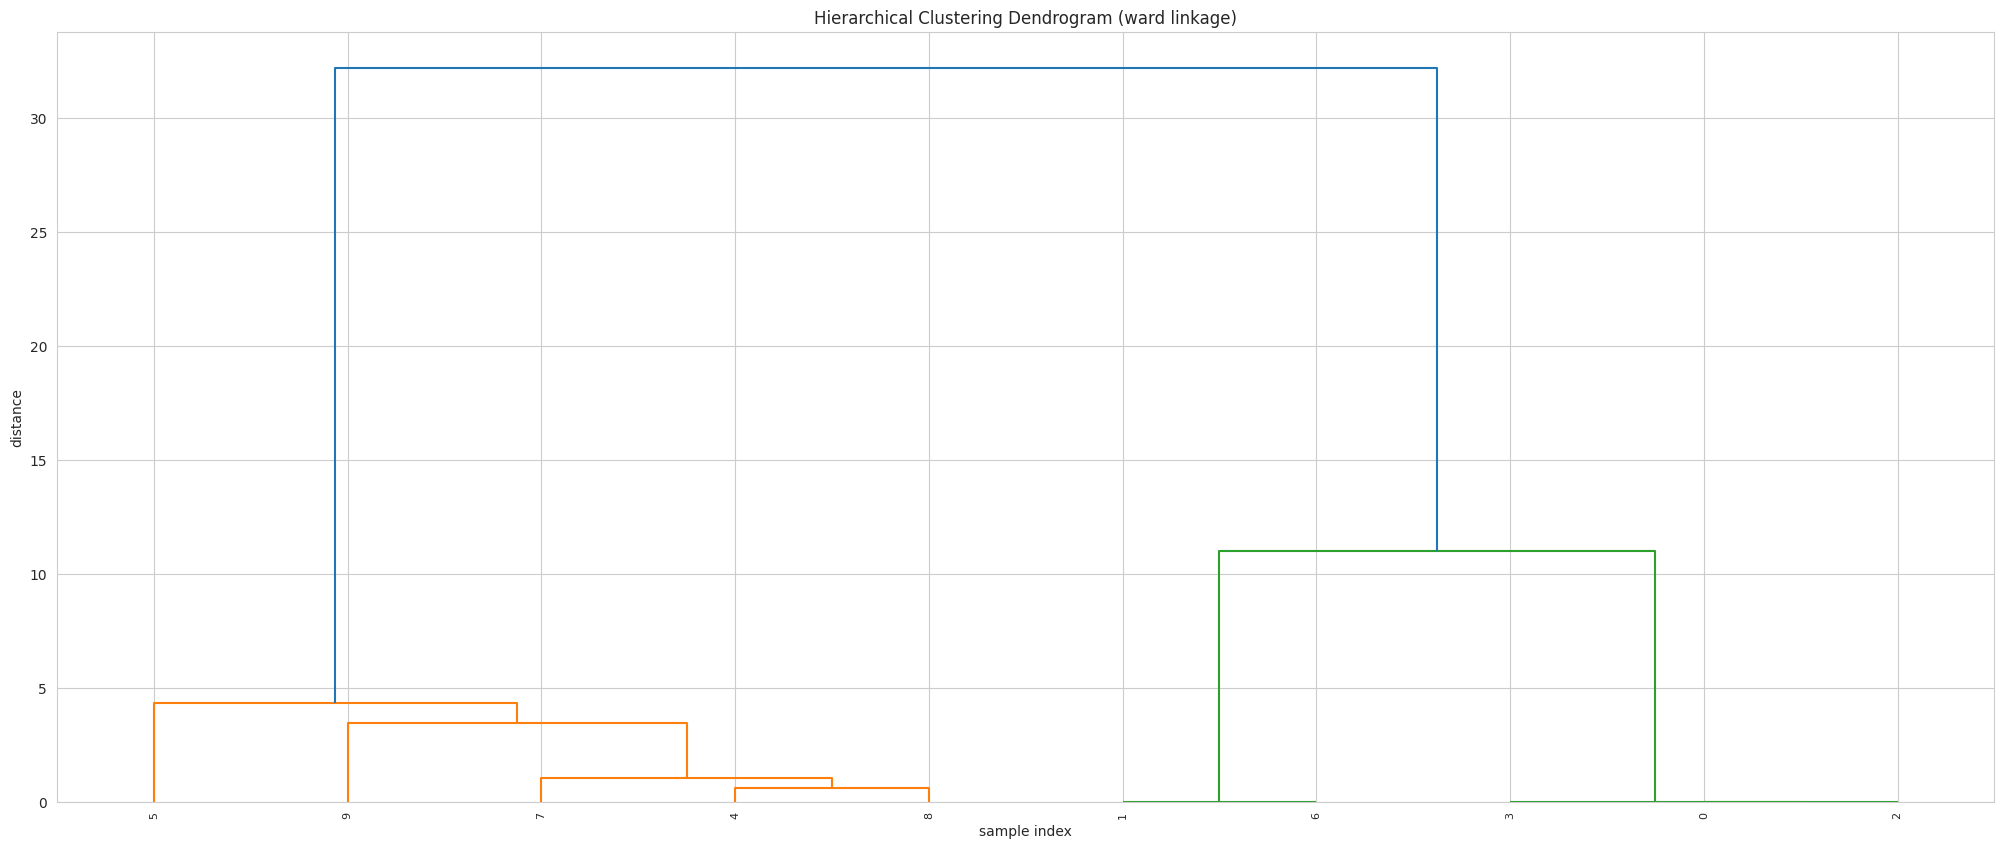

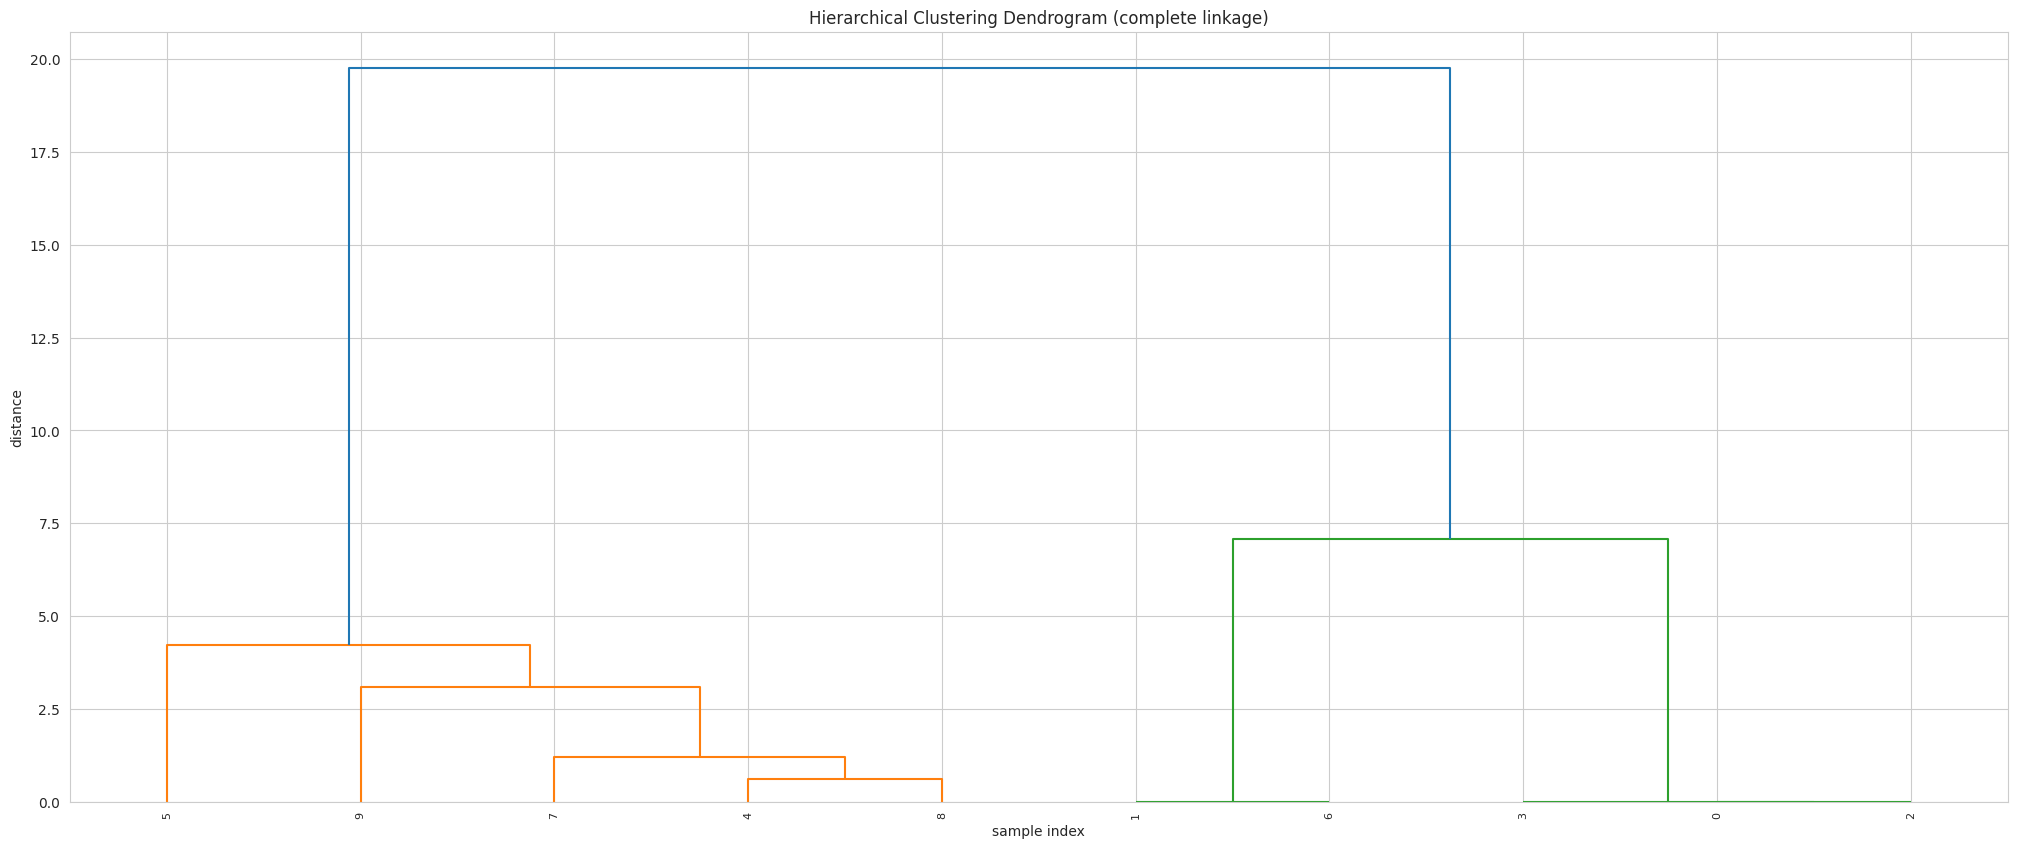

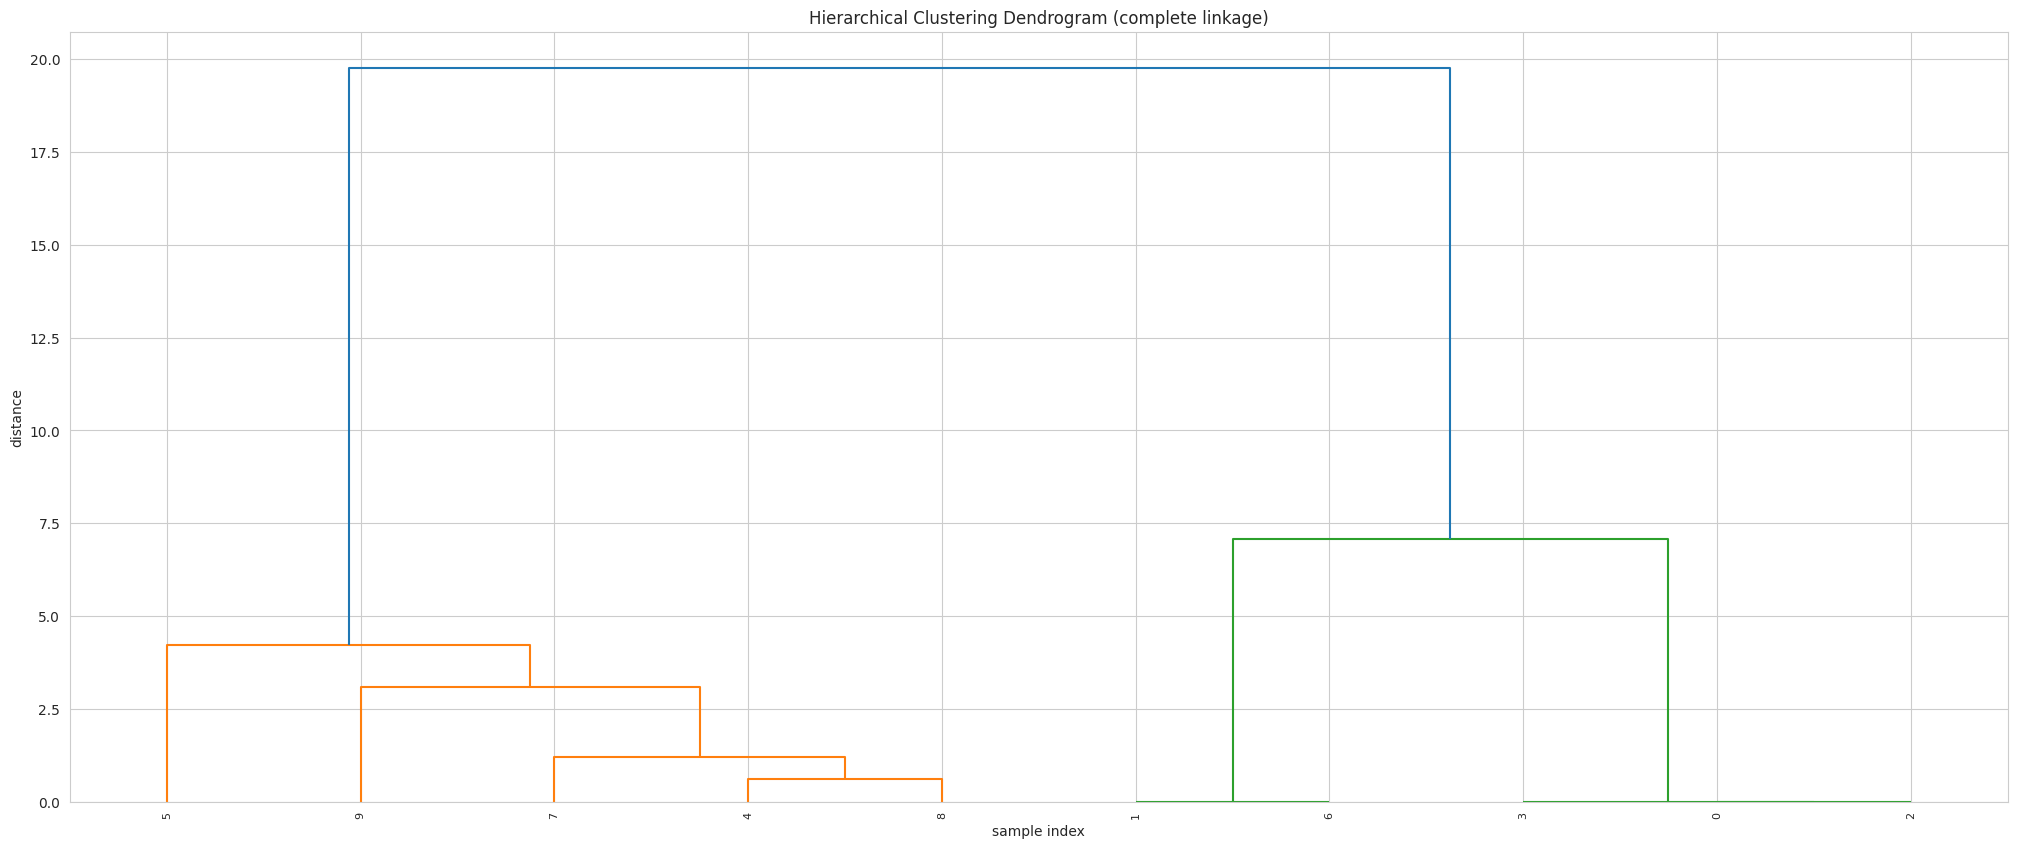

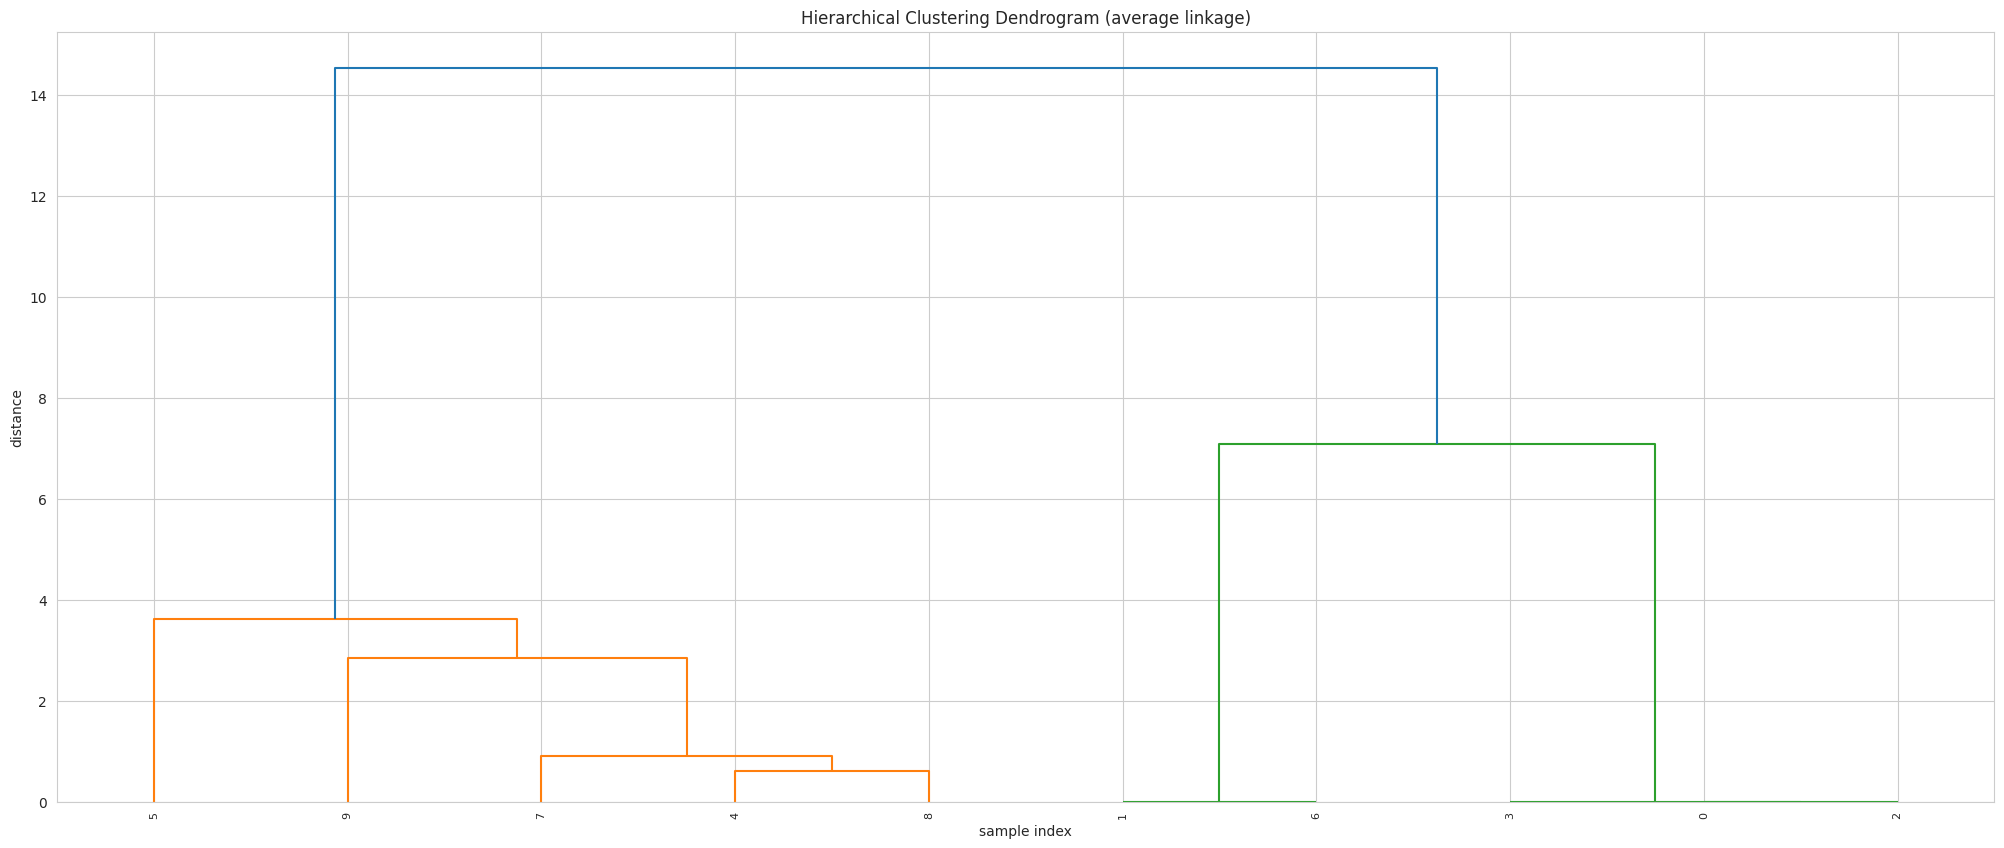

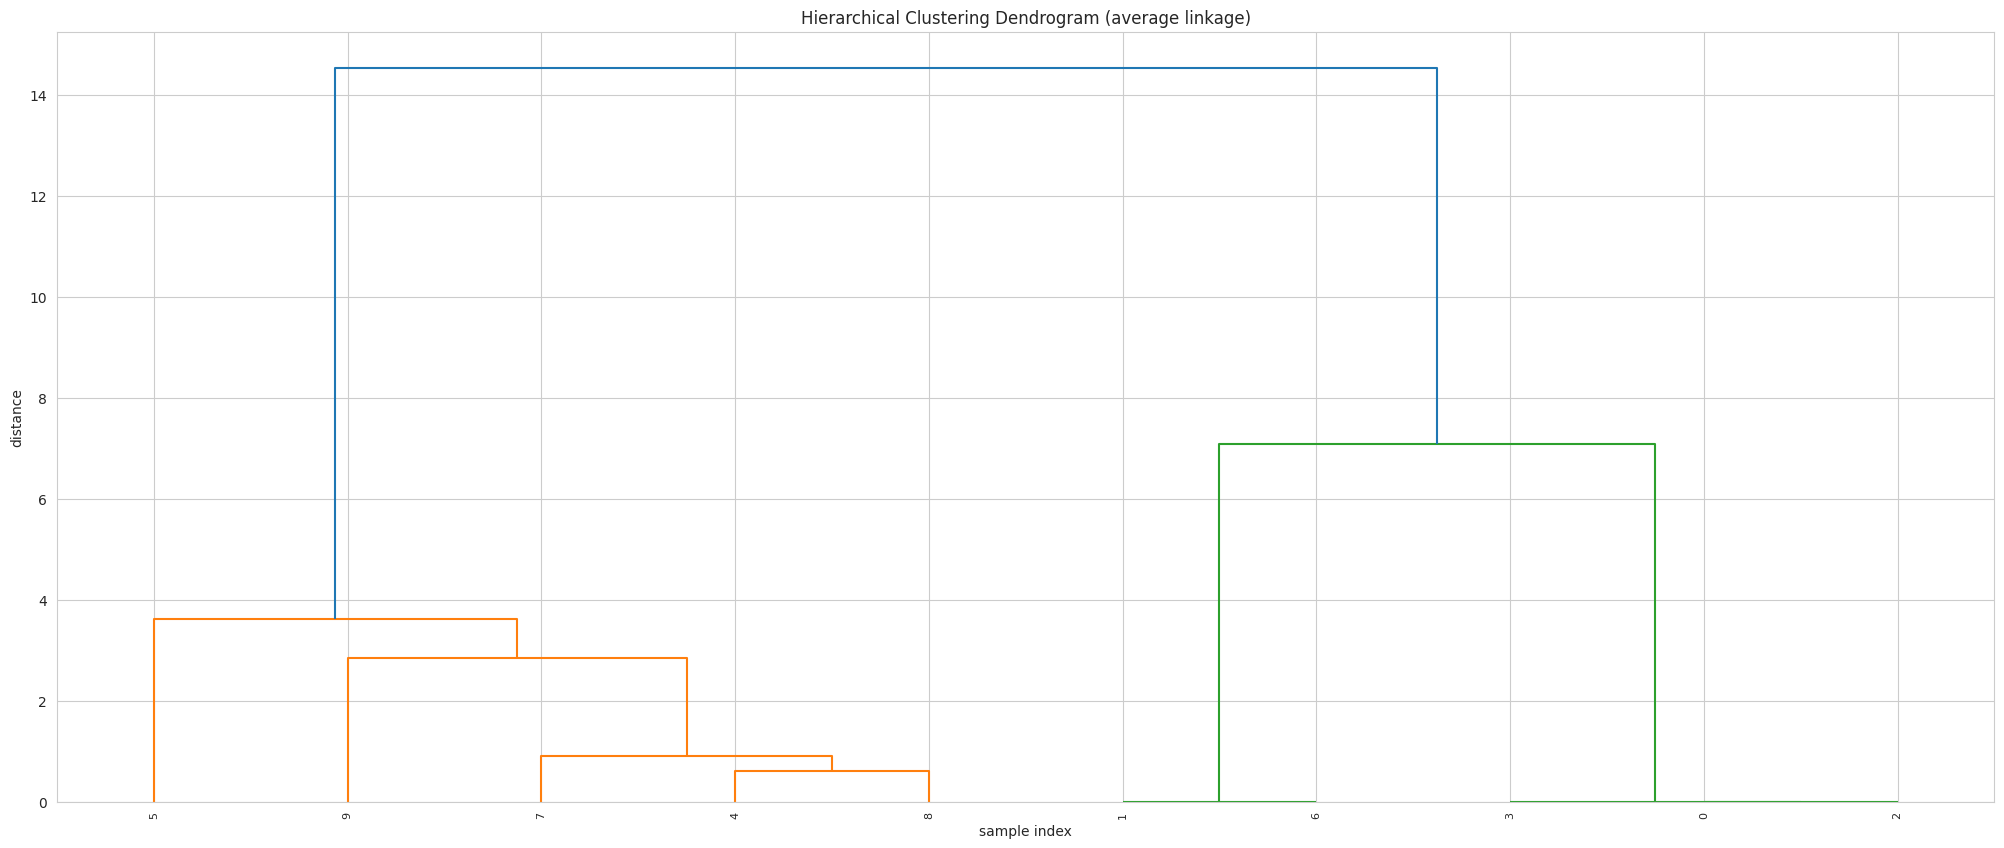

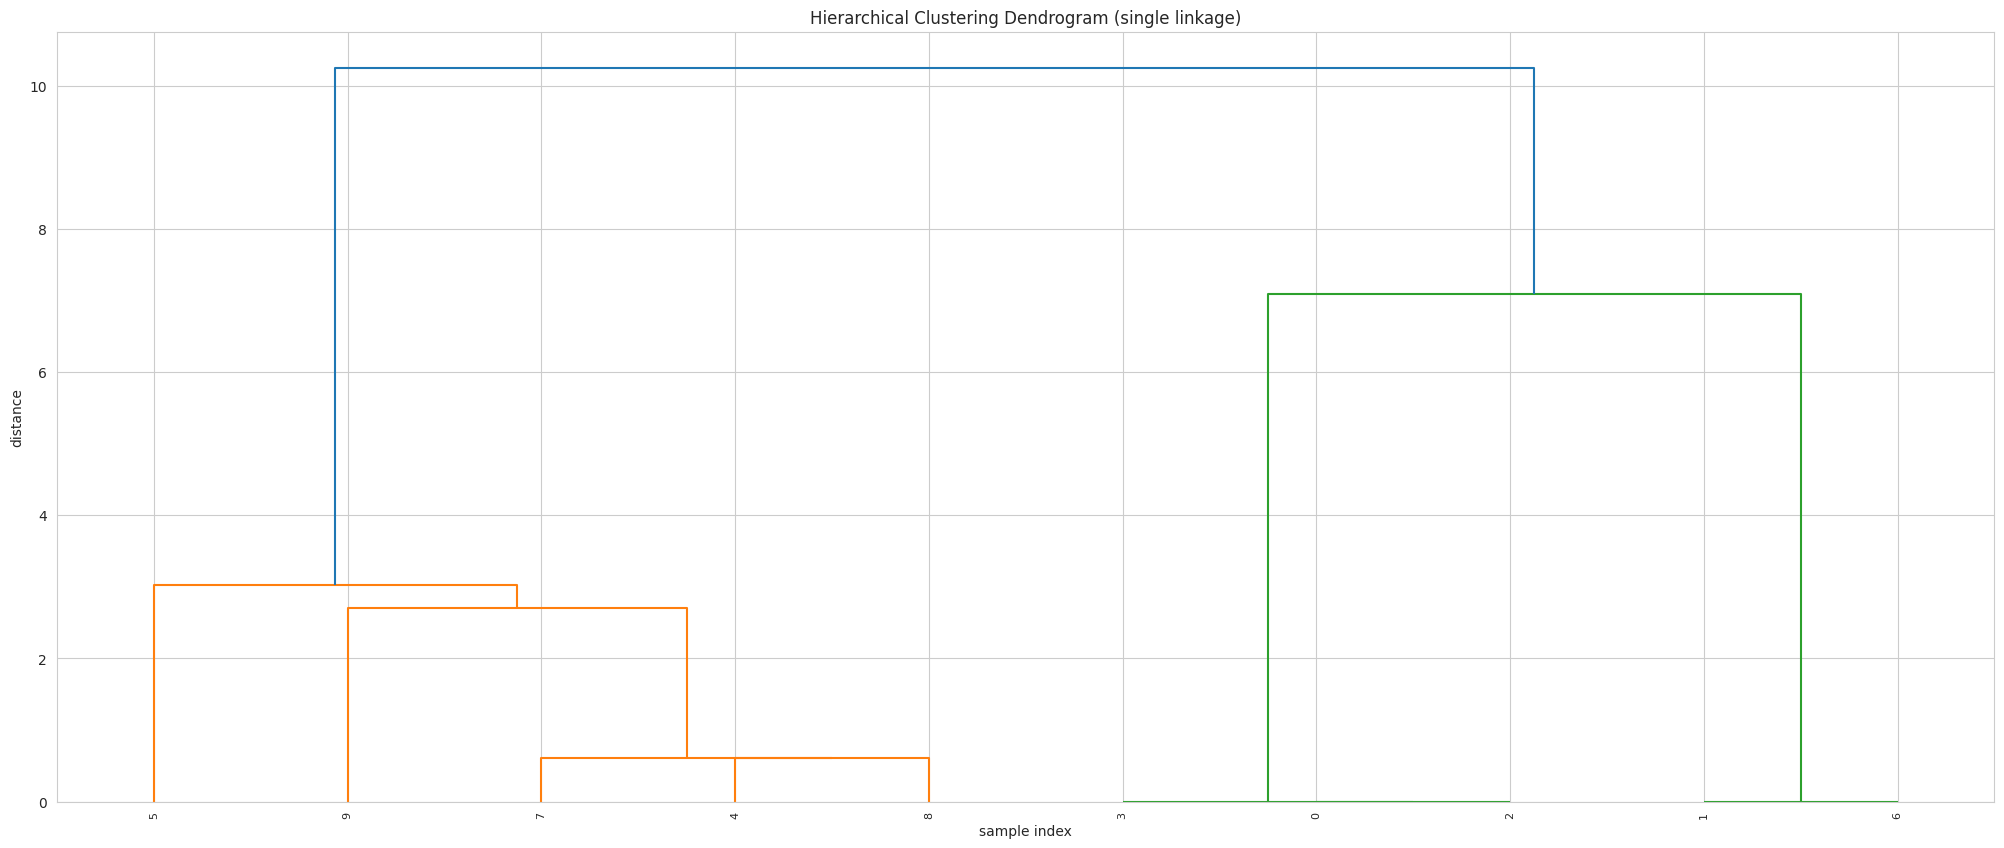

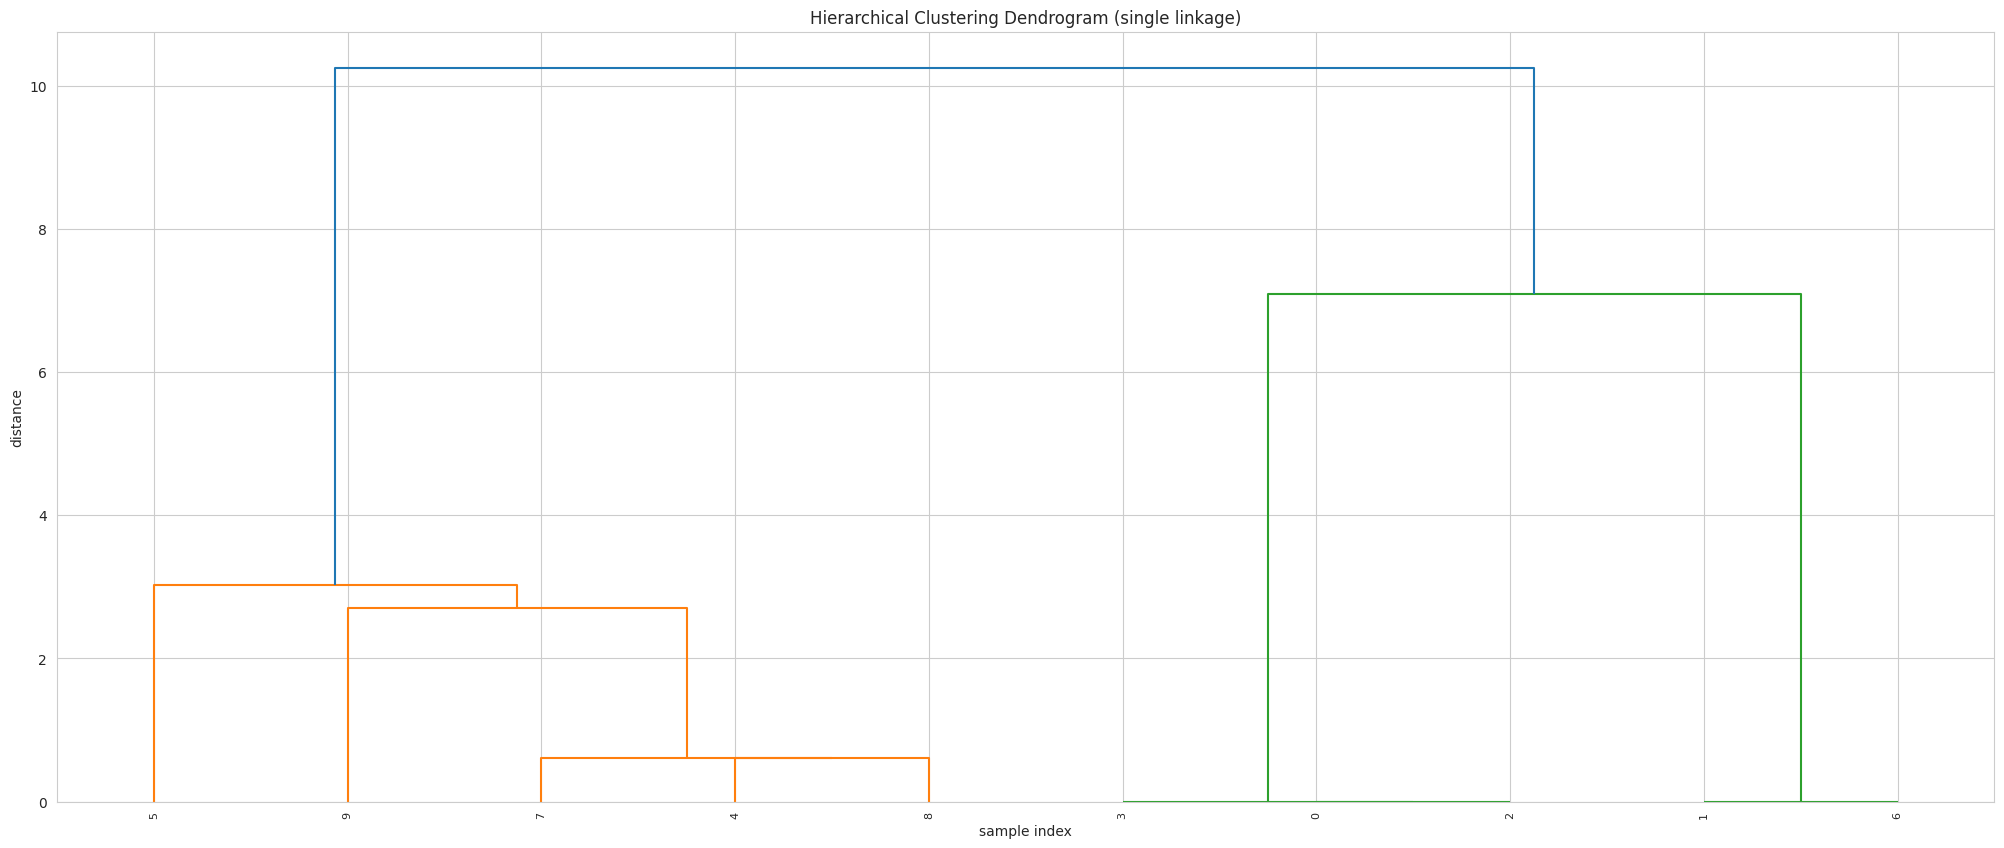

In [2994]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
    Z = linkage(data[:10], link_type)

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.show()

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp')
    plt.show()

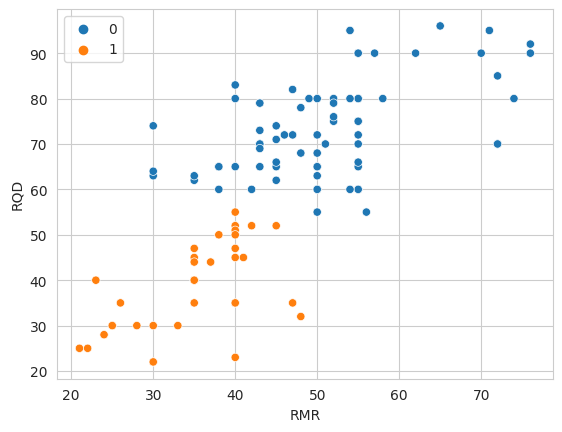

In [2995]:
features = ['RMR', 'RQD']
data = df[features].values
num_clusters = 2
ac = AgglomerativeClustering(n_clusters=num_clusters)
labels = ac.fit_predict(data)
sns.scatterplot(x=df['RMR'], y=df['RQD'], hue=labels)
plt.show()

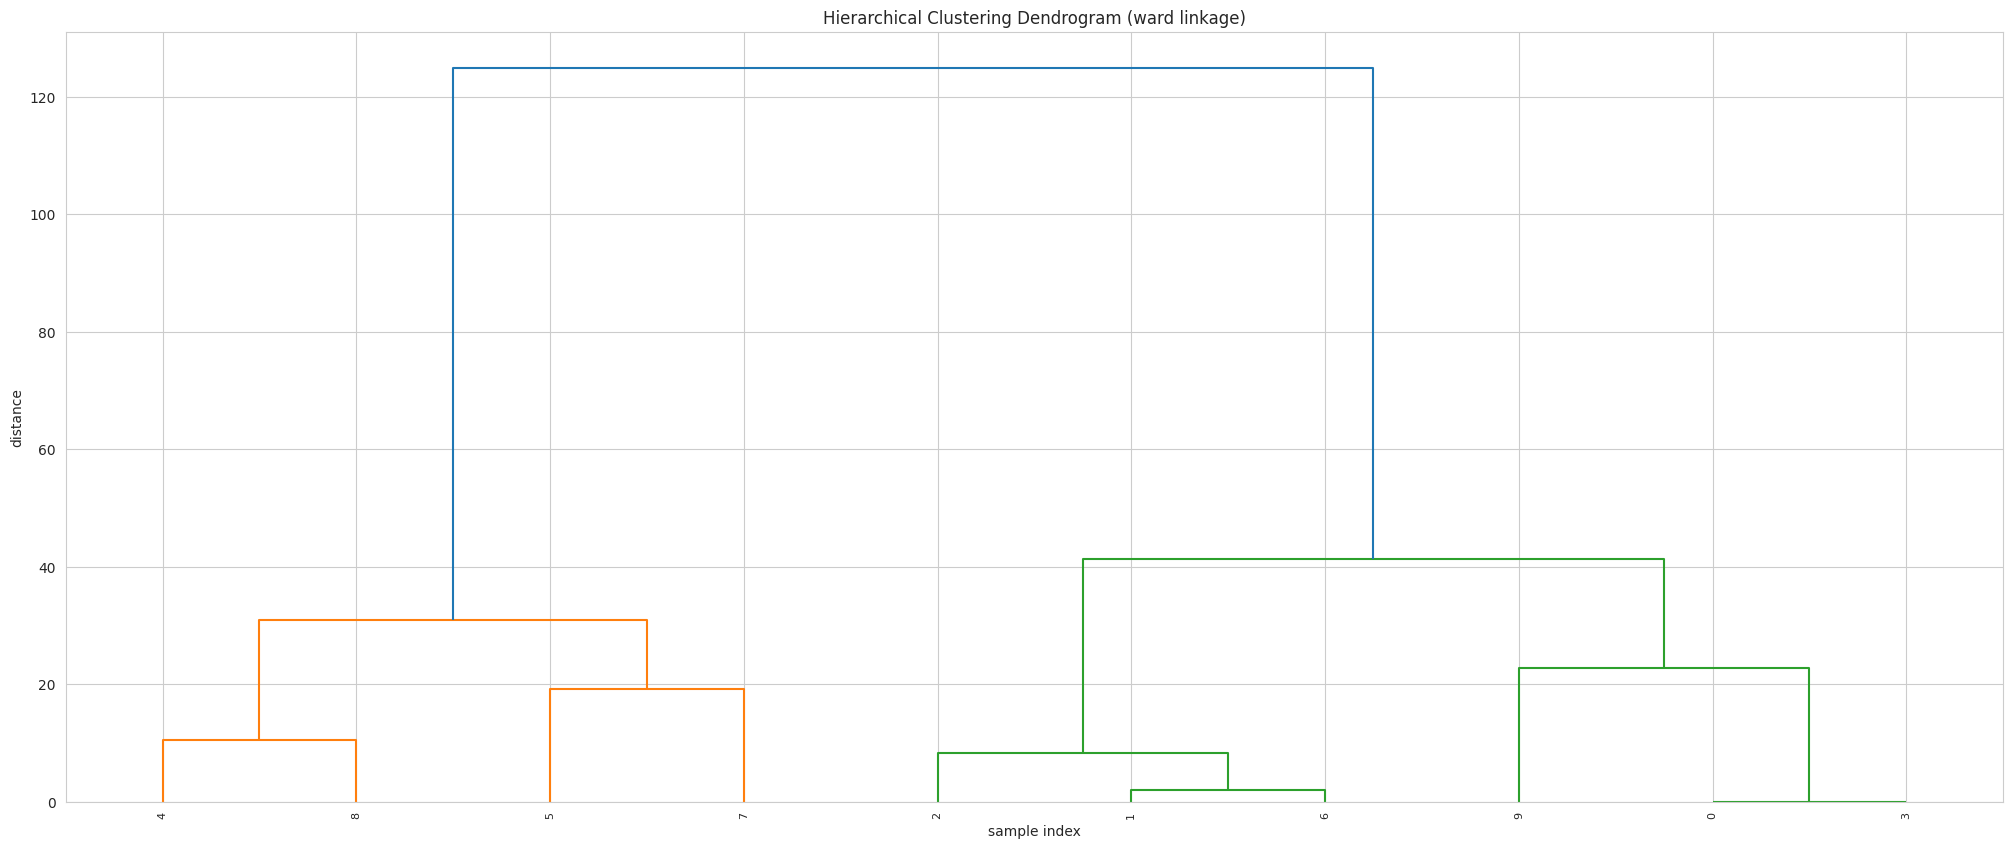

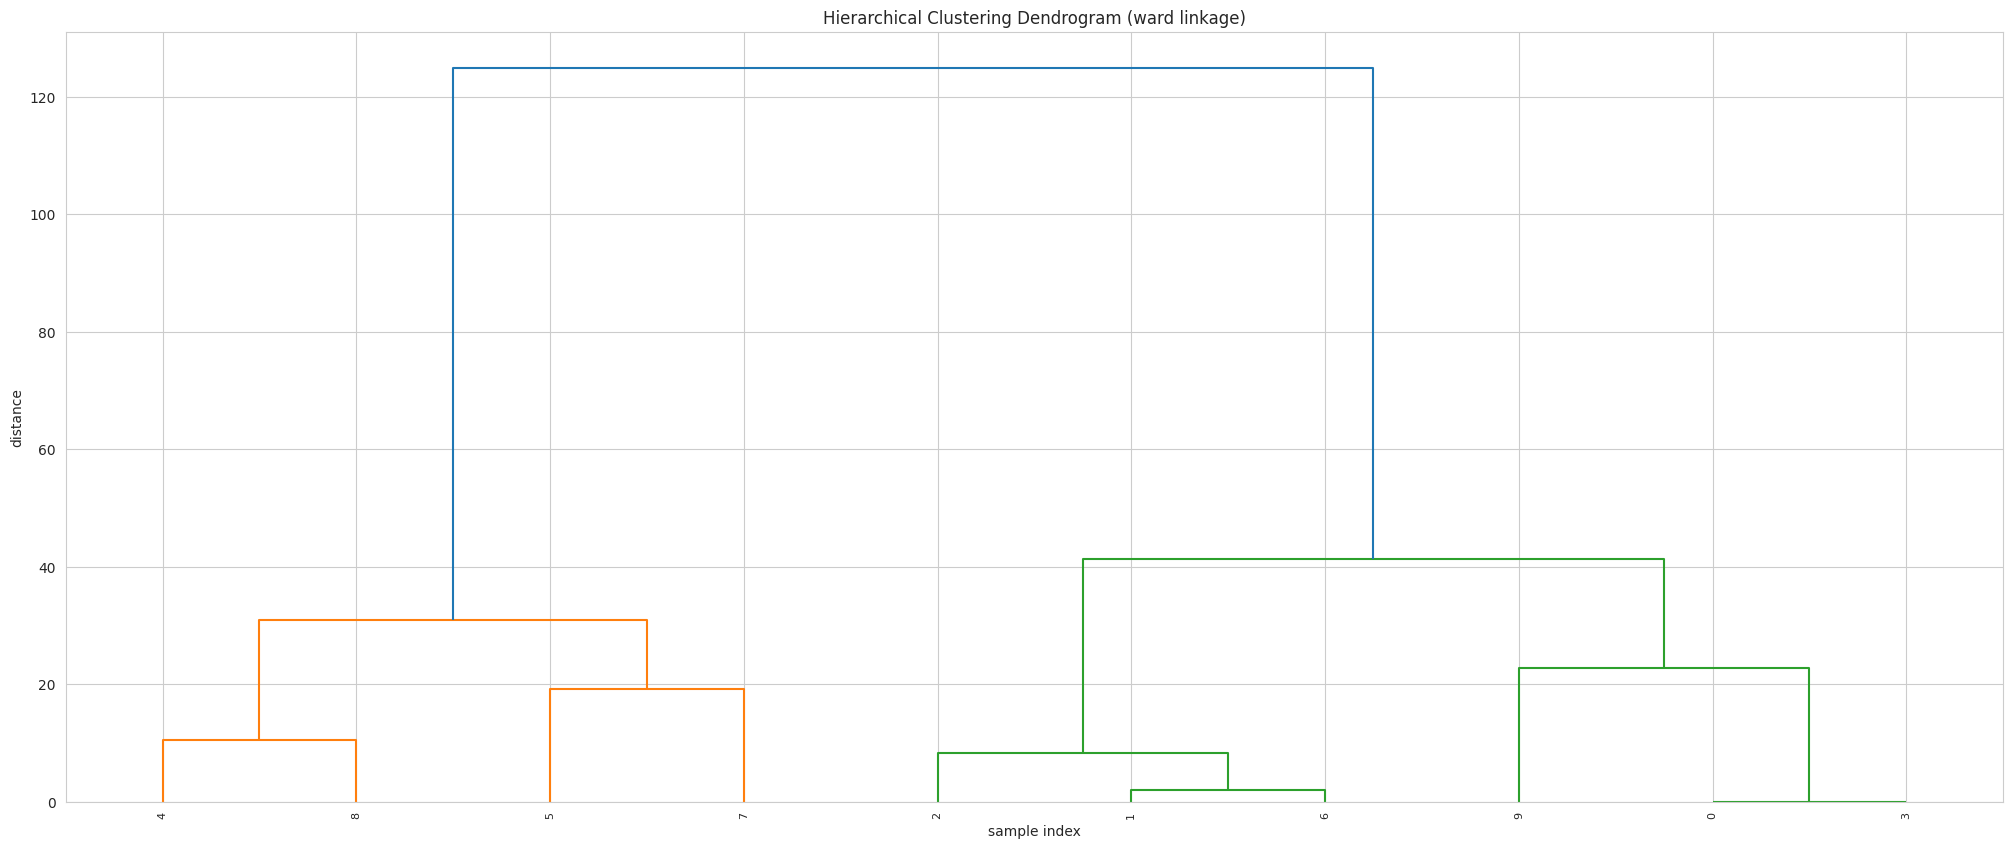

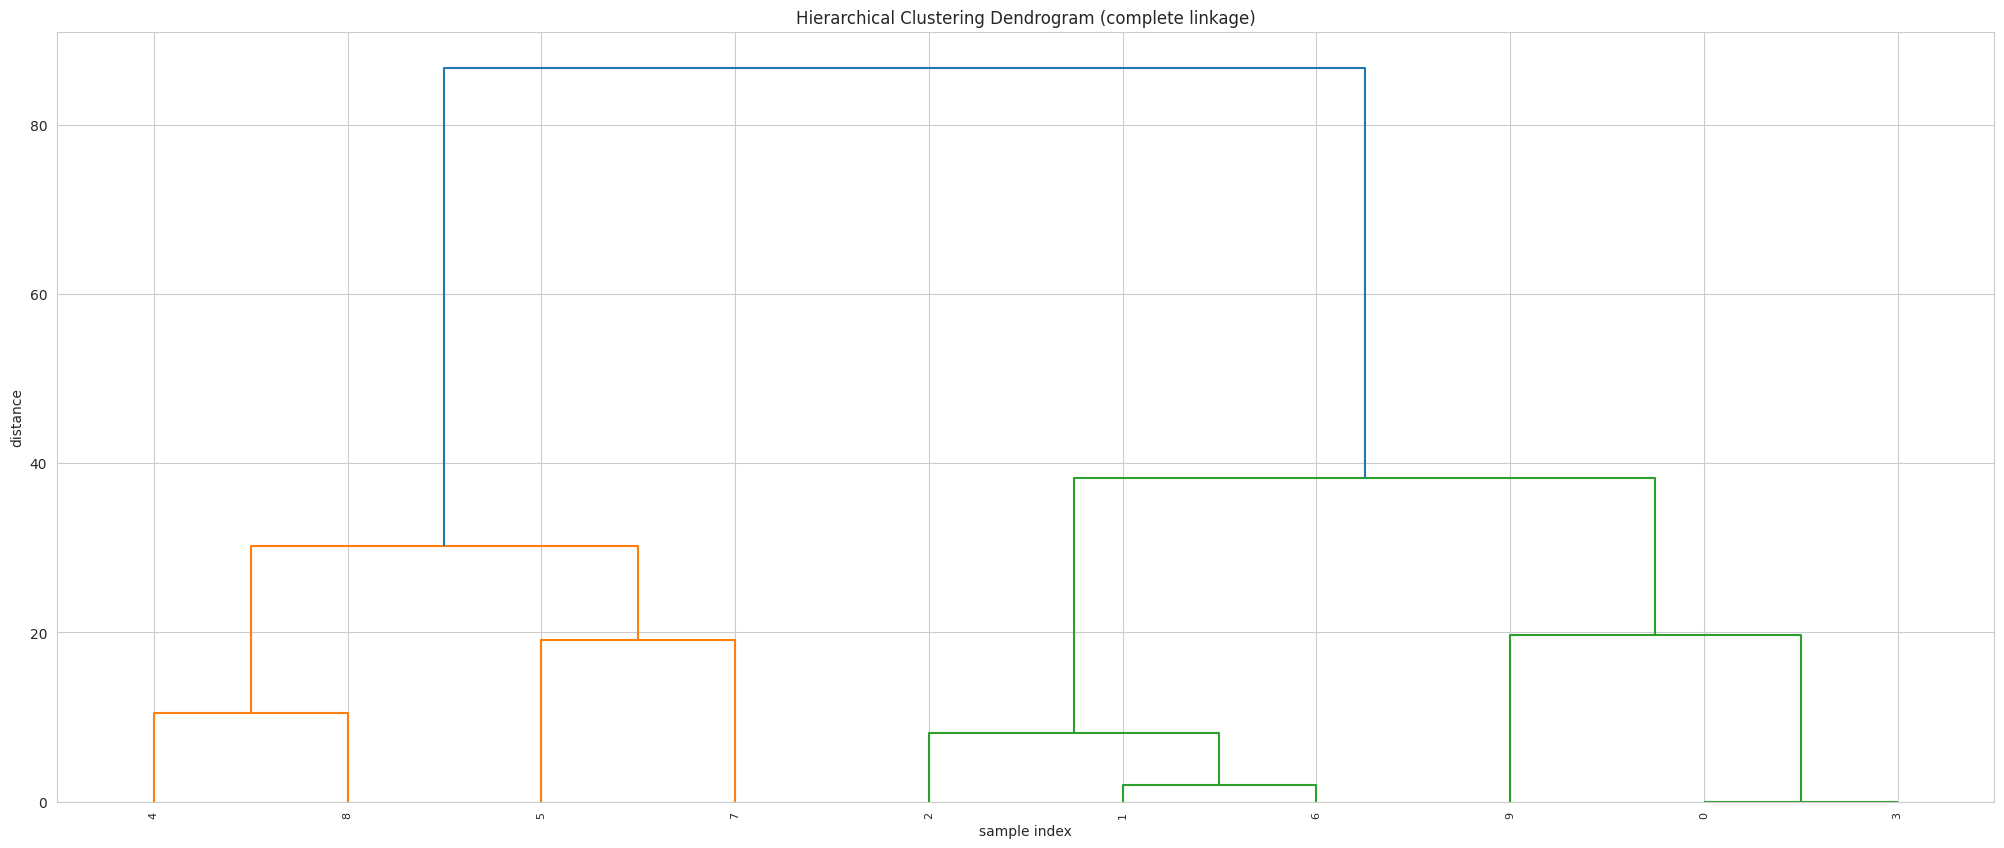

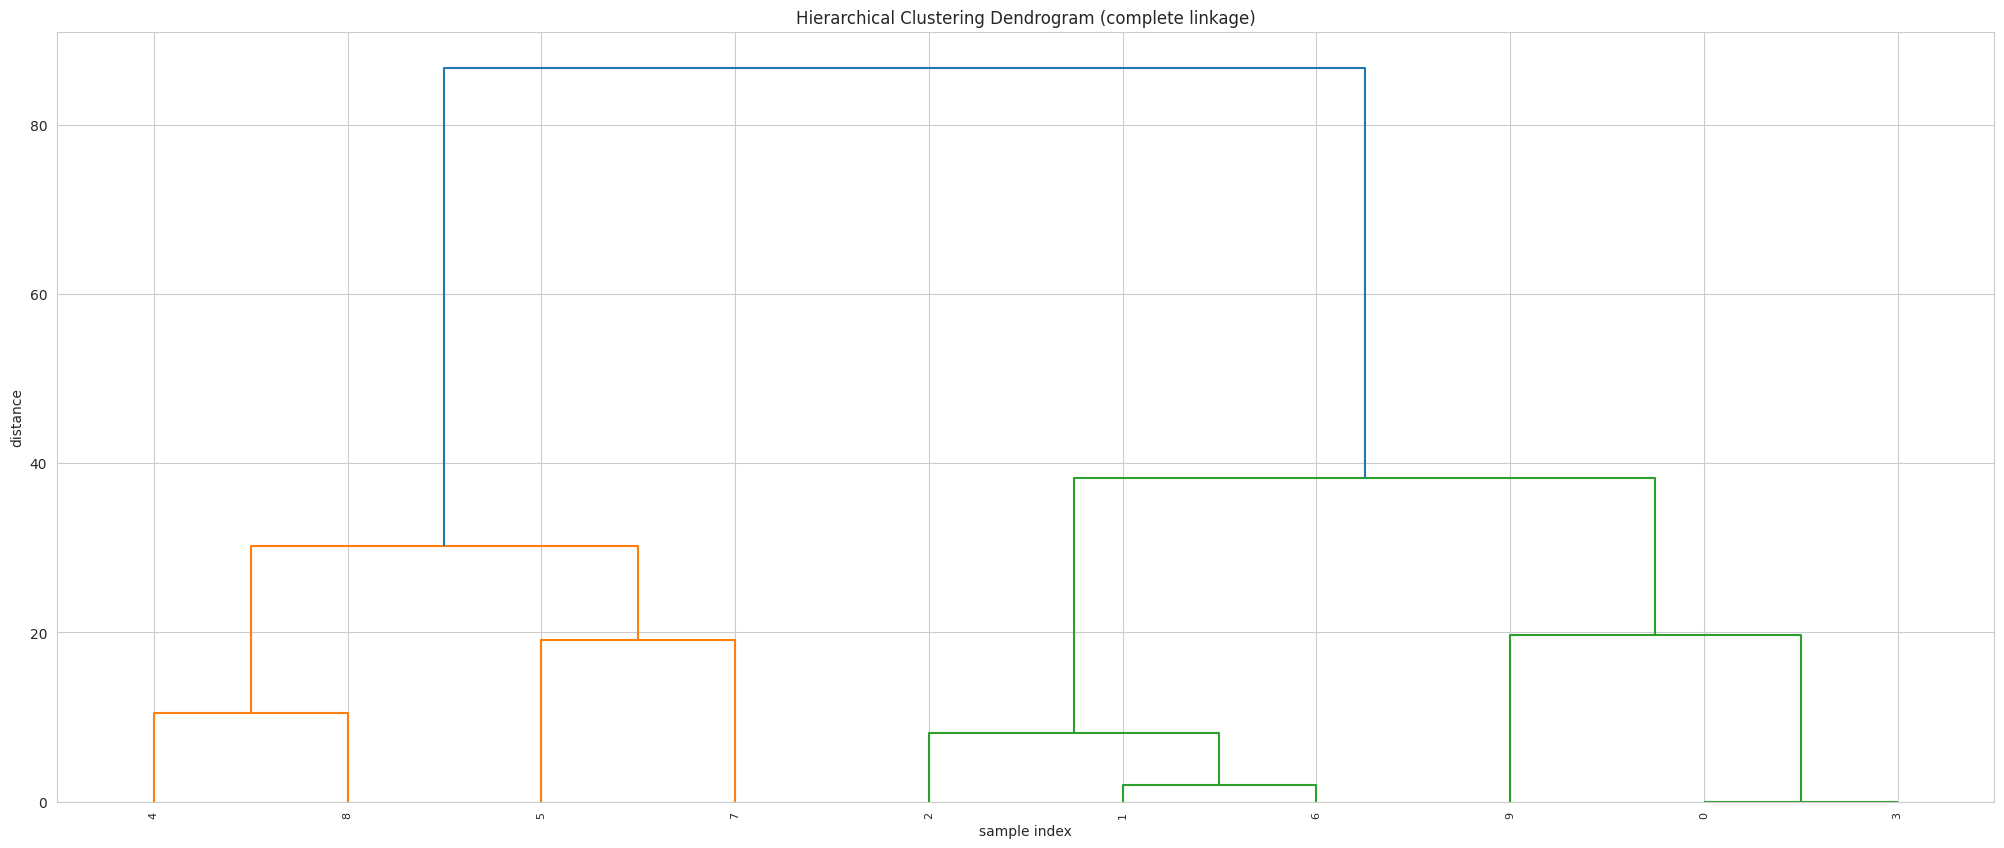

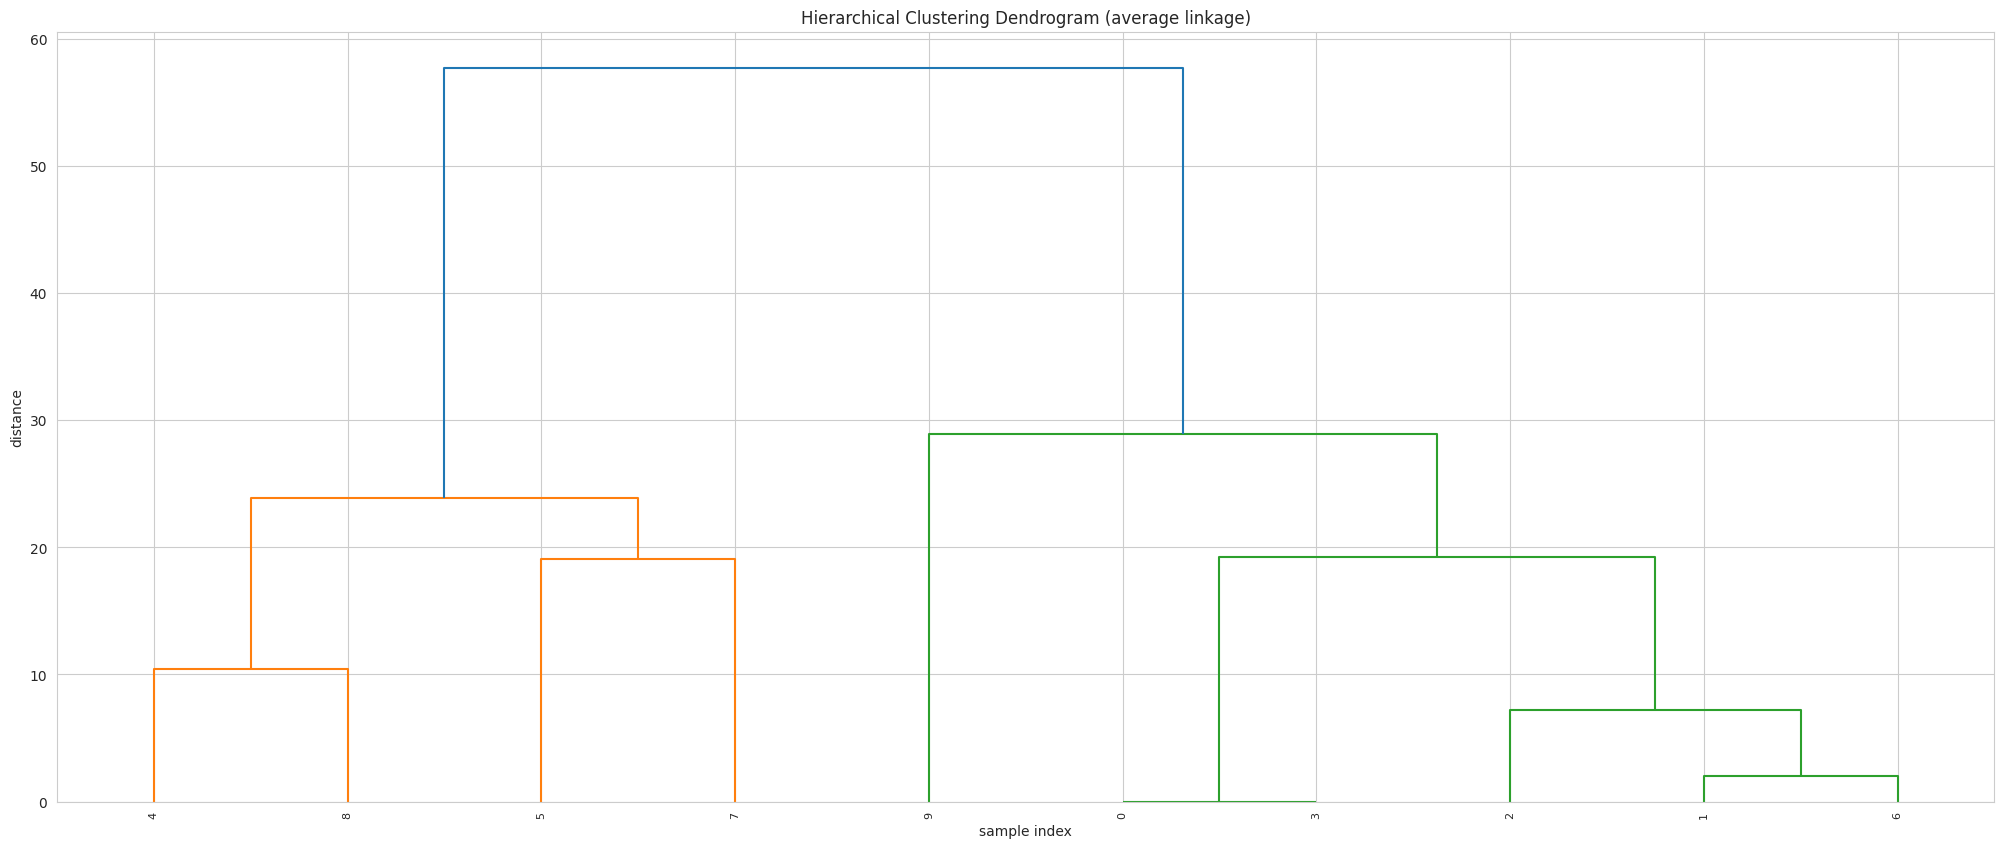

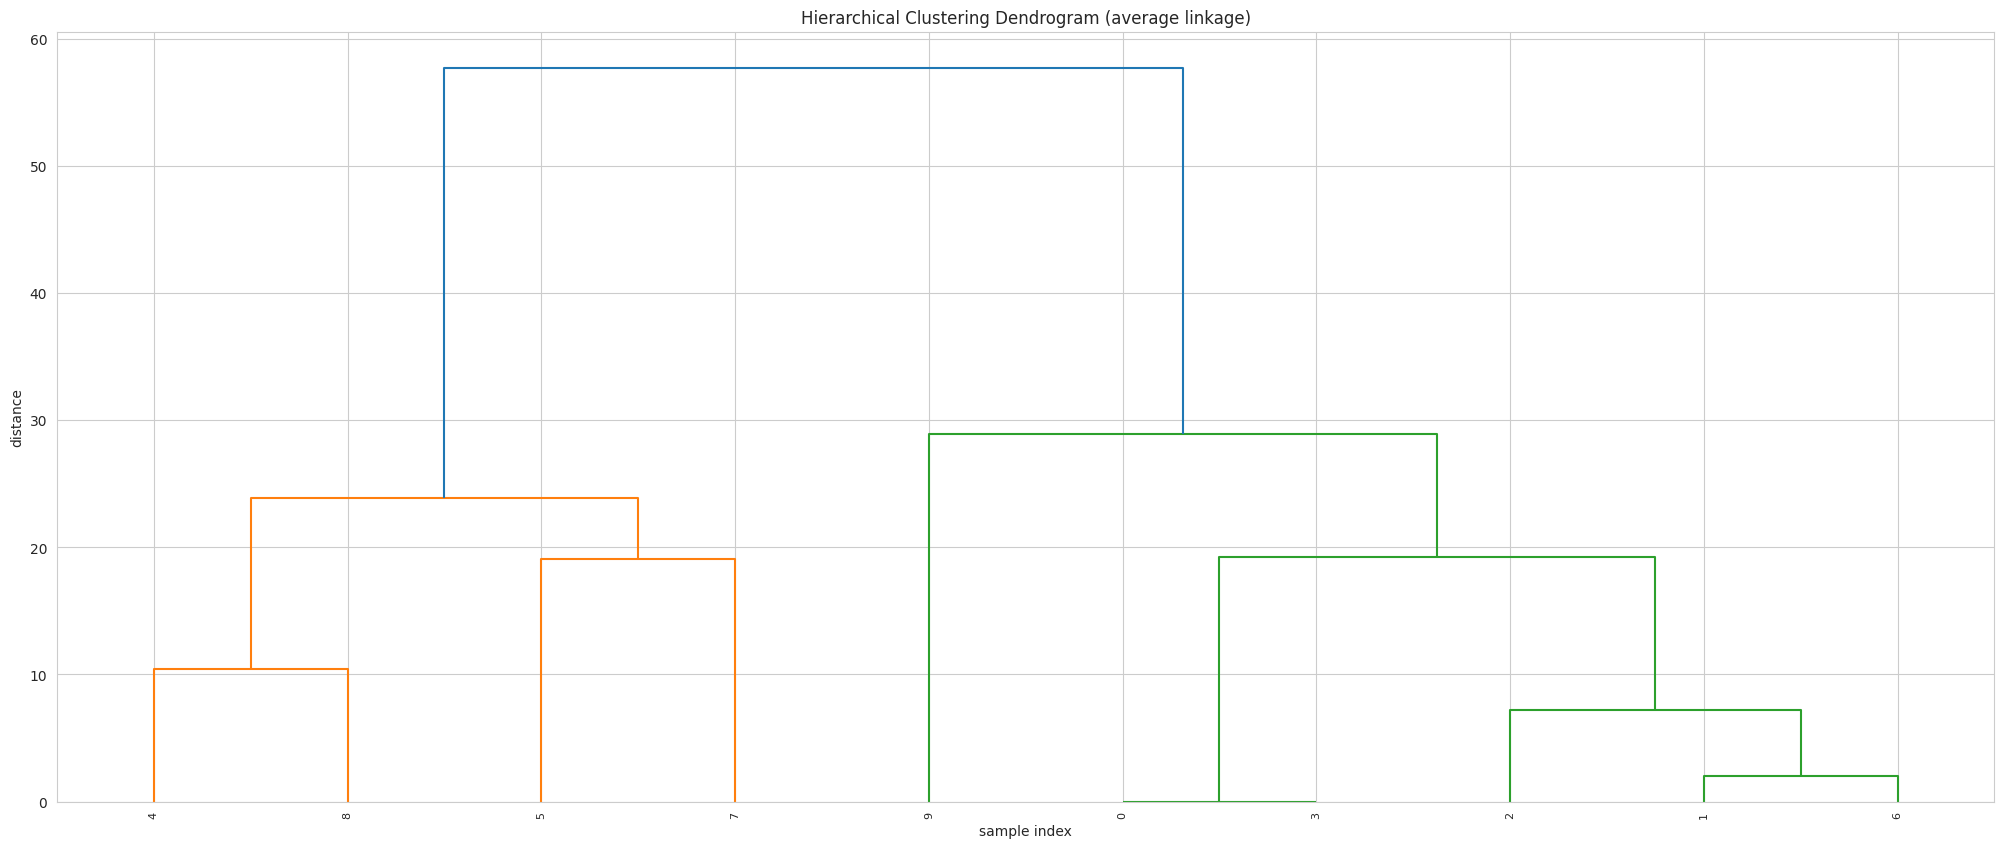

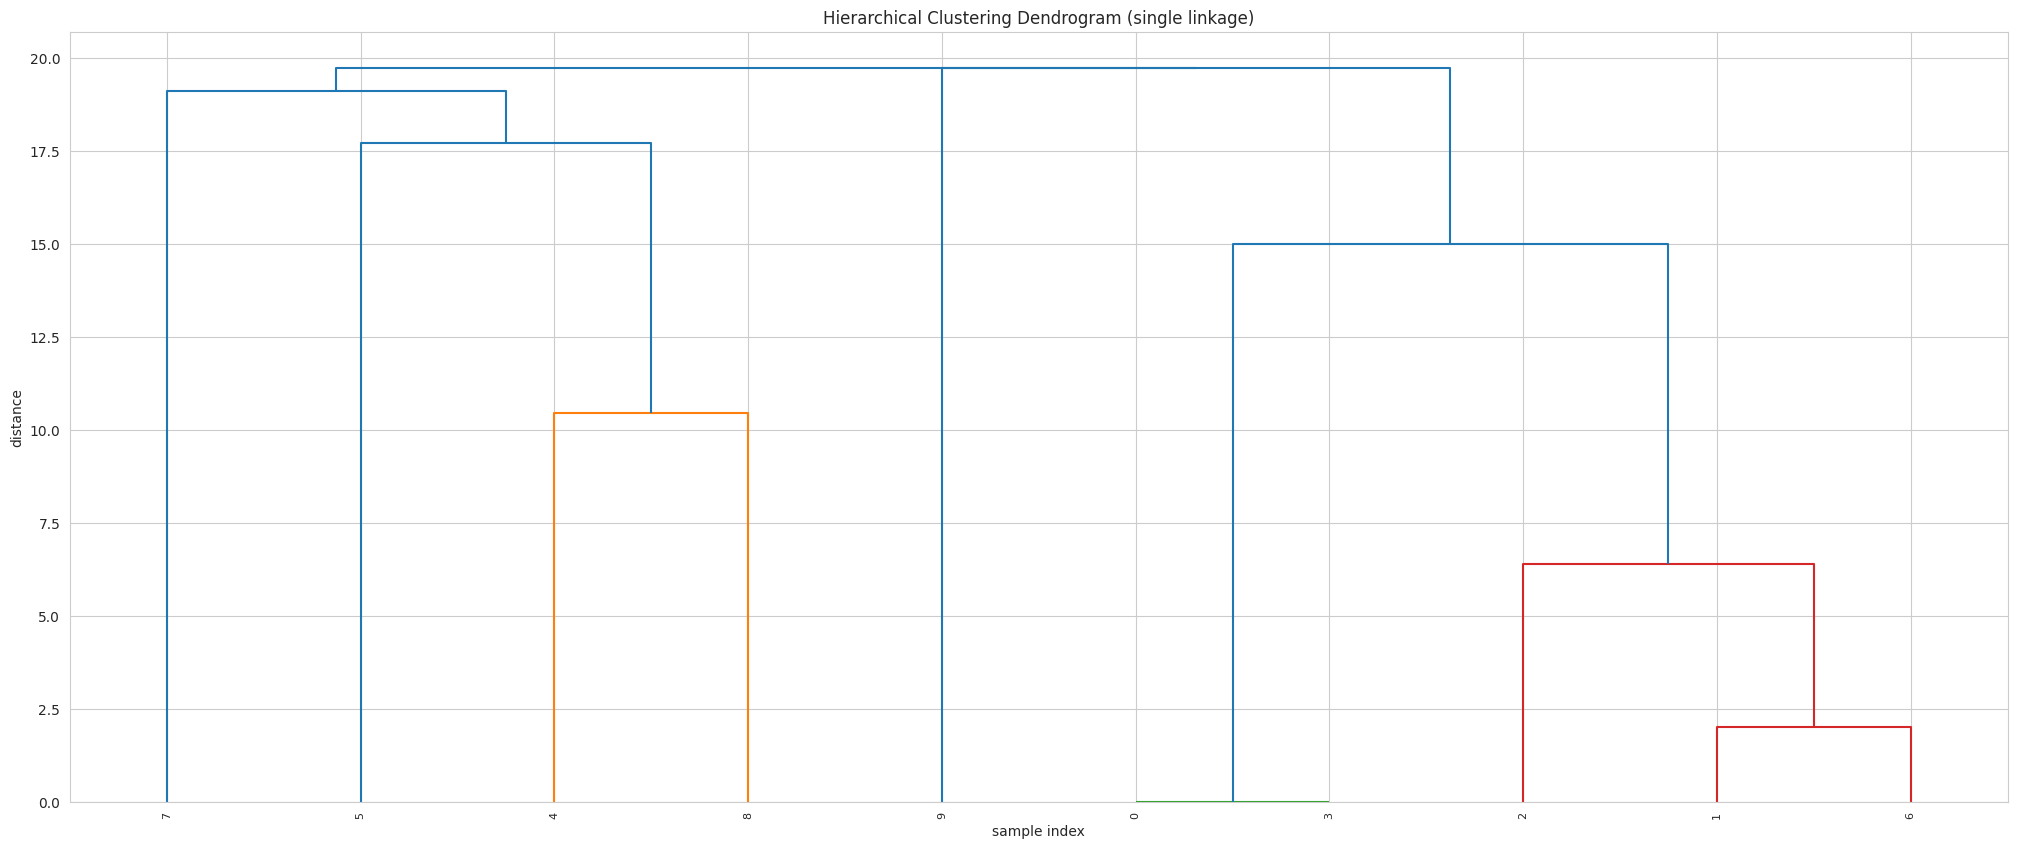

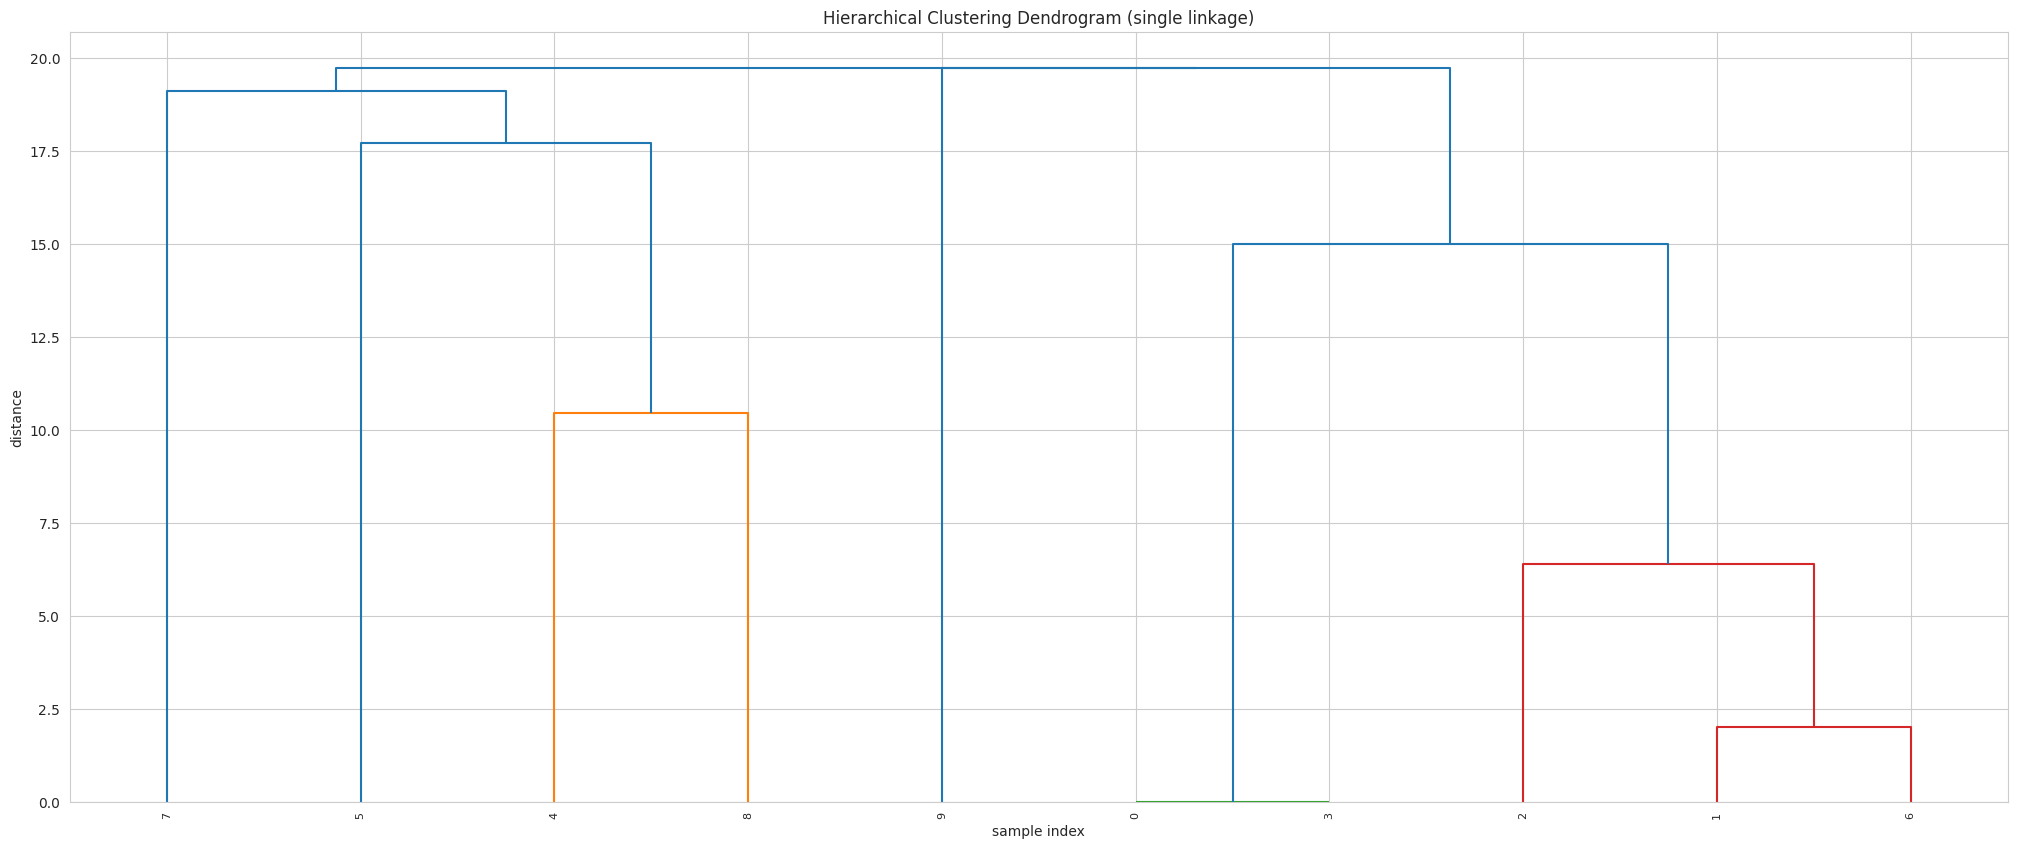

In [2996]:
linkage_types = ['ward', 'complete', 'average', 'single']
for link_type in linkage_types:
    Z = linkage(data[:10], link_type)

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
    plt.show()

    plt.figure(figsize=(25, 10))
    plt.title(f'Hierarchical Clustering Dendrogram ({link_type} linkage)')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp')
    plt.show()

##DBSCAN (Density-based)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) е алгоритам за групирање базиран на густина. За разлика од k-средствата или хиерархиското кластерирање, DBSCAN не бара однапред одредување на бројот на кластери и е способен да открива кластери со произволни форми. DBSCAN служи за да се групираат точките на податоци кои се густо спакувани во просторот за функции, а исто така да се идентификуваат точките на бучава кои не припаѓаат на ниту еден кластер.

In [2997]:
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df2)

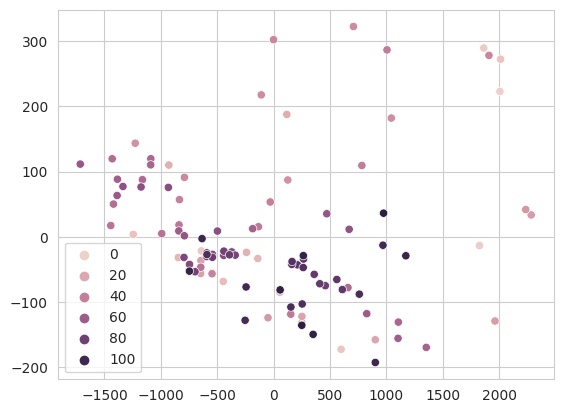

In [2998]:
db = DBSCAN(eps=0.1, min_samples=1).fit(X_pca)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db.labels_)
plt.show()

Тука добивме многу лоши кластери, воопшто и да нема густина во податоците, и се идентификуваат шумови.

#Важност на атрибутите - Feature importance with Decision Tree

Feature importance се однесува на мерката за релевантноста или значајноста на секоја карактеристика во предвидувачкиот модел. Тоа помага да се одреди кои карактеристики имаат најголемо влијание врз предвидувањата или резултатите на моделот. Со проценување на важноста на карактеристиките, можете да ги идентификувате клучните двигатели или променливи кои најмногу придонесуваат за перформансите на моделот.

Feature importance with Decision Tree се однесува на мерката за придонесот на секоја карактеристика во процесот на донесување одлуки на дрвото. Покажува колку секоја карактеристика влијае на поделбите направени од дрвото за класификација или предвидување на целната променлива.Feature importance  на карактеристиката се пресметуваат врз основа на добивката на информации или нечистотијата на Gini при секое делење во стеблото на одлуки. Повисокиот резултат за важноста на карактеристиката покажува дека карактеристиката има посилна моќ на предвидување за целната променлива.



##Таргет колона е RMR

In [2999]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3000]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [3001]:
importance = dtc.feature_importances_

In [3002]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, Importance: {importance[i]}")

Feature: Надслој, Importance: 0.0
Feature: Волуменска тежина, Importance: 0.021722846441947566
Feature: Јакост на притисок, Importance: 0.12964678938515842
Feature: Доток на вода, Importance: 0.0
Feature: RQD, Importance: 0.34438538759085824
Feature: Средно растојание меѓу пукнатини Ls, Importance: 0.07343824843974256
Feature: Брзини Vp , Importance: 0.12976577241354964
Feature: Поасонов коефициент, Importance: 0.04810058855002674
Feature: Индекс на квалитет Q_classification_encoded, Importance: 0.07717469796121482
Feature: Модул на деформации D_classification_encoded, Importance: 0.17576566921750203


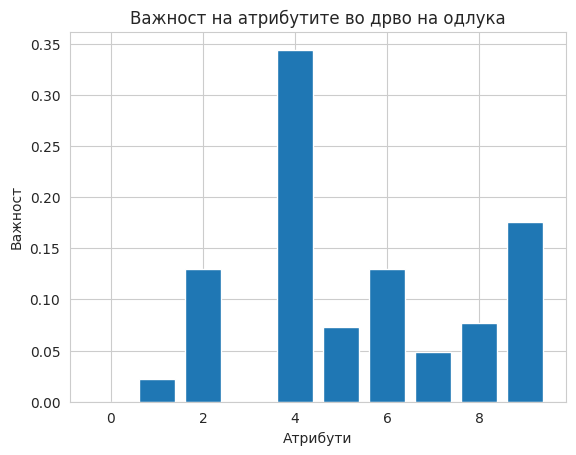

In [3003]:
plt.bar(range(len(importance)), importance)
plt.xlabel('Атрибути')
plt.ylabel('Важност')
plt.title('Важност на атрибутите во дрво на одлука')
plt.show()

RQD, Модул на деформации D, Јакост на притисок и Брзини Vp имаат релативно повисоки вредности на важност и се повлијателни во предвидувањето на целната променлива. Додека пак атрибутите како Надслој и Доток на вода имаат вредности на важност од 0,0, што укажува дека можеби нема да придонесат многу за предвидувањата на моделот.

##Таргет колона е Индекс на квалитет Q

In [3004]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3005]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_

In [3006]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, Importance: {importance[i]}")

Feature: Надслој, Importance: 0.1284285714285714
Feature: Волуменска тежина, Importance: 0.17555125956632653
Feature: Јакост на притисок, Importance: 0.0
Feature: Доток на вода, Importance: 0.05358896683673466
Feature: RQD, Importance: 0.029129464285714283
Feature: Средно растојание меѓу пукнатини Ls, Importance: 0.13486892775727316
Feature: Брзини Vp , Importance: 0.07929687499999999
Feature: Поасонов коефициент, Importance: 0.0
Feature: RMR_category_encoded, Importance: 0.3667698636968085
Feature: Модул на деформации D_classification_encoded, Importance: 0.03236607142857143


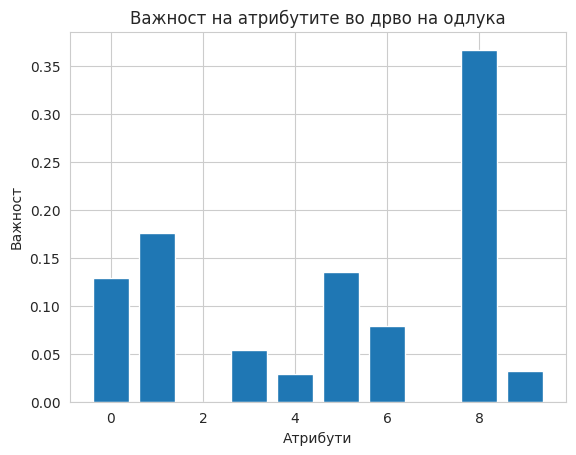

In [3007]:
plt.bar(range(len(importance)), importance)
plt.xlabel('Атрибути')
plt.ylabel('Важност')
plt.title('Важност на атрибутите во дрво на одлука')
plt.show()

RMR, Волуменска тежина, Средно растојание меѓу пукнатини Ls и Надслој имаат високи вредности на важност и се повлијателни во предвидувањето на променлива. Спротивно на тоа, карактеристиките како Јакост на притисок и Поасонов коефициент имаат вредности на важност од 0,0, што укажува дека тие можеби не придонесуваат значително за предвидувањата на моделот.

##Таргет колона е Модул на деформации D

In [3008]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3009]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
importance = dtc.feature_importances_

In [3010]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, Importance: {importance[i]}")

Feature: Надслој, Importance: 0.08727946606982859
Feature: Волуменска тежина, Importance: 0.029326338199513354
Feature: Јакост на притисок, Importance: 0.3273844227448992
Feature: Доток на вода, Importance: 0.03307481751824819
Feature: RQD, Importance: 0.08431459316557924
Feature: Средно растојание меѓу пукнатини Ls, Importance: 0.03572080291970804
Feature: Брзини Vp , Importance: 0.0939106741798348
Feature: Поасонов коефициент, Importance: 0.27050182481751806
Feature: RMR_category_encoded, Importance: 0.0
Feature: Индекс на квалитет Q_classification_encoded, Importance: 0.03848706038487058


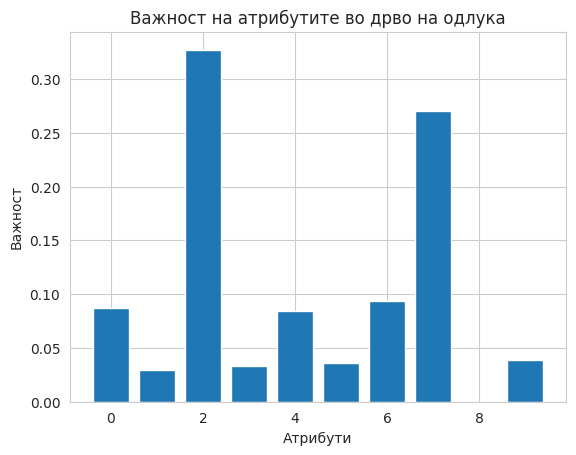

In [3011]:
plt.bar(range(len(importance)), importance)
plt.xlabel('Атрибути')
plt.ylabel('Важност')
plt.title('Важност на атрибутите во дрво на одлука')
plt.show()

Јакост на притисок и Поасонов коефициент  се најважните карактеристики за предвидување на целната променлива. Другите карактеристики како Надслој, Волуменска тежина, Доток на вода, RQD, Средно растојание меѓу пукнатини Ls и Брзини Vp имаат релативно пониски вредности на важност, што сугерира дека имаат релативно послабо влијание врз целната променлива.

Што може да заклучиме со сите овие добиени резултати:

Како што знаеме имаме негативна корелација кај Поасонов коефициент со RMR и тука кога гледаме важност на атрибутите видовме дека кога RMR ни е таргет колона Поасонов коефициент нема воопшто влијание врз моделот при тренирање. Исто така оваа таргет колона има позитивна корелација со RQD и Брзина Vp и тука добиваме резултати што ни кажуваат дека тие се едни од атрибутите кои влијаат односно се важни при тренирање на моделот. Кога Индекс на  Квалитет Q ние е таргет може ме да видиме дека зависи од Средно растојание межу пукнатини Ls и да тие два атрибута имаат позитивна корелација меѓу себе. Но кога имаме таргет колона Модул на деформации D, можеме да видиме дека иако со атрибутот Средно растојание меѓу пукнатини Ls имаат позитивна корелација, тука овој атрибут има многу мала важност.



#Recursive Feature Elimination

Recursive Feature Elimination (RFE) е техника за избор на карактеристики што се користи за избирање на најважните карактеристики од дадена база на податоци. Работи со рекурзивно елиминирање на помалку важни карактеристики и избирање на најдобрата подгрупа карактеристики врз основа на одреден критериум.

Во случај со логистичка регресија, RFE работи на следниов начин: Прво, се обучува модел на логистичка регресија на целата база на податоци.
Важноста на секоја карактеристика е одредена од коефициентите или тежините што им се доделени од моделот на логистичка регресија. Функцијата со најмала важност е отстранета од базата на податоци. И потоа овој процес се повторува се додека не се избере саканиот број на атрибути/карактеристики. [1]

##Таргет колона е RMR

In [3012]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3013]:
clf = DecisionTreeClassifier()

In [3014]:
rfe = RFE(estimator=clf, n_features_to_select=5)

In [3015]:
selected_features = rfe.fit_transform(X, y)

In [3016]:
attribute_names=['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']

In [3017]:
for i, support in enumerate(rfe.support_):
    if support:
        print(f"Selected attribute: {attribute_names[i]}")

Selected attribute: Надслој
Selected attribute: Јакост на притисок
Selected attribute: RQD
Selected attribute: Средно растојание меѓу пукнатини Ls
Selected attribute: Поасонов коефициент


Со овие атрибути кои се Selected ни кажуваат дека при користење на Decision Tree Classifier дека имаат влијание при тренирање на моделот.  Што може да забележиме кога правиме feature importance и RFE дека атрибутите RQD, Јакост на притисок и Брзина Vp се дефинитивно според мене атрибути од кој зависи моделот Decision Tree.

##Таргет колона е Модул на деформации D

In [3018]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3019]:
clf = DecisionTreeClassifier()

In [3020]:
rfe = RFE(clf, n_features_to_select=5)

In [3021]:
selected_features = rfe.fit_transform(X, y)

In [3022]:
attribute_names=['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]

In [3023]:
for i, support in enumerate(rfe.support_):
    if support:
        print(f"Selected attribute: {attribute_names[i]}")

Selected attribute: Волуменска тежина
Selected attribute: Јакост на притисок
Selected attribute: RQD
Selected attribute: Средно растојание меѓу пукнатини Ls
Selected attribute: Поасонов коефициент


Со овие атрибути кој ги добивме кога таргет колона ние е Модул на Деформации D, ни покажуваат дека влијаат врз моделот при тренирање.
Сличности на RFE и Feature Importance е тоа што атрибутите Јакост на притисок и Паосонов коефициент се заеднички односно се сметаат за битни. Тука имаме разлика бидејќи при Featutre Importance Надслој, Волуменска тежина и Средно растојание меѓу пукнатини Ls, имаат многу слаба важност, а тука влијаат.

##Таргет колона е Индекс на квалитет Q

In [3024]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3025]:
clf = DecisionTreeClassifier()

In [3026]:
rfe = RFE(clf, n_features_to_select=5)

In [3027]:
selected_features = rfe.fit_transform(X, y)

In [3028]:
attribute_names=['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']

In [3029]:
for i, support in enumerate(rfe.support_):
    if support:
        print(f"Selected attribute: {attribute_names[i]}")

Selected attribute: Доток на вода
Selected attribute: RQD
Selected attribute: Брзини Vp 
Selected attribute: RMR_category_encoded
Selected attribute: Модул на деформации D_classification_encoded


Кога таргет колона е Индекс на квалитет Q овие атрибути кои ги добивме со RFE ни се битни при тренирање на моделот. Сличност со feature importance е атрибутот RMR, другите се различни.  

#Комбинации од атрибути и остранување за да видиме како работи Decision Tree

Функцијата itertools.combinations е модул на Python кој обезбедува ефикасен начин за генерирање на сите можни комбинации на даден повторлив. Потребни се два аргументи: повторливиот и должината на комбинациите за да се генерираат

Функцијата itertools.combinations често се користи во сценарија каде што треба да се истражи или повторува сите можни комбинации на елементи во даден повторлив. Може да биде корисен за задачи како што се избор на карактеристики, подесување на параметри или генерирање тест случаи.

Со повторување низ сите можни комбинации на атрибути и евалуација на точноста на моделот за секоја комбинација, овој код има за цел да го пронајде подмножеството на атрибути што резултира со најголема точност за дадениот модел. Излезот ќе ги прикаже отстранетите атрибути и соодветната точност за секоја комбинација. Целта е да се идентификува најдобрата подгрупа на атрибути кои ги максимизираат предвидливите перформанси на моделот.

##Таргет колона е RMR

In [3030]:
attribute_names = ['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']

In [3031]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент', 'Индекс на квалитет Q_classification_encoded', 'Модул на деформации D_classification_encoded']]
y = df2[['RMR_category_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3032]:
model = DecisionTreeClassifier()

In [3033]:
all_combinations = []
for r in range(1, len(attribute_names) + 1):
    attribute_combinations = combinations(attribute_names, r)
    all_combinations.extend(list(attribute_combinations))

In [3034]:
X_train = X_train[attribute_names].values
X_test = X_test[attribute_names].values

In [3035]:
for attributes_to_remove in all_combinations:
    attributes_to_keep = [attr for attr in attribute_names if attr not in attributes_to_remove]

    if len(attributes_to_keep) > 0:
        X_train_filtered = X_train[:, [attribute_names.index(attr) for attr in attributes_to_keep]]
        X_test_filtered = X_test[:, [attribute_names.index(attr) for attr in attributes_to_keep]]

        model.fit(X_train_filtered, y_train)
        y_pred = model.predict(X_test_filtered)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Removed attributes: {attributes_to_remove}, Accuracy: {accuracy}")
    else:
        print(f"No attributes to keep. Skipping...")

Removed attributes: ('Надслој',), Accuracy: 0.8636363636363636
Removed attributes: ('Волуменска тежина',), Accuracy: 0.8181818181818182
Removed attributes: ('Јакост на притисок',), Accuracy: 0.8636363636363636
Removed attributes: ('Доток на вода',), Accuracy: 0.8636363636363636
Removed attributes: ('RQD',), Accuracy: 0.8636363636363636
Removed attributes: ('Средно растојание меѓу пукнатини Ls',), Accuracy: 0.8636363636363636
Removed attributes: ('Брзини Vp ',), Accuracy: 0.8181818181818182
Removed attributes: ('Поасонов коефициент',), Accuracy: 0.8636363636363636
Removed attributes: ('Индекс на квалитет Q_classification_encoded',), Accuracy: 0.8636363636363636
Removed attributes: ('Модул на деформации D_classification_encoded',), Accuracy: 0.8636363636363636
Removed attributes: ('Надслој', 'Волуменска тежина'), Accuracy: 0.9090909090909091
Removed attributes: ('Надслој', 'Јакост на притисок'), Accuracy: 0.8636363636363636
Removed attributes: ('Надслој', 'Доток на вода'), Accuracy: 0.90

При испитување тука забележуваме дека најголемо accurancy ни  е 0.95 ако заокружиме на две децимали, а најлошо 0.5.

Кога имаме подобри accrurancy односно со вредност 0.95 кога ги имаме извадено елемнтите Надслој и Индекс на Квалитет Q и Доток на Вода, тие атрибути ги сметам како најбитни бидејќи во најголем број множества тие беа отсранети и секако допонително кои често се повторуваат како RQD, Волуменска тежина, Модул на деформации D, Паусонов Коефицинет и Јакост на притисок, но тие не беа толку чести.

Кога атрибутот Средно растојание меѓу пукнатини го извадиме добиваме значително намалување на резултатите па така секогаш кога беше тој изваден резултатите беа околу 0.5.

Заклучок за таргет колона RMR - како што кажавме Надслој и Доток на вода немаат големо влијание врз моделот, а кога ги вадиме добиваме супер резултати. При остранување на атрибутите  Волуменска тежина, Модул на деформации D, Паусонов Коефицинет и Јакост на притисок имаме пак добри резултати, секако во комбинација со други атрибути, а тие се смеетаа како атрибути кои влијаат при Decison Tree моделот при оваа таргет колона. Aтрибутот RQD  ако го извадиме сам атрибутот имаме значително намалување на accurancy okolu 0.81, и со тоа може да видиме дека навистина е битен тука, а тоа го видовме и преку RFE И FI.

##Таргет колона е Модул на деформации D

In [3036]:
attribute_names=['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]

In [3037]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' ,  'Индекс на квалитет Q_classification_encoded' ]]
y = df2[[ 'Модул на деформации D_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3038]:
model = DecisionTreeClassifier()

In [3039]:
all_combinations = []
for r in range(1, len(attribute_names) + 1):
    attribute_combinations = combinations(attribute_names, r)
    all_combinations.extend(list(attribute_combinations))

In [3040]:
X_train = X_train[attribute_names].values
X_test = X_test[attribute_names].values

In [3041]:
for attributes_to_remove in all_combinations:
    attributes_to_keep = [attr for attr in attribute_names if attr not in attributes_to_remove]

    if len(attributes_to_keep) > 0:
        X_train_filtered = X_train[:, [attribute_names.index(attr) for attr in attributes_to_keep]]
        X_test_filtered = X_test[:, [attribute_names.index(attr) for attr in attributes_to_keep]]

        model.fit(X_train_filtered, y_train)
        y_pred = model.predict(X_test_filtered)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Removed attributes: {attributes_to_remove}, Accuracy: {accuracy}")
    else:
        print(f"No attributes to keep. Skipping...")

Removed attributes: ('Надслој',), Accuracy: 0.7272727272727273
Removed attributes: ('Волуменска тежина',), Accuracy: 0.7272727272727273
Removed attributes: ('Јакост на притисок',), Accuracy: 0.6818181818181818
Removed attributes: ('Доток на вода',), Accuracy: 0.7727272727272727
Removed attributes: ('RQD',), Accuracy: 0.7727272727272727
Removed attributes: ('Средно растојание меѓу пукнатини Ls',), Accuracy: 0.7727272727272727
Removed attributes: ('Брзини Vp ',), Accuracy: 0.8181818181818182
Removed attributes: ('Поасонов коефициент',), Accuracy: 0.7272727272727273
Removed attributes: ('RMR_category_encoded',), Accuracy: 0.7727272727272727
Removed attributes: ('Индекс на квалитет Q_classification_encoded',), Accuracy: 0.7727272727272727
Removed attributes: ('Надслој', 'Волуменска тежина'), Accuracy: 0.6818181818181818
Removed attributes: ('Надслој', 'Јакост на притисок'), Accuracy: 0.7272727272727273
Removed attributes: ('Надслој', 'Доток на вода'), Accuracy: 0.7272727272727273
Removed a

Најдобар резултат тука заокружен на две децимали е 0.91 и тој резултат најчесто го добиваме кога се извадени атрибутите RQD, Надслој и некогаш кога се извадени RMR, Индекс на квалитет Q и Доток Вода.
Најлош резултат е 0.45 и тоа имаме кога се извадени атрибутите Волуменска тежина, Јакост на притисок, Доток на Вода, Средно растојание меѓу пукнатини Ls, Поасонов коефициент, RMR, Индекс на квалите Q. Доколку се извадени атрибутите Волуменска тежина, Јакост на притисок, Поасонов коефициент и Средно растојание меѓу пукнатини Ls имаме значително послаби резултати.

Заклучок за таргет колона Модул на деформации D- Доколку ги извадиме двете најбитни колони за оваа таргет колона според RFE и FI а тоа се Јакост на Притисок ќе добиеме 0.68 accurancy, а доколку посебно ги извадиме ќе добиеме вредности 0.59 при Јакост на притисок, а кај Поасонов коефициент - 0.77, што ни укажува дека навистина се битни и дека значително влијаат на резултатот. Надлсој според RFE беше битен атрибут, но тука произлегува дека сепак не е толку бидејќи сепак не дава толку драстични разлики на намалување во група со други атрибути, но доколку само него го извадиме добиваме резултат 0.72.

##Таргет колона е Индекс на квалитет Q

In [3042]:
attribute_names=['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']

In [3043]:
X = df2[['Надслој', 'Волуменска тежина', 'Јакост на притисок', 'Доток на вода', 'RQD', 'Средно растојание меѓу пукнатини Ls', 'Брзини Vp ', 'Поасонов коефициент','RMR_category_encoded' , 'Модул на деформации D_classification_encoded']]
y = df2[[ 'Индекс на квалитет Q_classification_encoded']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3044]:
model = DecisionTreeClassifier()

In [3045]:
all_combinations = []
for r in range(1, len(attribute_names) + 1):
    attribute_combinations = combinations(attribute_names, r)
    all_combinations.extend(list(attribute_combinations))

In [3046]:
X_train = X_train[attribute_names].values
X_test = X_test[attribute_names].values

In [3047]:
for attributes_to_remove in all_combinations:
    attributes_to_keep = [attr for attr in attribute_names if attr not in attributes_to_remove]

    if len(attributes_to_keep) > 0:
        X_train_filtered = X_train[:, [attribute_names.index(attr) for attr in attributes_to_keep]]
        X_test_filtered = X_test[:, [attribute_names.index(attr) for attr in attributes_to_keep]]

        model.fit(X_train_filtered, y_train)
        y_pred = model.predict(X_test_filtered)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Removed attributes: {attributes_to_remove}, Accuracy: {accuracy}")
    else:
        print(f"No attributes to keep. Skipping...")

Removed attributes: ('Надслој',), Accuracy: 0.9090909090909091
Removed attributes: ('Волуменска тежина',), Accuracy: 0.8636363636363636
Removed attributes: ('Јакост на притисок',), Accuracy: 0.9545454545454546
Removed attributes: ('Доток на вода',), Accuracy: 0.9090909090909091
Removed attributes: ('RQD',), Accuracy: 0.9545454545454546
Removed attributes: ('Средно растојание меѓу пукнатини Ls',), Accuracy: 0.8636363636363636
Removed attributes: ('Брзини Vp ',), Accuracy: 0.8636363636363636
Removed attributes: ('Поасонов коефициент',), Accuracy: 0.8181818181818182
Removed attributes: ('RMR_category_encoded',), Accuracy: 0.9090909090909091
Removed attributes: ('Модул на деформации D_classification_encoded',), Accuracy: 0.8181818181818182
Removed attributes: ('Надслој', 'Волуменска тежина'), Accuracy: 0.8181818181818182
Removed attributes: ('Надслој', 'Јакост на притисок'), Accuracy: 0.8636363636363636
Removed attributes: ('Надслој', 'Доток на вода'), Accuracy: 0.9090909090909091
Removed 

Најлош резултат е 0.31 и тоа имаме кога имаме извадено Волуменска тежина, Јакост на притисок, Доток на вода, RQD, Брзина Vp, Поасонов коефициент, Средно растојание меѓу пукнатини Ls, RMR, Модул на дефоррмации D. Пад на accuracy имаме кога ќе го извадиме атрибутот Средно растојание меѓу пукнатини Ls. Најдобар accuracy кое се повторува неколку пати е 0.95 и тоа во поголем дел ги имаме извадено атрибутите Јакост на притисок, RQD, Волуменска тежина и Поасонов коефициент, другите атрибути не толку во зависност со кој атрибути други се во комбинација да бидат извадени.  

Заклучок за таргет колона Индекс на квалите Q- Како најбитан атрибут според RFE и IF, e RMR, доколку го извадиме атрибутот ќе добиеме 0.90 - што ни покажува дека и не мора да не е толку важен, бидејќи не е голема разлика од најдобриот резултат. Доток на вода, Брзина Vp и Модул на деформации D се докажаа како едни од подобри атрибути бидејќи при нив имаме намалување на резултатот.  

#Трудови-Референци

[1] - "Improving the Classification Accuracy using Recursive Feature Elimination with Cross-Validation" by Puneet Misra1 and Arun Singh Yadav
[2] - "Application of Data Mining Techniques for Tunnel Construction Risk Assessment" by Jianhua Yin and Zhaohui Zhou
[3] - "Predictive Data Mining Models for Tunnel Excavation Performance" by Jin-Yong Kim and Kwang-Soo Lee
[4] - "Algorithmic Generation of Combinatorial Objects: An Overview" by Miklós Bóna
[5] - "Efficient Generation of Combinations" by Vladimir Estivill-Castro and Richard E. Korf
